# Hyperparameter Optimization (HPO) of Machine Learning Models
L. Yang and A. Shami, “On hyperparameter optimization of machine learning algorithms: Theory and practice,” Neurocomputing, vol. 415, pp. 295–316, 2020, doi: https://doi.org/10.1016/j.neucom.2020.07.061.

### **Sample code for regression problems**  
**Dataset used:**  
&nbsp; Boson Housing dataset from sklearn

**Machine learning algorithms used:**  
&nbsp; Random forest (RF), support vector machine (SVM), k-nearest neighbor (KNN), artificial neural network (ANN)

**HPO algorithms used:**  
&nbsp; Grid search, random search, hyperband, Bayesian Optimization with Gaussian Processes (BO-GP), Bayesian Optimization with Tree-structured Parzen Estimator (BO-TPE), particle swarm optimization (PSO), genetic algorithm (GA).

**Performance metric:**  
&nbsp; Mean square error (MSE)

In [1]:
import os

def install_packages(packages):
    for package in packages:
        !pip install -q {package}

packages_to_install = [
    "tensorflow~=2.11",
    "scikeras",
    "keras",
    "seaborn",
    "Optunity",
    "sklearn-deap",
    "colorama",
    "scikit-optimize",
    "hyperopt",
    "tpot",
    "ipykernel",
    "jupyter",
    "scikeras[tensorflow]",
    "requests pandas",
    "ucimlrepo"
]

install_packages(packages_to_install)

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.3/13.3 MB 69.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.6/4.6 MB 5.2 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 135.4/135.4 kB 3.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 107.8/107.8 kB 2.7 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 87.4/87.4 kB 2.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.6/11.6 MB 82.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 117.2/117.2 kB 7.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 76.4/76.4 kB 5.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 77.9/77.9 kB 5.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 69.1/69.1 kB 5.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 383.6/383.6 kB 24.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 133.5

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as stats
import time
import optunity
import optunity.metrics
import keras
import requests
import zipfile
import os
import pandas as pd
import gdown
from io import BytesIO
from pandas import read_csv
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import IsolationForest
from sklearn.covariance import EllipticEnvelope
from sklearn.neighbors import LocalOutlierFactor
from sklearn.svm import OneClassSVM
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error
from scikeras.wrappers import KerasClassifier, KerasRegressor
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, r2_score
from sklearn.neighbors import KNeighborsClassifier, KNeighborsRegressor
from sklearn.svm import SVC, SVR
from sklearn import datasets
from sklearn.model_selection import GridSearchCV
from tensorflow import keras
from keras.layers import Dense
from keras.models import Sequential, load_model
from keras.callbacks import EarlyStopping
from scipy.stats import randint as sp_randint
from sklearn.model_selection import RandomizedSearchCV
from ucimlrepo import fetch_ucirepo
from random import randrange as sp_randrange
from sklearn.neural_network import MLPRegressor
from skopt import Optimizer
from skopt import BayesSearchCV
from skopt.space import Real, Categorical, Integer
from skopt.utils import use_named_args
from skopt import gp_minimize
from hyperopt import hp, fmin, tpe, STATUS_OK, Trials
from sklearn.model_selection import StratifiedKFold
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_squared_error
from hyperopt import fmin, hp, tpe, STATUS_OK, space_eval
from sklearn.preprocessing import LabelEncoder
from scipy.stats import uniform

## Load dataset

In [29]:
import requests
import pandas as pd
#estimation_of_obesity_levels_based_on_eating_habits_and_physical_condition

# fetch dataset
df = fetch_ucirepo(id=544)

# data (as pandas dataframes)
X = df.data.features
y = df.data.targets

# metadata
print(df.metadata)

# variable information
print(df.variables)

{'uci_id': 544, 'name': 'Estimation of Obesity Levels Based On Eating Habits and Physical Condition ', 'repository_url': 'https://archive.ics.uci.edu/dataset/544/estimation+of+obesity+levels+based+on+eating+habits+and+physical+condition', 'data_url': 'https://archive.ics.uci.edu/static/public/544/data.csv', 'abstract': 'This dataset include data for the estimation of obesity levels in individuals from the countries of Mexico, Peru and Colombia, based on their eating habits and physical condition. ', 'area': 'Health and Medicine', 'tasks': ['Classification', 'Regression', 'Clustering'], 'characteristics': ['Multivariate'], 'num_instances': 2111, 'num_features': 16, 'feature_types': ['Integer'], 'demographics': ['Gender', 'Age'], 'target_col': ['NObeyesdad'], 'index_col': None, 'has_missing_values': 'no', 'missing_values_symbol': None, 'year_of_dataset_creation': 2019, 'last_updated': 'Tue Sep 10 2024', 'dataset_doi': '10.24432/C5H31Z', 'creators': [], 'intro_paper': {'title': 'Dataset f

**Preprocessing**

Gender                             object
Age                               float64
Height                            float64
Weight                            float64
family_history_with_overweight     object
FAVC                               object
FCVC                              float64
NCP                               float64
CAEC                               object
SMOKE                              object
CH2O                              float64
SCC                                object
FAF                               float64
TUE                               float64
CALC                               object
MTRANS                             object
dtype: object

Variabili categoriche: Index(['Gender', 'family_history_with_overweight', 'FAVC', 'CAEC', 'SMOKE',
       'SCC', 'CALC', 'MTRANS'],
      dtype='object')

Analisi della variabile categorica: Gender
Gender
Male      1068
Female    1043
Name: count, dtype: int64
Moda: Male


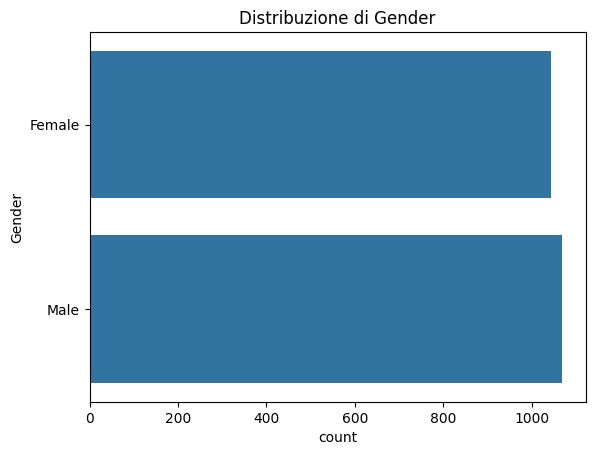


Analisi della variabile categorica: family_history_with_overweight
family_history_with_overweight
yes    1726
no      385
Name: count, dtype: int64
Moda: yes


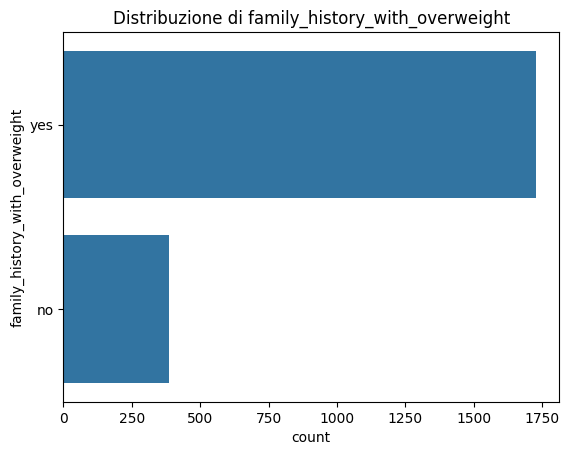


Analisi della variabile categorica: FAVC
FAVC
yes    1866
no      245
Name: count, dtype: int64
Moda: yes


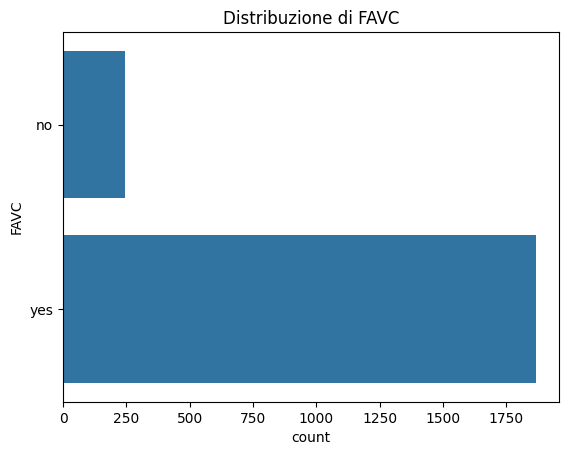


Analisi della variabile categorica: CAEC
CAEC
Sometimes     1765
Frequently     242
Always          53
no              51
Name: count, dtype: int64
Moda: Sometimes


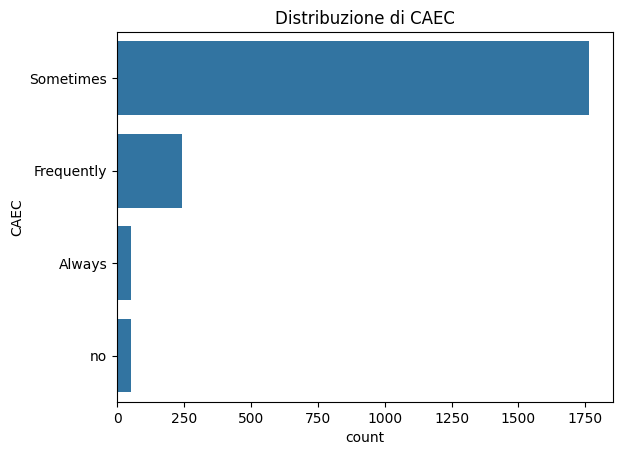


Analisi della variabile categorica: SMOKE
SMOKE
no     2067
yes      44
Name: count, dtype: int64
Moda: no


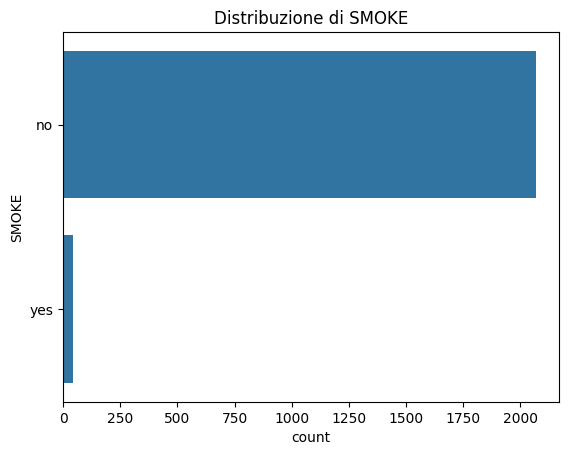


Analisi della variabile categorica: SCC
SCC
no     2015
yes      96
Name: count, dtype: int64
Moda: no


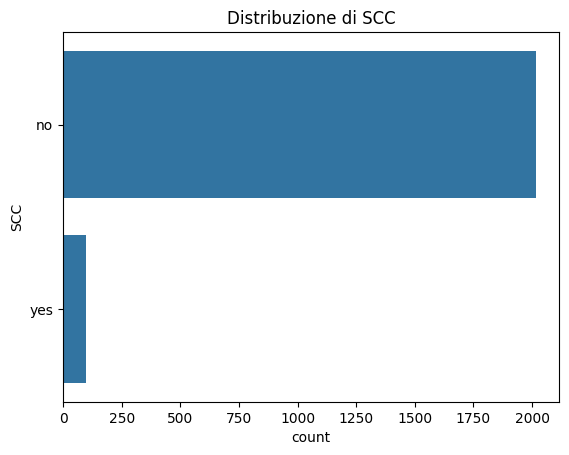


Analisi della variabile categorica: CALC
CALC
Sometimes     1401
no             639
Frequently      70
Always           1
Name: count, dtype: int64
Moda: Sometimes


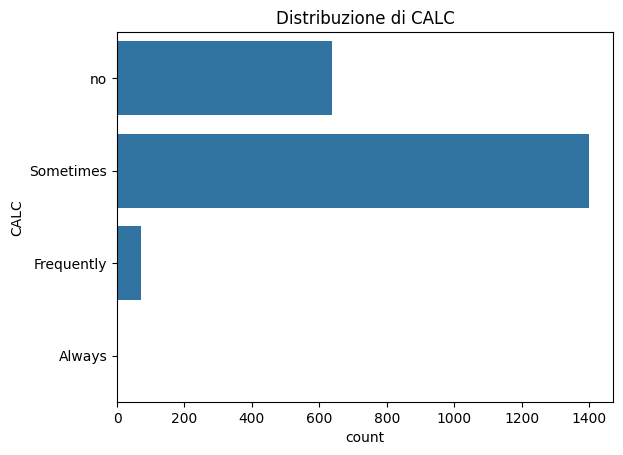


Analisi della variabile categorica: MTRANS
MTRANS
Public_Transportation    1580
Automobile                457
Walking                    56
Motorbike                  11
Bike                        7
Name: count, dtype: int64
Moda: Public_Transportation


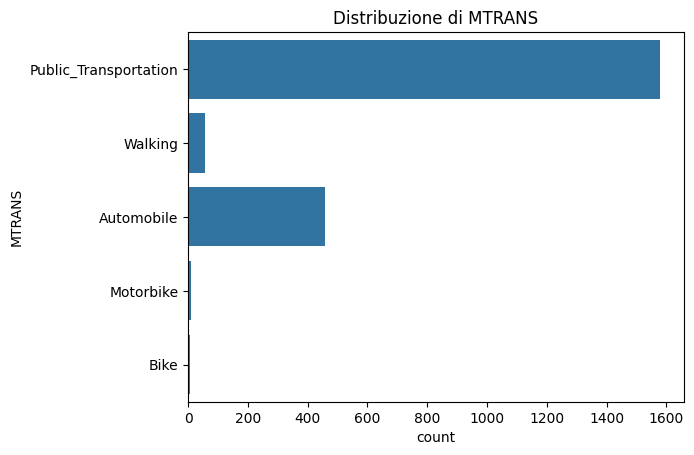


Variabili numeriche: Index(['Age', 'Height', 'Weight', 'FCVC', 'NCP', 'CH2O', 'FAF', 'TUE'], dtype='object')

Analisi della variabile numerica: Age
count    2111.000000
mean       24.312600
std         6.345968
min        14.000000
25%        19.947192
50%        22.777890
75%        26.000000
max        61.000000
Name: Age, dtype: float64


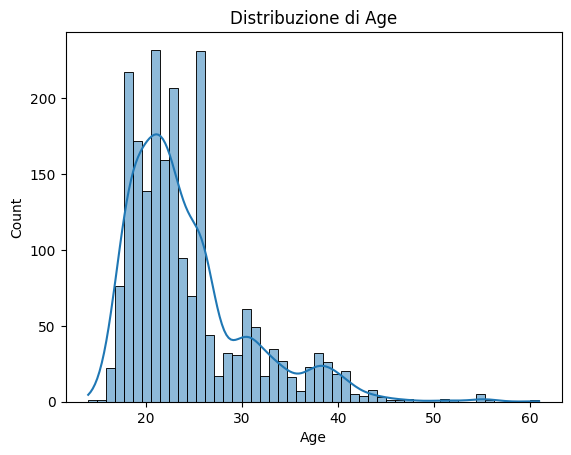


Analisi della variabile numerica: Height
count    2111.000000
mean        1.701677
std         0.093305
min         1.450000
25%         1.630000
50%         1.700499
75%         1.768464
max         1.980000
Name: Height, dtype: float64


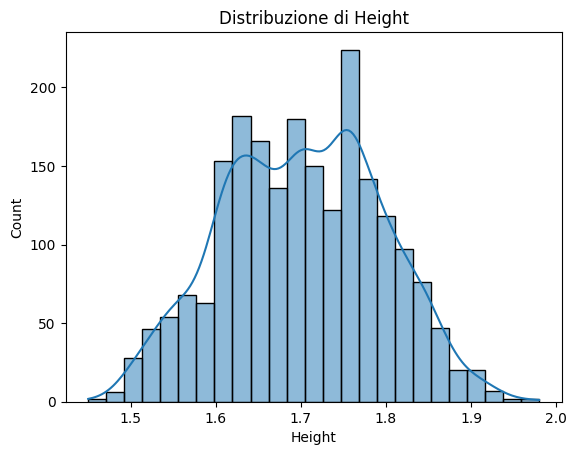


Analisi della variabile numerica: Weight
count    2111.000000
mean       86.586058
std        26.191172
min        39.000000
25%        65.473343
50%        83.000000
75%       107.430682
max       173.000000
Name: Weight, dtype: float64


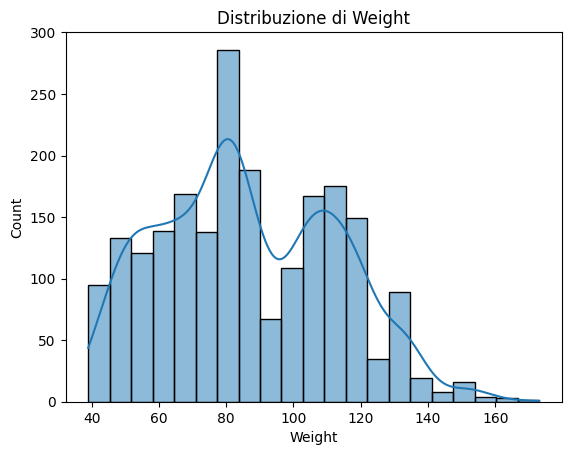


Analisi della variabile numerica: FCVC
count    2111.000000
mean        2.419043
std         0.533927
min         1.000000
25%         2.000000
50%         2.385502
75%         3.000000
max         3.000000
Name: FCVC, dtype: float64


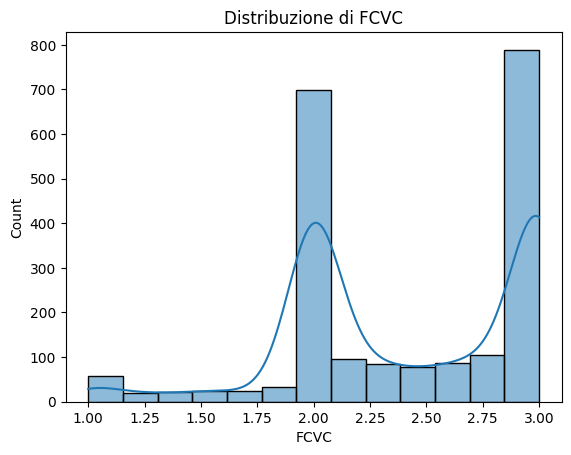


Analisi della variabile numerica: NCP
count    2111.000000
mean        2.685628
std         0.778039
min         1.000000
25%         2.658738
50%         3.000000
75%         3.000000
max         4.000000
Name: NCP, dtype: float64


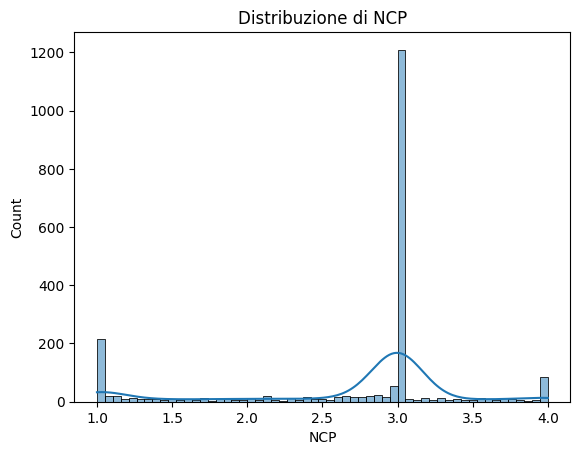


Analisi della variabile numerica: CH2O
count    2111.000000
mean        2.008011
std         0.612953
min         1.000000
25%         1.584812
50%         2.000000
75%         2.477420
max         3.000000
Name: CH2O, dtype: float64


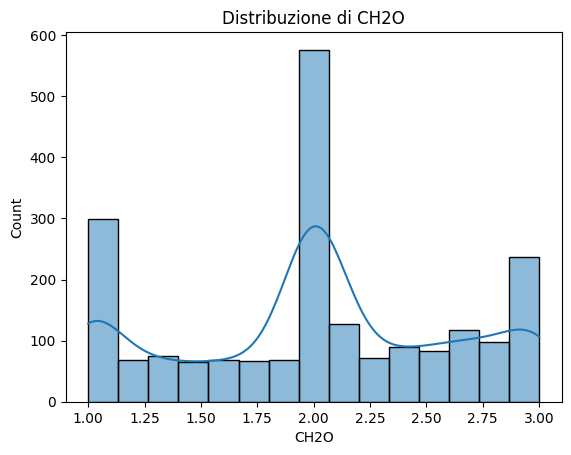


Analisi della variabile numerica: FAF
count    2111.000000
mean        1.010298
std         0.850592
min         0.000000
25%         0.124505
50%         1.000000
75%         1.666678
max         3.000000
Name: FAF, dtype: float64


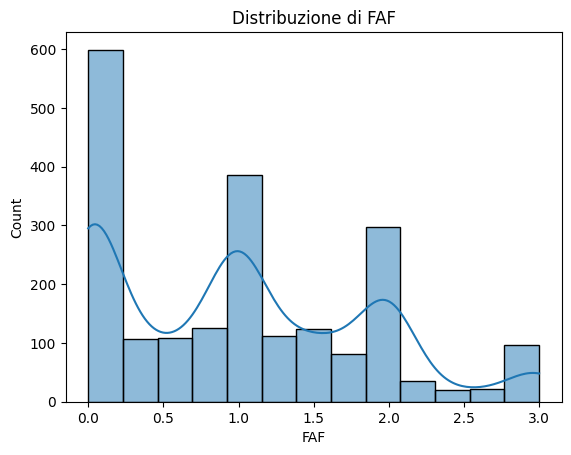


Analisi della variabile numerica: TUE
count    2111.000000
mean        0.657866
std         0.608927
min         0.000000
25%         0.000000
50%         0.625350
75%         1.000000
max         2.000000
Name: TUE, dtype: float64


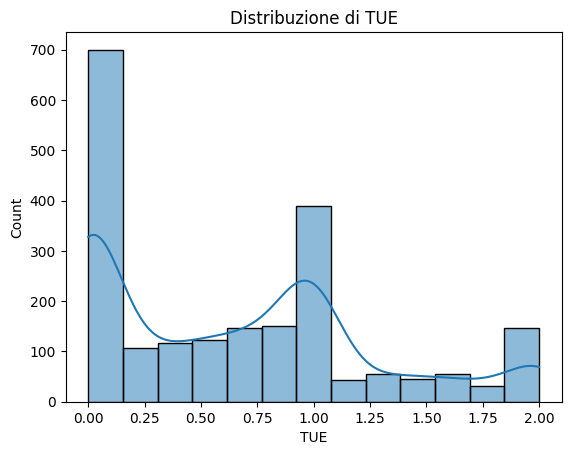


Dati preprocessati:
   Gender   Age  Height  Weight family_history_with_overweight FAVC  FCVC  \
0  Female  21.0    1.62    64.0                            yes   no   2.0   
1  Female  21.0    1.52    56.0                            yes   no   3.0   
2    Male  23.0    1.80    77.0                            yes   no   2.0   
3    Male  27.0    1.80    87.0                             no   no   3.0   
4    Male  22.0    1.78    89.8                             no   no   2.0   

   NCP       CAEC SMOKE  CH2O  SCC  FAF  TUE        CALC  \
0  3.0  Sometimes    no   2.0   no  0.0  1.0          no   
1  3.0  Sometimes   yes   3.0  yes  3.0  0.0   Sometimes   
2  3.0  Sometimes    no   2.0   no  2.0  1.0  Frequently   
3  3.0  Sometimes    no   2.0   no  2.0  0.0  Frequently   
4  1.0  Sometimes    no   2.0   no  0.0  0.0   Sometimes   

                  MTRANS  
0  Public_Transportation  
1  Public_Transportation  
2  Public_Transportation  
3                Walking  
4  Public_Transporta

In [30]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, MinMaxScaler


# Visualizziamo il tipo di variabili per capire quali sono numeriche e quali categoriche
print(X.dtypes)

# Identificazione delle variabili categoriche
categorical_columns = X.select_dtypes(include=['object']).columns
print("\nVariabili categoriche:", categorical_columns)

# Analisi delle variabili categoriche
for col in categorical_columns:
    print(f"\nAnalisi della variabile categorica: {col}")
    print(X[col].value_counts())  # Frequenza delle categorie
    print("Moda:", X[col].mode()[0])  # La moda della colonna
    # Grafico della distribuzione delle categorie
    sns.countplot(y=X[col])
    plt.title(f'Distribuzione di {col}')
    plt.show()

# Identificazione delle variabili numeriche
numerical_columns = X.select_dtypes(include=['int64', 'float64']).columns
print("\nVariabili numeriche:", numerical_columns)

# Analisi delle variabili numeriche
for col in numerical_columns:
    print(f"\nAnalisi della variabile numerica: {col}")
    print(X[col].describe())  # Statistiche descrittive
    # Grafico della distribuzione numerica
    sns.histplot(X[col], kde=True)
    plt.title(f'Distribuzione di {col}')
    plt.show()


# Visualizzazione dei dati preprocessati
print("\nDati preprocessati:")
print(X.head())

In [31]:
print(X.columns)
print(y.columns)
print(X.isnull().sum())
print(y.isnull().sum())

X = X.copy()

X['Age'] = X['Age'].astype('int64')
X['FCVC'] = X['FCVC'].astype('int64')
X['NCP'] = X['NCP'].astype('int64')
X['FAF'] = X['FAF'].astype('int64')
X['TUE'] = X['TUE'].astype('int64')

print(X.head())

encoder = LabelEncoder()

X.loc[:, 'Gender'] = encoder.fit_transform(X['Gender'])
X.loc[:, 'family_history_with_overweight'] = encoder.fit_transform(X['family_history_with_overweight'])
X.loc[:, 'FAVC'] = encoder.fit_transform(X['FAVC'])
X.loc[:, 'CAEC'] = encoder.fit_transform(X['CAEC'])
X.loc[:, 'SMOKE'] = encoder.fit_transform(X['SMOKE'])
X.loc[:, 'SCC'] = encoder.fit_transform(X['SCC'])
X.loc[:, 'CALC'] = encoder.fit_transform(X['CALC'])
X.loc[:, 'MTRANS'] = encoder.fit_transform(X['MTRANS'])

if isinstance(y, pd.DataFrame):
    y = y.values.flatten()

y = encoder.fit_transform(y)

X = X.astype(np.float32)
y = y.astype(np.float32)

print(X.dtypes)  # For pandas DataFrame
print(y.dtype)   # For NumPy array
print(X.head())
print(y[:5])

Index(['Gender', 'Age', 'Height', 'Weight', 'family_history_with_overweight',
       'FAVC', 'FCVC', 'NCP', 'CAEC', 'SMOKE', 'CH2O', 'SCC', 'FAF', 'TUE',
       'CALC', 'MTRANS'],
      dtype='object')
Index(['NObeyesdad'], dtype='object')
Gender                            0
Age                               0
Height                            0
Weight                            0
family_history_with_overweight    0
FAVC                              0
FCVC                              0
NCP                               0
CAEC                              0
SMOKE                             0
CH2O                              0
SCC                               0
FAF                               0
TUE                               0
CALC                              0
MTRANS                            0
dtype: int64
NObeyesdad    0
dtype: int64
   Gender  Age  Height  Weight family_history_with_overweight FAVC  FCVC  NCP  \
0  Female   21    1.62    64.0                            yes

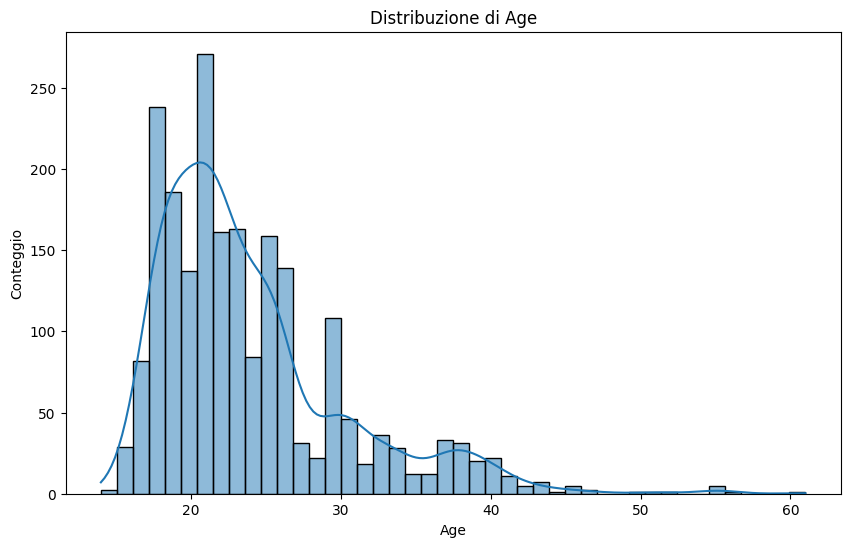

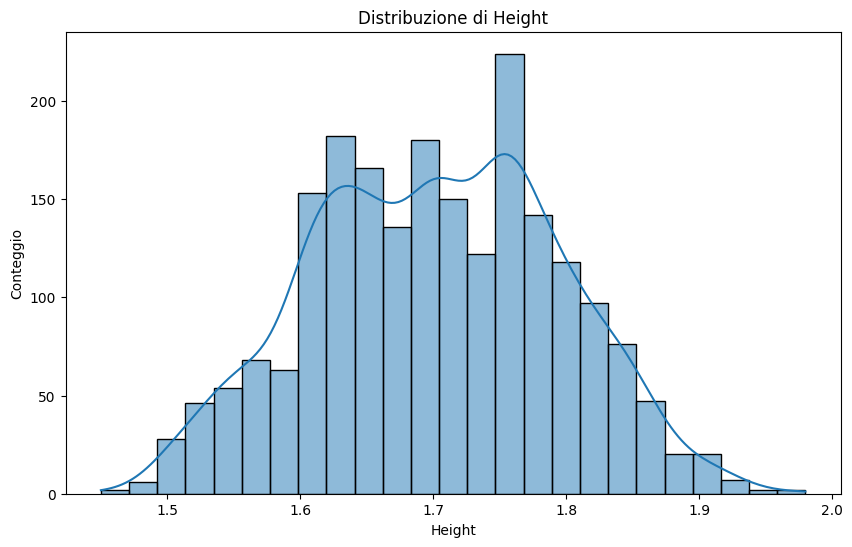

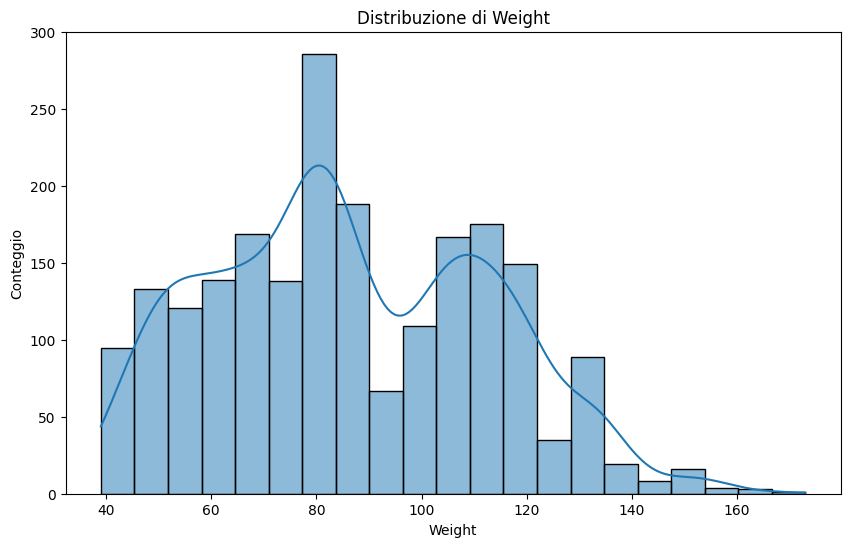

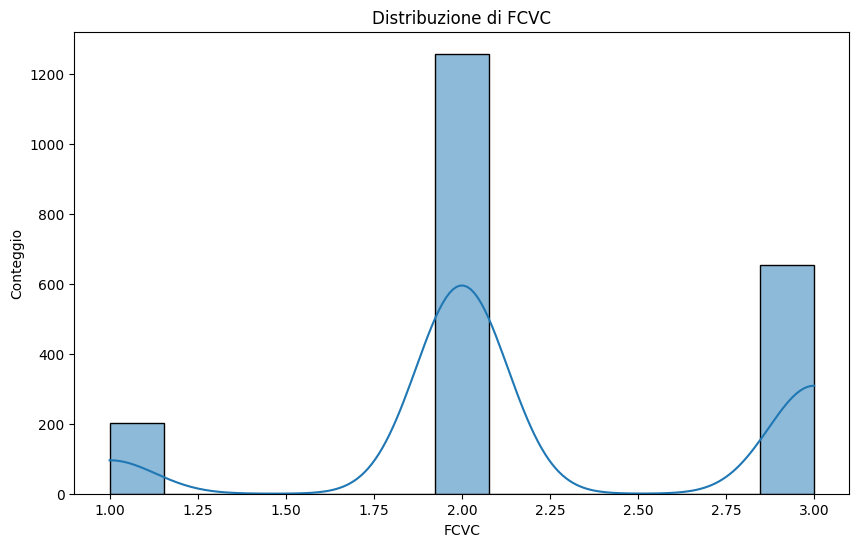

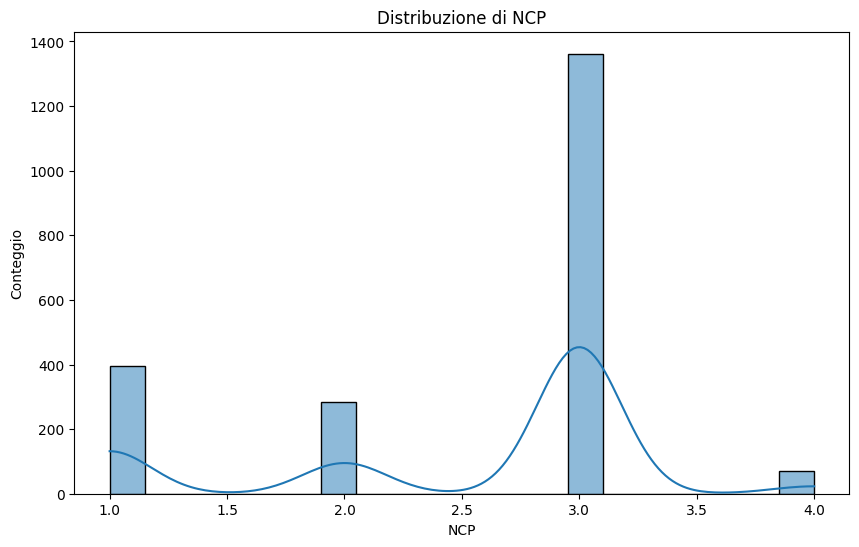

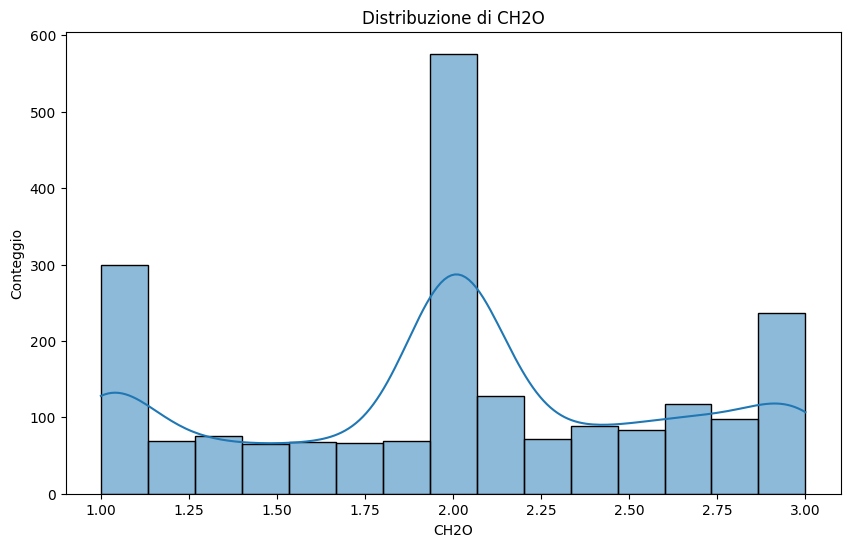

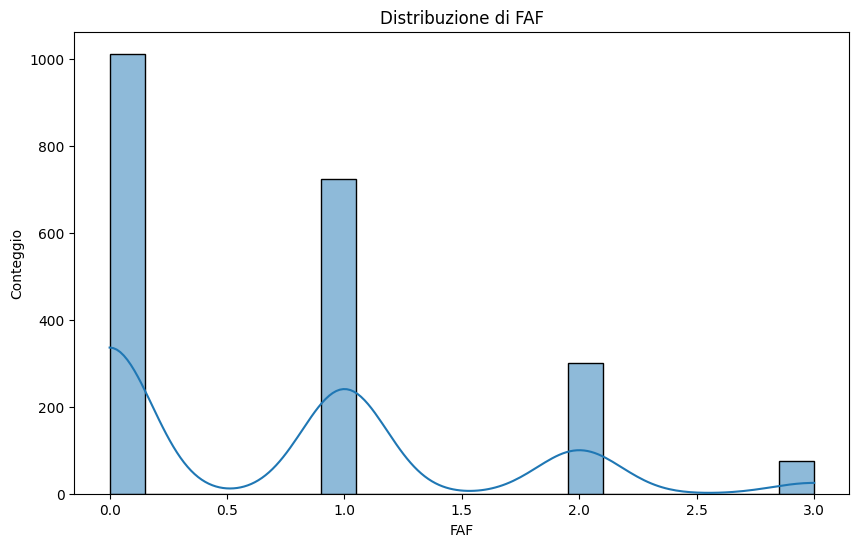

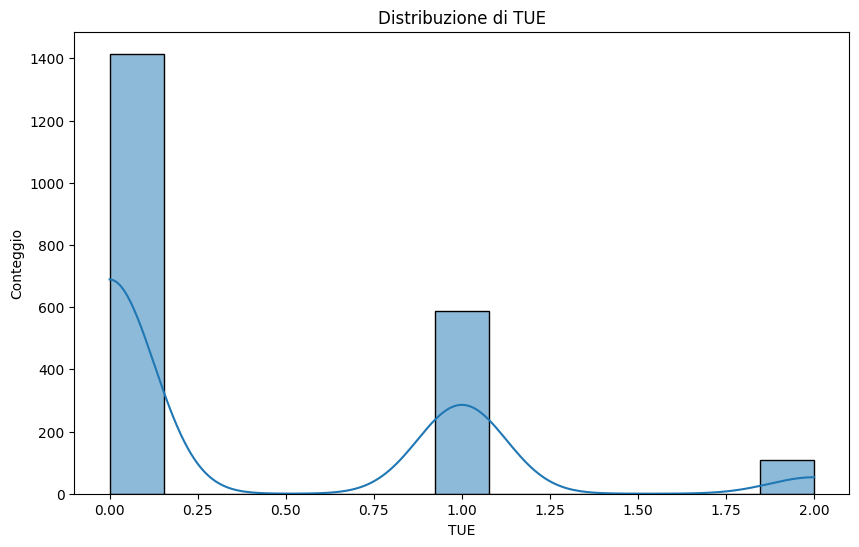


Analisi della variabile categorica: Gender
Gender
1.0    1068
0.0    1043
Name: count, dtype: int64


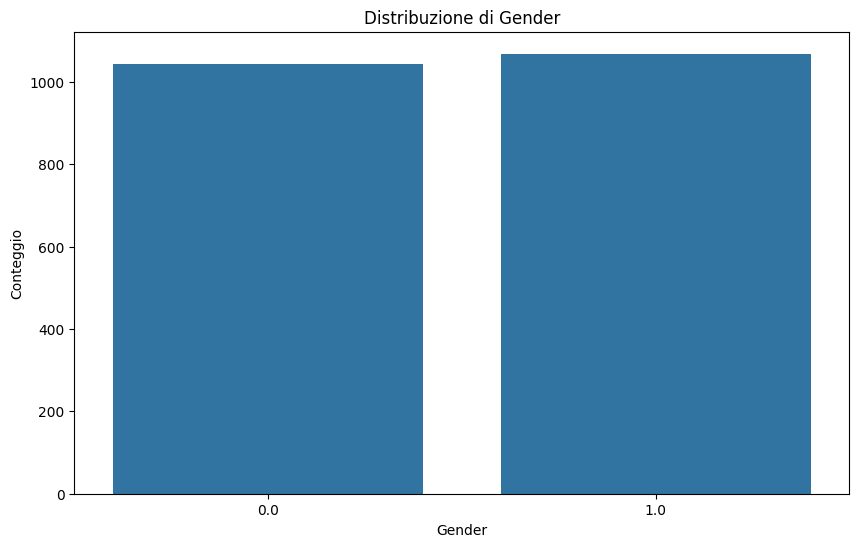


Analisi della variabile categorica: family_history_with_overweight
family_history_with_overweight
1.0    1726
0.0     385
Name: count, dtype: int64


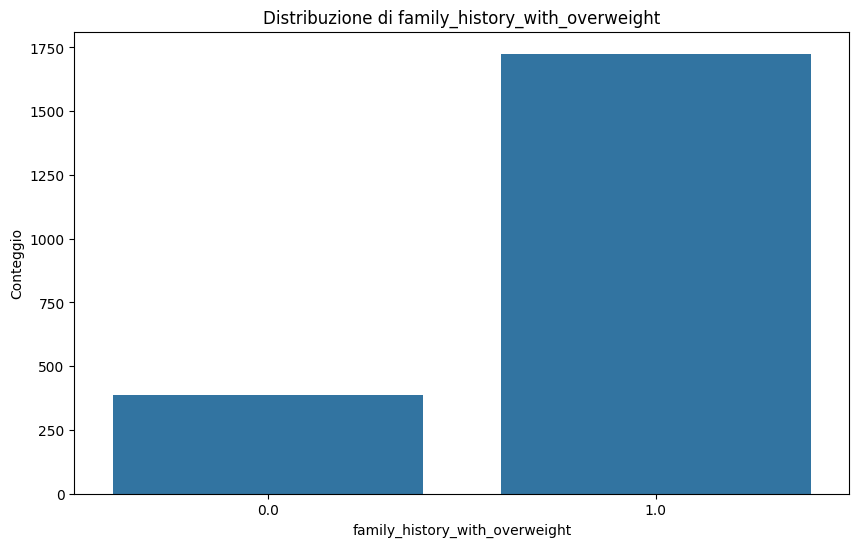


Analisi della variabile categorica: FAVC
FAVC
1.0    1866
0.0     245
Name: count, dtype: int64


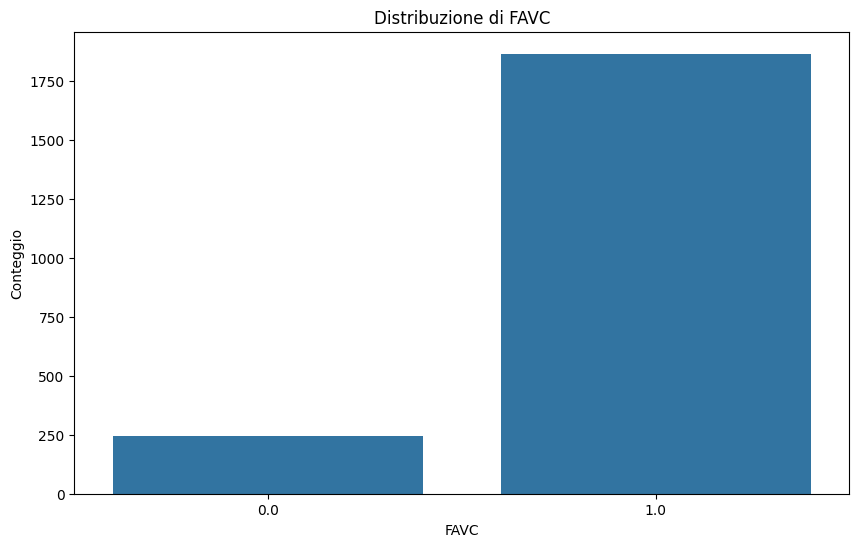


Analisi della variabile categorica: CAEC
CAEC
2.0    1765
1.0     242
0.0      53
3.0      51
Name: count, dtype: int64


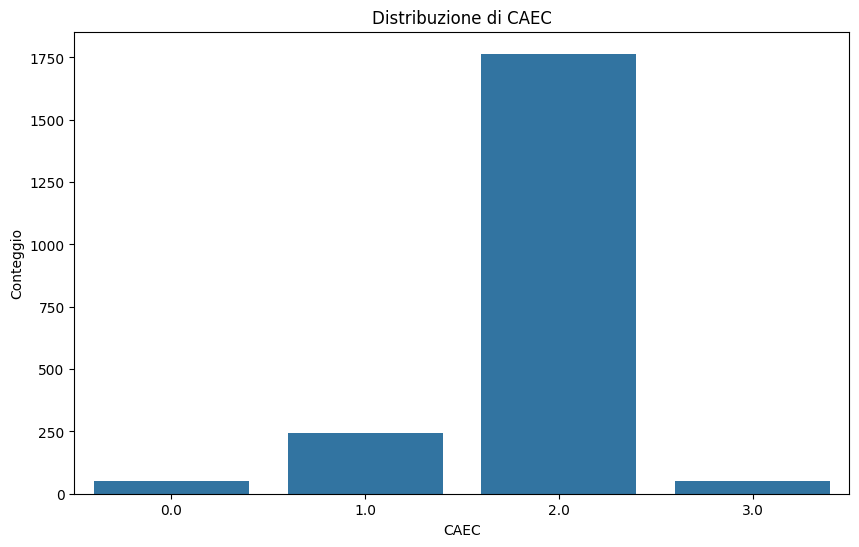


Analisi della variabile categorica: SMOKE
SMOKE
0.0    2067
1.0      44
Name: count, dtype: int64


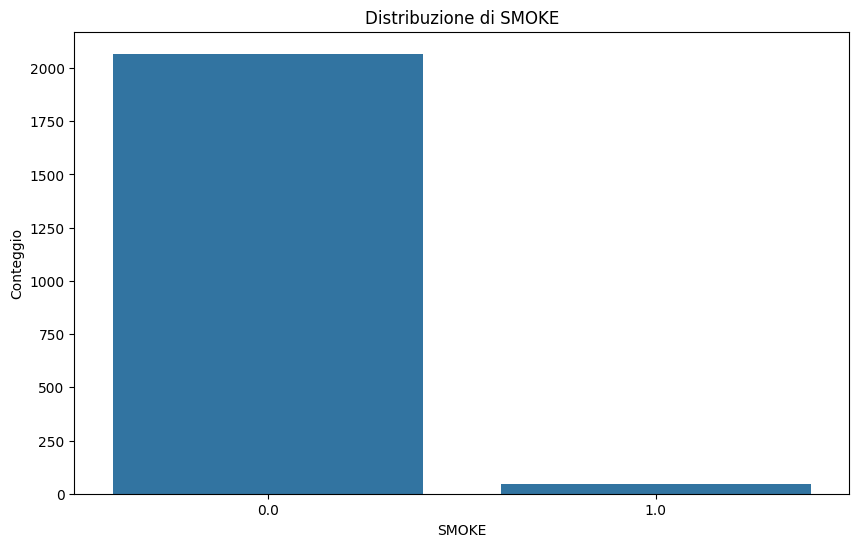


Analisi della variabile categorica: SCC
SCC
0.0    2015
1.0      96
Name: count, dtype: int64


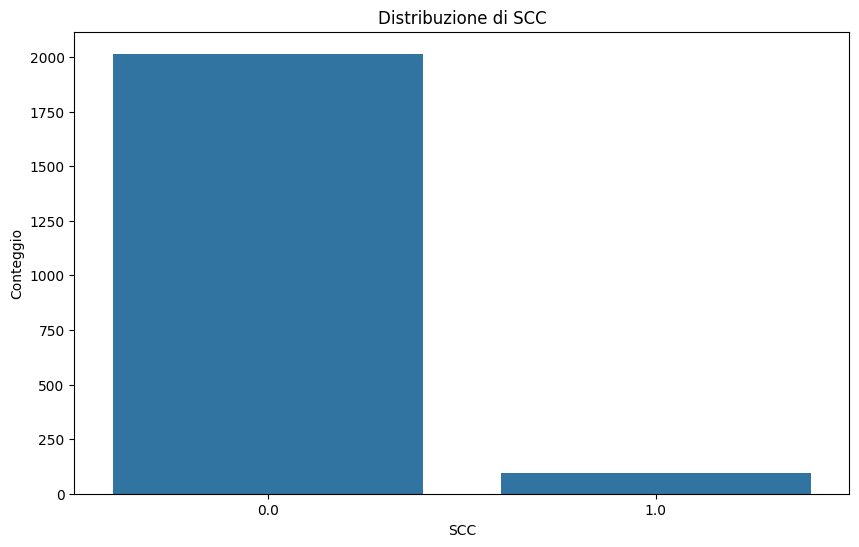


Analisi della variabile categorica: CALC
CALC
2.0    1401
3.0     639
1.0      70
0.0       1
Name: count, dtype: int64


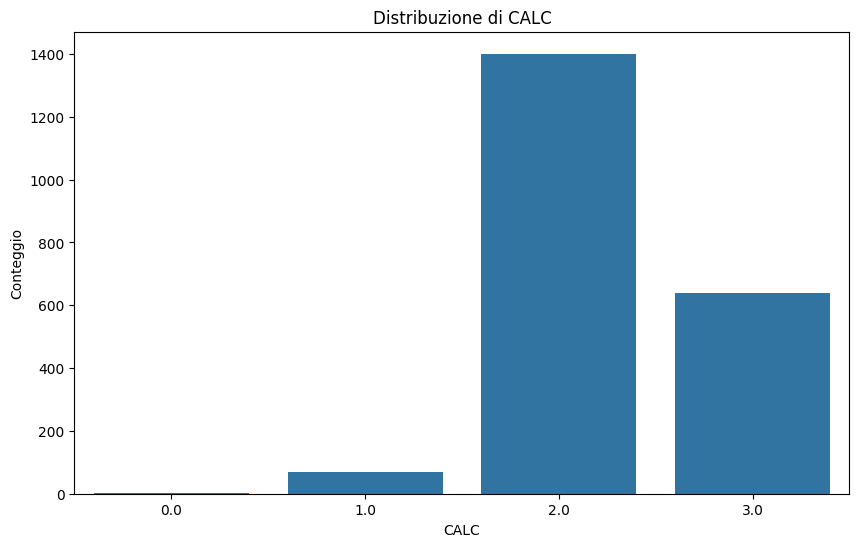


Analisi della variabile categorica: MTRANS
MTRANS
3.0    1580
0.0     457
4.0      56
2.0      11
1.0       7
Name: count, dtype: int64


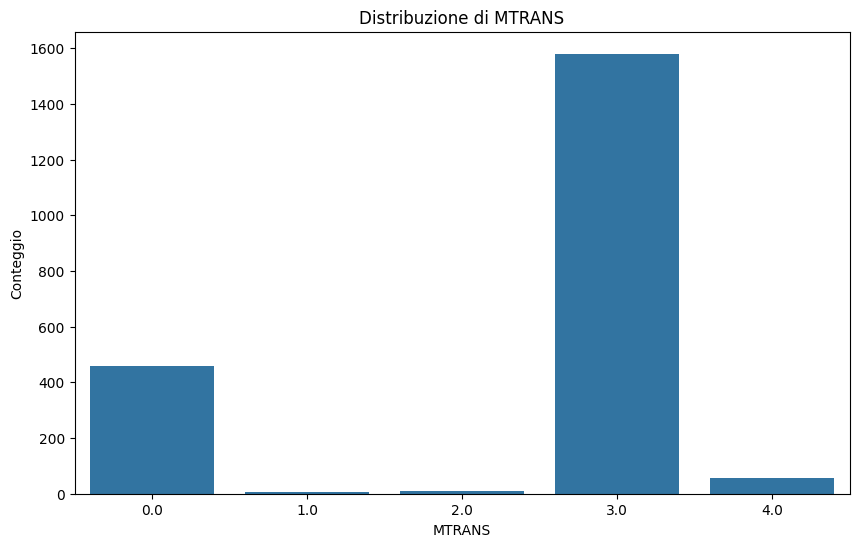


Legenda per l'interpretazione degli indici:
# Skewness = 0: Distribuzione perfettamente simmetrica.
# Skewness > 0: Sbilanciamento verso destra (coda lunga a destra).
# Skewness < 0: Sbilanciamento verso sinistra (coda lunga a sinistra).
# Kurtosis ≈ 3: Distribuzione normale (mesocurtica).
# Kurtosis > 3: Code più pronunciate (leptocurtica).
# Kurtosis < 3: Code meno pronunciate (platicurtica).
# CV < 10%: Distribuzione molto bilanciata.
# CV > 50%: Distribuzione altamente sbilanciata.

Tabella riassuntiva degli indici per le feature numeriche:
            Gini  Kurtosis  Skewness      CV (%)
TUE     0.707950  0.558232  1.253687  152.725732
FAF     0.585542  0.000952  0.897888  113.323641
Weight  0.172881 -0.701082  0.255230   30.241552
CH2O    0.172433 -0.880154 -0.104837   30.518168
NCP     0.159338 -0.458507 -0.884495   32.895130
Age     0.135952  2.978708  1.561224   26.309994
FCVC    0.135551 -0.465157 -0.121604   27.076784
Height  0.031308 -0.564458 -0.012848    5.481810


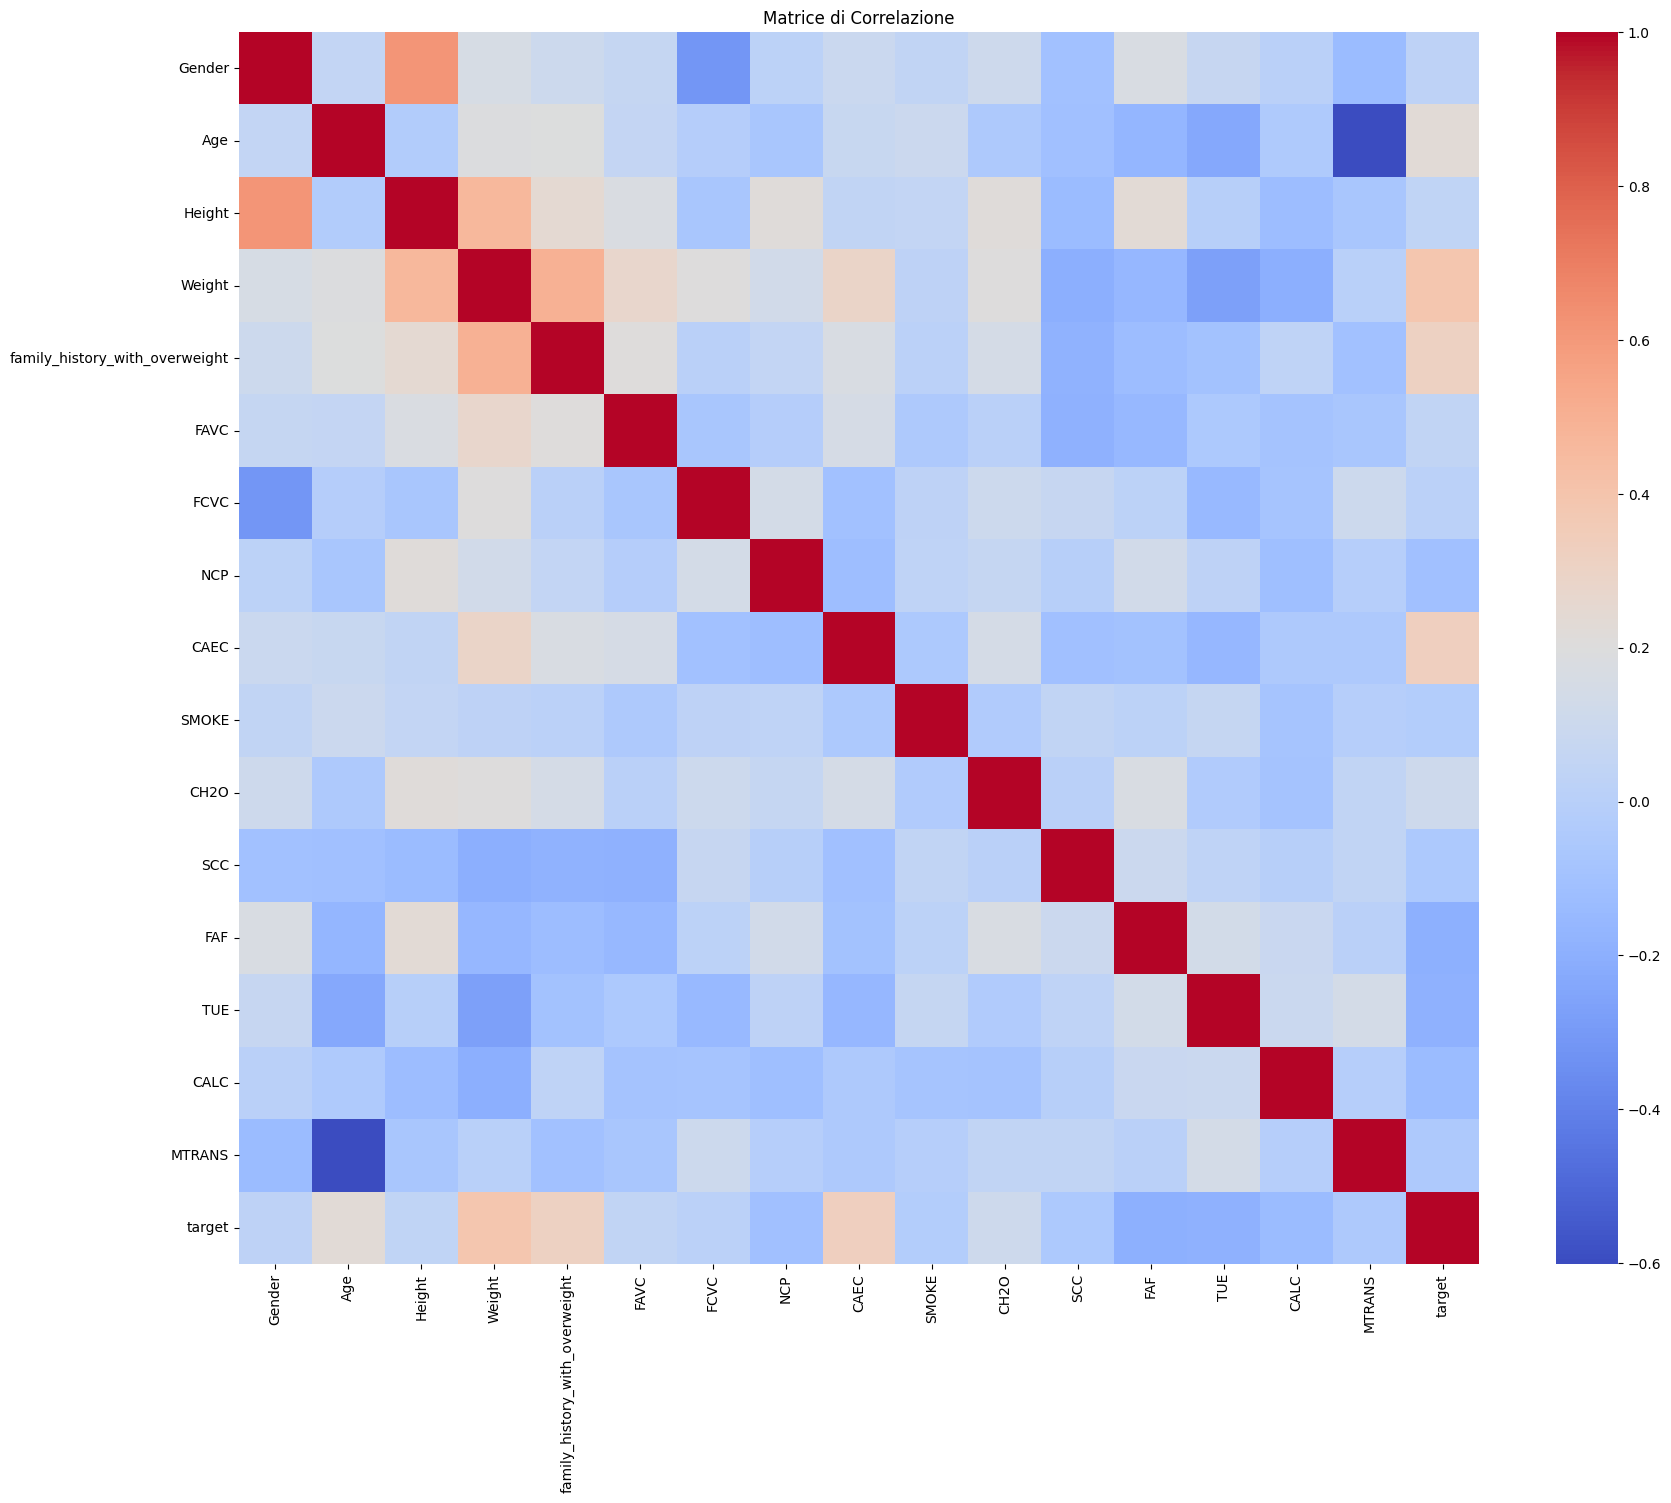

In [32]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import kurtosis, skew
from sklearn.preprocessing import LabelEncoder, MinMaxScaler

# Funzioni di analisi
def plot_numerical_distribution(df, column):
    plt.figure(figsize=(10, 6))
    sns.histplot(df[column], kde=True)
    plt.title(f'Distribuzione di {column}')
    plt.xlabel(column)
    plt.ylabel('Conteggio')
    plt.show()

def plot_categorical_distribution(df, column):
    plt.figure(figsize=(10, 6))
    sns.countplot(x=df[column])
    plt.title(f'Distribuzione di {column}')
    plt.xlabel(column)
    plt.ylabel('Conteggio')
    plt.show()

def calculate_gini(array):
    array = np.sort(array)
    index = np.arange(1, len(array) + 1)
    n = len(array)
    if np.sum(array) == 0:
        return np.nan  # Evita divisioni per zero
    return (np.sum((2 * index - n - 1) * array)) / (n * np.sum(array))

def calculate_cv(array):
    mean = np.mean(array)
    if mean == 0:
        return np.nan  # Evita divisioni per zero
    return np.std(array) / mean * 100

# Creiamo un dataframe per lavorare comodamente
df_encoded = pd.DataFrame(X, columns=X.columns)  # Utilizziamo X preprocessato
df_encoded['target'] = y  # Aggiungiamo il target

# Identificazione delle variabili numeriche e categoriche
#categorical_columns = ['Gender', 'family_history_with_overweight', 'FAVC', 'CAEC', 'SMOKE', 'SCC', 'CALC', 'MTRANS']
numerical_columns = [col for col in df_encoded.columns if col not in categorical_columns and col != 'target']

# Analisi delle variabili numeriche
summary_stats = {}

for col in numerical_columns:
    data = df_encoded[col].dropna().values
    if len(data) > 0:
        summary_stats[col] = {
            'Gini': calculate_gini(data),
            'Kurtosis': kurtosis(data, nan_policy='omit'),
            'Skewness': skew(data, nan_policy='omit'),
            'CV (%)': calculate_cv(data)
        }
        plot_numerical_distribution(df_encoded, col)

# Creazione della tabella riassuntiva per le variabili numeriche
summary_df = pd.DataFrame.from_dict(summary_stats, orient='index')
summary_df = summary_df.sort_values('Gini', ascending=False)

# Analisi delle variabili categoriche
for col in categorical_columns:
    print(f"\nAnalisi della variabile categorica: {col}")
    print(df_encoded[col].value_counts())  # Frequenza delle categorie
    plot_categorical_distribution(df_encoded, col)

# Legenda per l'interpretazione degli indici
print("\nLegenda per l'interpretazione degli indici:")
print("# Skewness = 0: Distribuzione perfettamente simmetrica.")
print("# Skewness > 0: Sbilanciamento verso destra (coda lunga a destra).")
print("# Skewness < 0: Sbilanciamento verso sinistra (coda lunga a sinistra).")
print("# Kurtosis ≈ 3: Distribuzione normale (mesocurtica).")
print("# Kurtosis > 3: Code più pronunciate (leptocurtica).")
print("# Kurtosis < 3: Code meno pronunciate (platicurtica).")
print("# CV < 10%: Distribuzione molto bilanciata.")
print("# CV > 50%: Distribuzione altamente sbilanciata.")

# Visualizzazione della tabella riassuntiva per le variabili numeriche
print("\nTabella riassuntiva degli indici per le feature numeriche:")
print(summary_df)

# Matrice di correlazione
plt.figure(figsize=(20, 16))
sns.heatmap(df_encoded.corr(), annot=False, cmap='coolwarm')
plt.title('Matrice di Correlazione')
plt.show()


In [ ]:
# Splitting del dataset in set di addestramento,validation e test prima di preprocessare
train_ratio = 0.75
validation_ratio = 0.10
test_ratio = 0.15

#X_test= X_test_standardized
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=1 - train_ratio)
X_val, X_test, y_val, y_test = train_test_split(X_test, y_test, test_size=test_ratio/(test_ratio + validation_ratio))

print("Dataset prima di splittare:")
print(X.shape)
print(y.shape)
print("\nX e y train:")
print(X_train.shape, y_train.shape)
print("\nX e y test:")
print(X_test.shape, y_test.shape)
print("\nX e y validation:")
print(X_val.shape, y_val.shape)

Dataset prima di splittare:
(2111, 16)
(2111,)

X e y train:
(1583, 16) (1583,)

X e y test:
(317, 16) (317,)

X e y validation:
(211, 16) (211,)


#Gestione valori nulli(da fare), outliers

In [ ]:
# from sklearn.model_selection import train_test_split
# from sklearn.linear_model import LinearRegression
# from sklearn.ensemble import IsolationForest
# from sklearn.covariance import EllipticEnvelope
# from sklearn.neighbors import LocalOutlierFactor
# from sklearn.metrics import mean_squared_error
# import numpy as np
# import matplotlib.pyplot as plt

# def remove_outliers(X, y, model, model_name, novelty=False):
#     if model_name == 'Local Outlier Factor':
#         if novelty:
#             # LOF with novelty=True for test data
#             yhat = model.fit_predict(X)
#         else:
#             # LOF with novelty=False for training/validation data
#             yhat = model.fit_predict(X)
#     else:
#         # For other models
#         yhat = model.fit_predict(X)

#     mask = yhat != -1
#     return X[mask], y[mask]

# # Modelli di rilevamento outlier
# outlier_models = {
#     'Isolation Forest': IsolationForest(contamination=0.1, random_state=42),
#     'Elliptic Envelope': EllipticEnvelope(contamination=0.1, support_fraction=0.95, random_state=42),
#     'Local Outlier Factor': LocalOutlierFactor(contamination=0.1, novelty=False)
# }

# # Dati originali (assumendo che X_train, X_val, X_test, y_train, y_val, y_test siano già definiti)
# datasets = {'Train': (X_train, y_train), 'Validation': (X_val, y_val), 'Test': (X_test, y_test)}
# results = {}

# # Rimozione outlier e allenamento modelli
# for name, (X, y) in datasets.items():
#     for model_name, model in outlier_models.items():
#         # Determina se siamo sui dati di test
#         novelty = (name == 'Test' and model_name == 'Local Outlier Factor')
#         X_clean, y_clean = remove_outliers(X.copy(), y.copy(), model, model_name, novelty)
#         reg_model = LinearRegression().fit(X_clean, y_clean)
#         y_pred = reg_model.predict(X_test)
#         mse = mean_squared_error(y_test, y_pred)
#         results[(name, model_name)] = (X_clean, y_clean, mse)

# # Stampa MSE e selezione del migliore
# for (dataset, model_name), (_, _, mse) in results.items():
#     print(f"MSE {dataset} dopo rimozione outlier con {model_name}: {mse}")

# # Determinazione della tecnica con il MSE più basso per ogni set di dati
# for dataset in ['Train', 'Validation', 'Test']:
#     mse_values = {model_name: results[(dataset, model_name)][2] for model_name in outlier_models.keys()}
#     best_technique = min(mse_values, key=mse_values.get)
#     print(f'Tecnica con il MSE più basso nel set di {dataset.lower()}: {best_technique} (MSE: {mse_values[best_technique]})')

# # Visualizzazione dei risultati
# for name, (X, y) in datasets.items():
#     plt.figure(figsize=(12, 6))
#     plt.suptitle(f'{name} Set Before and After Outlier Removal', fontsize=16)

#     plt.subplot(1, len(outlier_models) + 1, 1)
#     plt.scatter(range(len(y)), y, color='blue')
#     plt.title(f'{name} Set Before Removal')

#     for i, (model_name, _) in enumerate(outlier_models.items(), 2):
#         X_clean, y_clean = results[(name, model_name)][:2]
#         plt.subplot(1, len(outlier_models) + 1, i)
#         plt.scatter(range(len(y_clean)), y_clean, label=model_name)
#         plt.title(f'After {model_name}')

#     plt.tight_layout(rect=[0, 0, 1, 0.95])
#     plt.show()

In [ ]:
print("Nuovi shape dei vari dataset:")
print("X_train:")
print(X_train.shape)
print("X_validation")
print(X_val.shape)
print("X_test")
print(X_test.shape)
print("Y_train:")
print(y_train.shape)
print("Y_validation")
print(y_val.shape)
print("Y_test")
print(y_test.shape)

Nuovi shape dei vari dataset:
X_train:
(1583, 16)
X_validation
(211, 16)
X_test
(317, 16)
Y_train:
(1583,)
Y_validation
(211,)
Y_test
(317,)


In [ ]:
print("Numero di feature in X_train:", X_train.shape[1])

Numero di feature in X_train: 16


Mean Squared Error su set di convalida (Regressione Lineare): 3.239612
Mean Squared Error su set di test (Regressione Lineare): 2.683152


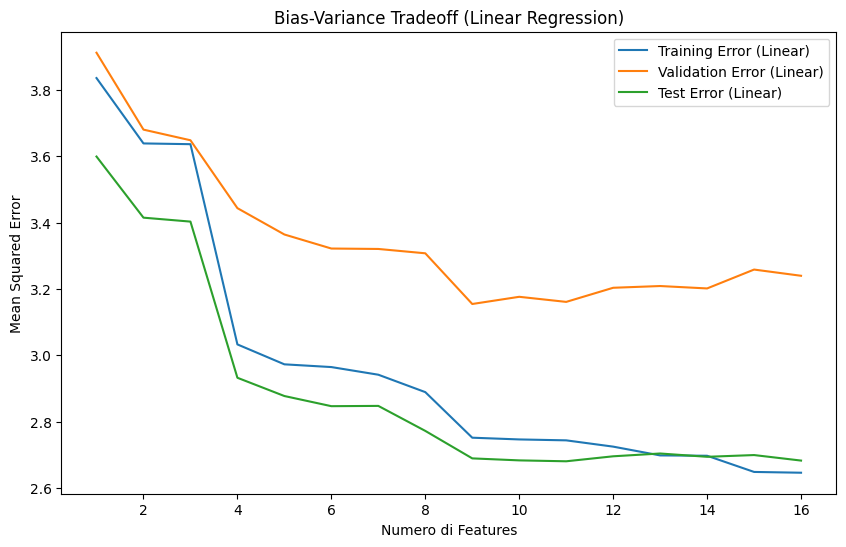

Mean Squared Error su set di convalida (Ridge): 3.229933
Mean Squared Error su set di test (Ridge): 2.676469


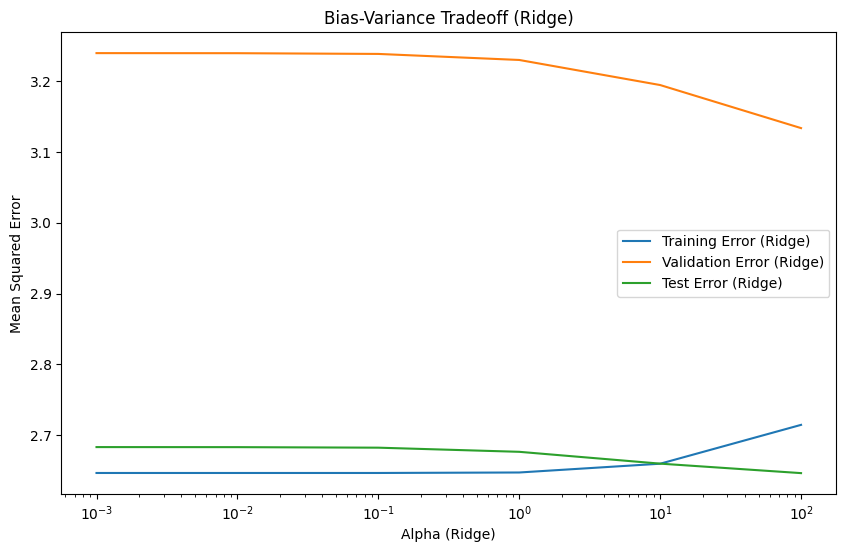

Mean Squared Error su set di convalida (Lasso): 3.3631425
Mean Squared Error su set di test (Lasso): 2.955823


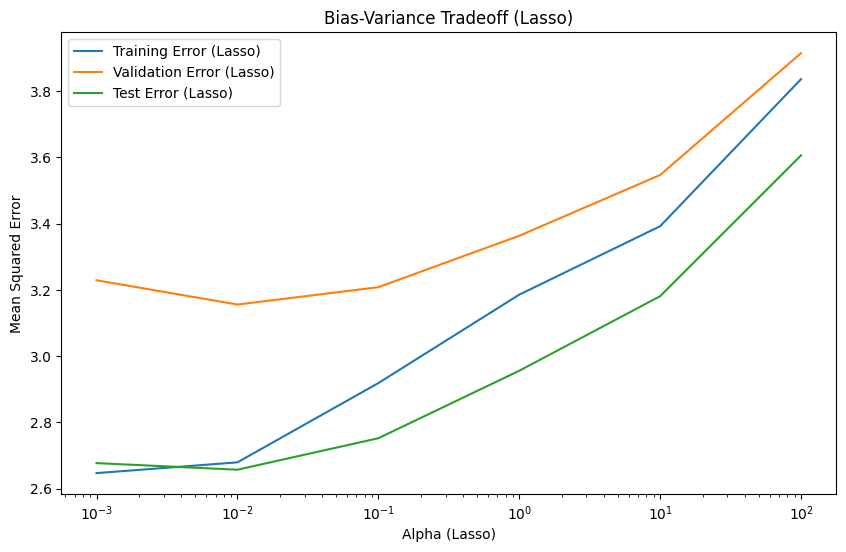

Mean Squared Error su set di convalida (Elastic Net): 3.3392823
Mean Squared Error su set di test (Elastic Net): 2.933985


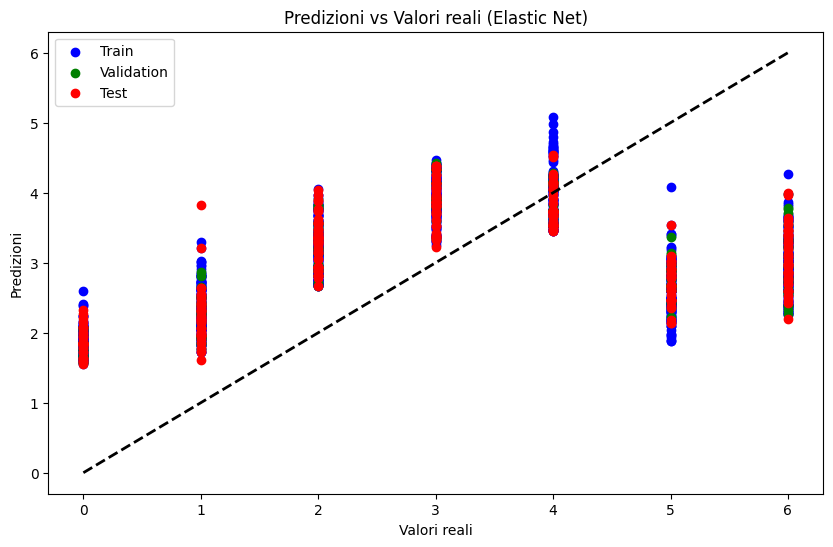

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.metrics import mean_squared_error
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

#il training test deve essere sempre monotono decrescente
# X_train = X_train.values
# X_val = X_val.values
# X_test = X_test.values

def bias_variance_tradeoff(X_train, X_val, X_test, y_train, y_val, y_test, model):
    train_errors = []
    val_errors = []
    test_errors = []
    complexities = []

    # Verifica che X_* siano array 2D
    if isinstance(X_train, pd.DataFrame):
        X_train = X_train.to_numpy()
    if isinstance(X_val, pd.DataFrame):
        X_val = X_val.to_numpy()
    if isinstance(X_test, pd.DataFrame):
        X_test = X_test.to_numpy()

    for i in range(1, X_train.shape[1] + 1):
        X_train_i = X_train[:, :i]
        X_val_i = X_val[:, :i]
        X_test_i = X_test[:, :i]

        model.fit(X_train_i, y_train)
        train_errors.append(mean_squared_error(y_train, model.predict(X_train_i)))
        val_errors.append(mean_squared_error(y_val, model.predict(X_val_i)))
        test_errors.append(mean_squared_error(y_test, model.predict(X_test_i)))
        complexities.append(i)

    min_val_error_index = np.argmin(val_errors)
    val_error_sign = 0 if min_val_error_index == len(val_errors) - 1 else val_errors[min_val_error_index] - val_errors[min_val_error_index + 1]

    return complexities, train_errors, val_errors, test_errors, min_val_error_index, val_error_sign

# Linear Regression
linear_model = LinearRegression()
linear_model.fit(X_train, y_train)

val_predictions_linear = linear_model.predict(X_val)
val_mse_linear = mean_squared_error(y_val, val_predictions_linear)
print("Mean Squared Error su set di convalida (Regressione Lineare):", val_mse_linear)

test_predictions_linear = linear_model.predict(X_test)
test_mse_linear = mean_squared_error(y_test, test_predictions_linear)
print("Mean Squared Error su set di test (Regressione Lineare):", test_mse_linear)

complexities_linear, train_errors_linear, val_errors_linear, test_errors_linear, min_val_error_index_linear, val_error_sign_linear = bias_variance_tradeoff(X_train, X_val, X_test, y_train, y_val, y_test, linear_model)

plt.figure(figsize=(10, 6))
plt.plot(complexities_linear, train_errors_linear, label='Training Error (Linear)')
plt.plot(complexities_linear, val_errors_linear, label='Validation Error (Linear)')
plt.plot(complexities_linear, test_errors_linear, label='Test Error (Linear)')
plt.xlabel('Numero di Features')
plt.ylabel('Mean Squared Error')
plt.title('Bias-Variance Tradeoff (Linear Regression)')
plt.legend()

if val_error_sign_linear >= 0:
    plt.scatter(complexities_linear[min_val_error_index_linear], val_errors_linear[min_val_error_index_linear], color='red', marker='o', label='Stop Decreasing (Linear)')
    plt.text(complexities_linear[min_val_error_index_linear], val_errors_linear[min_val_error_index_linear], f'Features: {complexities_linear[min_val_error_index_linear]}', verticalalignment='bottom', horizontalalignment='left', fontsize=10)

plt.show()

# Ridge Regression
ridge_model = Ridge(alpha=1.0)
ridge_model.fit(X_train, y_train)

val_predictions_ridge = ridge_model.predict(X_val)
val_mse_ridge = mean_squared_error(y_val, val_predictions_ridge)
print("Mean Squared Error su set di convalida (Ridge):", val_mse_ridge)

test_predictions_ridge = ridge_model.predict(X_test)
test_mse_ridge = mean_squared_error(y_test, test_predictions_ridge)
print("Mean Squared Error su set di test (Ridge):", test_mse_ridge)

alphas = [0.001, 0.01, 0.1, 1, 10, 100]
train_errors_ridge = []
val_errors_ridge = []
test_errors_ridge = []

for alpha in alphas:
    model_ridge = Ridge(alpha=alpha)
    model_ridge.fit(X_train, y_train)
    train_errors_ridge.append(mean_squared_error(y_train, model_ridge.predict(X_train)))
    val_errors_ridge.append(mean_squared_error(y_val, model_ridge.predict(X_val)))
    test_errors_ridge.append(mean_squared_error(y_test, model_ridge.predict(X_test)))

plt.figure(figsize=(10, 6))
plt.plot(alphas, train_errors_ridge, label='Training Error (Ridge)')
plt.plot(alphas, val_errors_ridge, label='Validation Error (Ridge)')
plt.plot(alphas, test_errors_ridge, label='Test Error (Ridge)')
plt.xlabel('Alpha (Ridge)')
plt.ylabel('Mean Squared Error')
plt.title('Bias-Variance Tradeoff (Ridge)')
plt.xscale('log')
plt.legend()
plt.show()

# Lasso Regression
lasso_model = Lasso(alpha=1.0)
lasso_model.fit(X_train, y_train)

val_predictions_lasso = lasso_model.predict(X_val)
val_mse_lasso = mean_squared_error(y_val, val_predictions_lasso)
print("Mean Squared Error su set di convalida (Lasso):", val_mse_lasso)

test_predictions_lasso = lasso_model.predict(X_test)
test_mse_lasso = mean_squared_error(y_test, test_predictions_lasso)
print("Mean Squared Error su set di test (Lasso):", test_mse_lasso)

train_errors_lasso = []
val_errors_lasso = []
test_errors_lasso = []

for alpha in alphas:
    model_lasso = Lasso(alpha=alpha)
    model_lasso.fit(X_train, y_train)
    train_errors_lasso.append(mean_squared_error(y_train, model_lasso.predict(X_train)))
    val_errors_lasso.append(mean_squared_error(y_val, model_lasso.predict(X_val)))
    test_errors_lasso.append(mean_squared_error(y_test, model_lasso.predict(X_test)))

plt.figure(figsize=(10, 6))
plt.plot(alphas, train_errors_lasso, label='Training Error (Lasso)')
plt.plot(alphas, val_errors_lasso, label='Validation Error (Lasso)')
plt.plot(alphas, test_errors_lasso, label='Test Error (Lasso)')
plt.xlabel('Alpha (Lasso)')
plt.ylabel('Mean Squared Error')
plt.title('Bias-Variance Tradeoff (Lasso)')
plt.xscale('log')
plt.legend()
plt.show()

# Elastic Net
elastic_net_model = ElasticNet(alpha=1.0, l1_ratio=0.5)
elastic_net_model.fit(X_train, y_train)

val_predictions_en = elastic_net_model.predict(X_val)
val_mse_en = mean_squared_error(y_val, val_predictions_en)
print("Mean Squared Error su set di convalida (Elastic Net):", val_mse_en)

test_predictions_en = elastic_net_model.predict(X_test)
test_mse_en = mean_squared_error(y_test, test_predictions_en)
print("Mean Squared Error su set di test (Elastic Net):", test_mse_en)

# Plot delle predizioni vs valori reali per Elastic Net
plt.figure(figsize=(10, 6))
plt.scatter(y_train, elastic_net_model.predict(X_train), color='blue', label='Train')
plt.scatter(y_val, val_predictions_en, color='green', label='Validation')
plt.scatter(y_test, test_predictions_en, color='red', label='Test')
plt.plot([min(y_train.min(), y_val.min(), y_test.min()), max(y_train.max(), y_val.max(), y_test.max())],
         [min(y_train.min(), y_val.min(), y_test.min()), max(y_train.max(), y_val.max(), y_test.max())], 'k--', lw=2)

plt.xlabel('Valori reali')
plt.ylabel('Predizioni')
plt.title('Predizioni vs Valori reali (Elastic Net)')
plt.legend()
plt.show()

In [ ]:
X= X_train
y= y_train

### Defining the Artificial Neural Network

In [ ]:
#ANN
from sklearn.model_selection import GridSearchCV
from scikeras.wrappers import KerasRegressor
from tensorflow import keras
from keras.layers import Dense, Input
from keras.models import Sequential, load_model
from keras.callbacks import EarlyStopping

def ANN(optimizer = 'adam',neurons=32,batch_size=32,epochs=50,activation='relu',patience=5,loss='mse'):
    model = Sequential()
    model.add(Input(shape=(X.shape[1],)))  # Input layer with input shape
    model.add(Dense(neurons, activation=activation))
    model.add(Dense(neurons, activation=activation))
    model.add(Dense(1))
    model.compile(optimizer = optimizer, loss=loss)
    early_stopping = EarlyStopping(monitor="loss", patience = patience) # early stop patience
    history = model.fit(X, y,
              batch_size=batch_size,
              epochs=epochs,
              callbacks = [early_stopping],
              verbose=0) #verbose set to 1 will show the training process
    return model

## Baseline Machine Learning Models: Regressors with Default Hyperparameters

### Using 3-Fold Cross-Validation

In [ ]:
import tensorflow as tf

@tf.function(reduce_retracing =True)
def predict_with_model(model, X):
    return model.predict(X)

results = []

# 3-Fold Cross-Validation
# Random Forest
clf_rf = RandomForestRegressor()
start_time = time.time()
scores_rf_mse = cross_val_score(clf_rf, X, y, cv=3, scoring='neg_mean_squared_error')
scores_rf_r2 = cross_val_score(clf_rf, X, y, cv=3, scoring='r2')
elapsed_time_rf = round(time.time() - start_time, 2)
results.append({'Algorithm': 'Random Forest',
                'MSE': -scores_rf_mse.mean(),
                'R²': scores_rf_r2.mean(),
                'Time Elapsed (s)': elapsed_time_rf})

# SVM
clf_svm = SVR()
start_time = time.time()
scores_svm_mse = cross_val_score(clf_svm, X, y, cv=3, scoring='neg_mean_squared_error')
scores_svm_r2 = cross_val_score(clf_svm, X, y, cv=3, scoring='r2')
elapsed_time_svm = round(time.time() - start_time, 2)
results.append({'Algorithm': 'SVM',
                'MSE': -scores_svm_mse.mean(),
                'R²': scores_svm_r2.mean(),
                'Time Elapsed (s)': elapsed_time_svm})

# KNN
clf_knn = KNeighborsRegressor()
start_time = time.time()
scores_knn_mse = cross_val_score(clf_knn, X, y, cv=3, scoring='neg_mean_squared_error')
scores_knn_r2 = cross_val_score(clf_knn, X, y, cv=3, scoring='r2')
elapsed_time_knn = round(time.time() - start_time, 2)
results.append({'Algorithm': 'KNN',
                'MSE': -scores_knn_mse.mean(),
                'R²': scores_knn_r2.mean(),
                'Time Elapsed (s)': elapsed_time_knn})

# ANN
start_time = time.time()
clf_ann = KerasRegressor(model=ANN, epochs=10, batch_size=10, verbose=0)
scores_ann_mse = cross_val_score(clf_ann, X, y, cv=3, scoring='neg_mean_squared_error')
scores_ann_r2 = cross_val_score(clf_ann, X, y, cv=3, scoring='r2')
elapsed_time_ann = round(time.time() - start_time, 2)
results.append({'Algorithm': 'ANN',
                'MSE': -scores_ann_mse.mean(),
                'R²': scores_ann_r2.mean(),
                'Time Elapsed (s)': elapsed_time_ann})

results_X_3_fold = pd.DataFrame(results)
print("Results for 3-Fold Cross-Validation")
print(results_X_3_fold.to_string(index=False))

Results for 3-Fold Cross-Validation
    Algorithm      MSE       R²  Time Elapsed (s)
Random Forest 0.400459 0.898819              5.31
          SVM 3.138676 0.179970              1.39
          KNN 1.135786 0.703269              0.20
          ANN 1.817694 0.436194             88.74


## HPO Algorithm 1: Grid Search
Search all the given hyper-parameter configurations

**Advantages:**
* Simple implementation.  

**Disadvantages:**  
* Time-consuming,
* Only efficient with categorical HPs.

In [ ]:
#Grid Search
#about 38 minutes to run
# Inizializza i dati per la tabella
results_grid_search = []

from sklearn.metrics import r2_score

# Random Forest
rf_params = {
    'n_estimators': [10, 20, 30],
    'max_depth': [15, 20, 30, 50]
}
clf_rf = RandomForestRegressor(random_state=0)
start_time = time.time()
grid_rf = GridSearchCV(clf_rf, rf_params, cv=3, scoring='neg_mean_squared_error')
grid_rf.fit(X, y)
elapsed_time_rf = round(time.time() - start_time, 2)
y_pred_rf = grid_rf.best_estimator_.predict(X)
r2_rf = r2_score(y, y_pred_rf)
results_grid_search.append({'Algorithm': 'Random Forest', 'Best Params': grid_rf.best_params_, 'MSE': -grid_rf.best_score_, 'R²': r2_rf, 'Time Elapsed (s)': elapsed_time_rf})

# SVM
svm_params = {
    'C': [1, 10, 100],
    'kernel': ['poly', 'rbf', 'sigmoid'],
    'epsilon': [0.01, 0.1, 1]
}
clf_svm = SVR(gamma='scale')
start_time = time.time()
grid_svm = GridSearchCV(clf_svm, svm_params, cv=3, scoring='neg_mean_squared_error')
grid_svm.fit(X, y)
elapsed_time_svm = round(time.time() - start_time, 2)
y_pred_svm = grid_svm.best_estimator_.predict(X)
r2_svm = r2_score(y, y_pred_svm)
results_grid_search.append({'Algorithm': 'SVM', 'Best Params': grid_svm.best_params_, 'MSE': -grid_svm.best_score_, 'R²': r2_svm, 'Time Elapsed (s)': elapsed_time_svm})

# KNN
knn_params = {
    'n_neighbors': [2, 3, 5, 7, 10]
}
clf_knn = KNeighborsRegressor()
start_time = time.time()
grid_knn = GridSearchCV(clf_knn, knn_params, cv=3, scoring='neg_mean_squared_error')
grid_knn.fit(X, y)
elapsed_time_knn = round(time.time() - start_time, 2)
y_pred_knn = grid_knn.best_estimator_.predict(X)
r2_knn = r2_score(y, y_pred_knn)
results_grid_search.append({'Algorithm': 'KNN', 'Best Params': grid_knn.best_params_, 'MSE': -grid_knn.best_score_, 'R²': r2_knn, 'Time Elapsed (s)': elapsed_time_knn})

#ANN
from sklearn.model_selection import GridSearchCV
rf_params = {
    'optimizer': ['adam','rmsprop'],
    'activation': ['relu','tanh'],
    'loss': ['mse'],
    'batch_size': [16,32],
    'neurons':[16,32],
    'epochs':[20,50],
    'patience':[2,5]
}

start_time = time.time()
clf = KerasRegressor(model=ANN, activation='relu', neurons=16, patience=2, verbose=3)
grid_ann = GridSearchCV(clf, rf_params, cv=3, n_jobs=-1,scoring='neg_mean_squared_error')
grid_ann.fit(X, y)
elapsed_time_ann = round(time.time() - start_time, 2)
y_pred_ann = grid_ann.best_estimator_.predict(X)
r2_ann = r2_score(y, y_pred_ann)
results_grid_search.append({'Algorithm': 'ANN', 'Best Params': grid_ann.best_params_, 'MSE': -grid_ann.best_score_, 'R²': r2_ann, 'Time Elapsed (s)': elapsed_time_ann})

results_df_grid_search = pd.DataFrame(results_grid_search)

print("Results for Grid Search")
print(results_df_grid_search.to_string(index=False))

/usr/local/lib/python3.10/dist-packages/joblib/externals/loky/backend/fork_exec.py:38: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  pid = os.fork()
/usr/local/lib/python3.10/dist-packages/joblib/externals/loky/process_executor.py:752: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/numpy/ma/core.py:2820: RuntimeWarning: invalid value encountered in cast
  _data = np.array(data, dtype=dtype, copy=copy,


Epoch 1/50
Epoch 2/50
Epoch 3/50
Epoch 4/50
Epoch 5/50
Epoch 6/50
Epoch 7/50
Epoch 8/50
Epoch 9/50
Epoch 10/50
Epoch 11/50
Epoch 12/50
Epoch 13/50
Epoch 14/50
Epoch 15/50
Epoch 16/50
Epoch 17/50
Epoch 18/50
Epoch 19/50
Epoch 20/50
Epoch 21/50
Epoch 22/50
Epoch 23/50
Epoch 24/50
Epoch 25/50
Epoch 26/50
Epoch 27/50
Epoch 28/50
Epoch 29/50
Epoch 30/50
Epoch 31/50
Epoch 32/50
Epoch 33/50
Epoch 34/50
Epoch 35/50
Epoch 36/50
Epoch 37/50
Epoch 38/50
Epoch 39/50
Epoch 40/50
Epoch 41/50
Epoch 42/50
Epoch 43/50
Epoch 44/50
Epoch 45/50
Epoch 46/50
Epoch 47/50
Epoch 48/50
Epoch 49/50
Epoch 50/50
Results for Grid Search
    Algorithm                                                                                                                 Best Params      MSE       R²  Time Elapsed (s)
Random Forest                                                                                       {'max_depth': 15, 'n_estimators': 30} 0.391839 0.987898              3.60
          SVM                        

## HPO Algorithm 2: Random Search
Randomly search hyper-parameter combinations in the search space

**Advantages:**
* More efficient than GS.
* Enable parallelization.

**Disadvantages:**  
* Not consider previous results.
* Not efficient with conditional HPs.

In [ ]:
import tensorflow as tf
import keras
from keras.layers import Input
from scipy.stats import uniform

# Inizializza i dati per la tabella
results_random_search = []

# Random Forest
rf_params = {
    'n_estimators': sp_randint(10, 100),
    'max_features': sp_randint(1, 13),
    'max_depth': sp_randint(5, 50),
    'min_samples_split': sp_randint(2, 11),
    'min_samples_leaf': sp_randint(1, 11),
    'criterion': ['friedman_mse', 'poisson', 'squared_error', 'absolute_error']
}
n_iter_search = 20
clf_rf = RandomForestRegressor(random_state=0)
start_time = time.time()
Random_rf = RandomizedSearchCV(clf_rf, param_distributions=rf_params, n_iter=n_iter_search, cv=3, scoring='neg_mean_squared_error')
Random_rf.fit(X, y)
elapsed_time_rf = round(time.time() - start_time, 2)
y_pred_rf = Random_rf.best_estimator_.predict(X)
r2_rf = r2_score(y, y_pred_rf)
results_random_search.append({'Algorithm': 'Random Forest', 'Best Params': Random_rf.best_params_, 'MSE': -Random_rf.best_score_, 'R²': r2_rf, 'Time Elapsed (s)': elapsed_time_rf})

# SVM
svm_params = {
    'C': uniform(0, 50),
    'kernel': ['poly', 'rbf', 'sigmoid'],
    'epsilon': uniform(0, 1)
}
n_iter_search = 20
clf_svm = SVR(gamma='scale')
start_time = time.time()
Random_svm = RandomizedSearchCV(clf_svm, param_distributions=svm_params, n_iter=n_iter_search, cv=3, scoring='neg_mean_squared_error')
Random_svm.fit(X, y)
elapsed_time_svm = round(time.time() - start_time, 2)
y_pred_svm = Random_svm.best_estimator_.predict(X)
r2_svm = r2_score(y, y_pred_svm)
results_random_search.append({'Algorithm': 'SVM', 'Best Params': Random_svm.best_params_, 'MSE': -Random_svm.best_score_, 'R²': r2_svm, 'Time Elapsed (s)': elapsed_time_svm})

# KNN
knn_params = {
    'n_neighbors': sp_randint(1, 20),
}
n_iter_search = 10
clf_knn = KNeighborsRegressor()
start_time = time.time()
Random_knn = RandomizedSearchCV(clf_knn, param_distributions=knn_params, n_iter=n_iter_search, cv=3, scoring='neg_mean_squared_error')
Random_knn.fit(X, y)
elapsed_time_knn = round(time.time() - start_time, 2)
y_pred_knn = Random_knn.best_estimator_.predict(X)
r2_knn = r2_score(y, y_pred_knn)
results_random_search.append({'Algorithm': 'KNN', 'Best Params': Random_knn.best_params_, 'MSE': -Random_knn.best_score_, 'R²': r2_knn, 'Time Elapsed (s)': elapsed_time_knn})

def ANN(optimizer='adam', neurons=32, batch_size=32, epochs=50, activation='relu', patience=5, loss='mse'):
    input_layer = Input(shape=(X.shape[1],))
    model = Dense(neurons, activation=activation)(input_layer)
    model = Dense(neurons, activation=activation)(model)
    output_layer = Dense(1)(model)
    model = keras.Model(inputs=input_layer, outputs=output_layer)
    model.compile(optimizer=optimizer, loss="mean_squared_error")
    early_stopping = EarlyStopping(monitor="loss", patience=patience)
    history = model.fit(X, y, batch_size=batch_size, epochs=epochs, callbacks=[early_stopping], verbose=0)
    return model

ann_params = {
    'optimizer': ['adam', 'rmsprop'],
    'activation': ['relu', 'tanh'],
    'loss': ['mse'],
    'batch_size': [16, 32, 64],
    'neurons': sp_randint(10, 100),
    'epochs': [20, 50],
    'patience': sp_randint(3, 20)
}
n_iter_search = 10
clf_ann = KerasRegressor(model=ANN, activation='relu',neurons=93,patience=6,verbose=0)
start_time = time.time()
Random_ann = RandomizedSearchCV(clf_ann, param_distributions=ann_params, n_iter=n_iter_search, cv=3, scoring='neg_mean_squared_error')
Random_ann.fit(X, y)
elapsed_time_ann = round(time.time() - start_time, 2)
y_pred_ann = Random_ann.best_estimator_.predict(X)
r2_ann = r2_score(y, y_pred_ann)
results_random_search.append({'Algorithm': 'ANN', 'Best Params': Random_ann.best_params_, 'MSE': -Random_ann.best_score_, 'R²': r2_ann, 'Time Elapsed (s)': elapsed_time_ann})

results_df_random_search = pd.DataFrame(results_random_search)

print("Results for Random Search")
print(results_df_random_search.to_string(index=False))

/usr/local/lib/python3.10/dist-packages/numpy/ma/core.py:2820: RuntimeWarning: invalid value encountered in cast
  _data = np.array(data, dtype=dtype, copy=copy,


Results for Random Search
    Algorithm                                                                                                                           Best Params      MSE       R²  Time Elapsed (s)
Random Forest {'criterion': 'friedman_mse', 'max_depth': 22, 'max_features': 12, 'min_samples_leaf': 4, 'min_samples_split': 3, 'n_estimators': 46} 0.470239 0.955741             28.50
          SVM                                                              {'C': 49.29552755340131, 'epsilon': 0.6399950761316118, 'kernel': 'rbf'} 1.963755 0.506758             10.45
          KNN                                                                                                                    {'n_neighbors': 2} 0.991488 0.930377              0.59
          ANN          {'activation': 'tanh', 'batch_size': 16, 'epochs': 50, 'loss': 'mse', 'neurons': 95, 'optimizer': 'rmsprop', 'patience': 19} 0.966399 0.829063            414.86


## HPO Algorithm 3: BO-GP
Bayesian Optimization with Gaussian Process (BO-GP)

**Advantages:**
* Fast convergence speed for continuous HPs.  

**Disadvantages:**  
* Poor capacity for parallelization.
* Not efficient with conditional HPs.

### Using skopt.BayesSearchCV

In [ ]:
from sklearn.metrics import r2_score

# Inizializza i dati per la tabella
results_bayes = []

# Random Forest
rf_params = {
    'n_estimators': Integer(10, 100),
    'max_features': Integer(1, 13),
    'max_depth': Integer(5, 50),
    'min_samples_split': Integer(2, 11),
    'min_samples_leaf': Integer(1, 11),
    'criterion': ['squared_error', 'friedman_mse', 'poisson']
}

clf_rf = RandomForestRegressor(random_state=0)
start_time_rf = time.time()
Bayes_rf = BayesSearchCV(clf_rf, rf_params, cv=3, n_iter=20, scoring='neg_mean_squared_error')
Bayes_rf.fit(X, y)
elapsed_time_rf = round(time.time() - start_time_rf, 2)
y_pred_rf = Bayes_rf.best_estimator_.predict(X)
r2_rf = r2_score(y, y_pred_rf)
results_bayes.append({'Algorithm': 'Random Forest', 'Best Params': Bayes_rf.best_params_, 'MSE': -Bayes_rf.best_score_, 'R²': r2_rf, 'Time Elapsed (s)': elapsed_time_rf})

# SVM
svm_params = {
    'C': Real(0.1, 50),
    "kernel": ['poly', 'rbf', 'sigmoid'],
    'epsilon': Real(0, 1)
}

clf_svm = SVR(gamma='scale')
start_time_svm = time.time()
Bayes_svm = BayesSearchCV(clf_svm, svm_params, cv=3, n_iter=20, scoring='neg_mean_squared_error')
Bayes_svm.fit(X, y)
elapsed_time_svm = round(time.time() - start_time_svm, 2)
y_pred_svm = Bayes_svm.best_estimator_.predict(X)
r2_svm = r2_score(y, y_pred_svm)
results_bayes.append({'Algorithm': 'SVM', 'Best Params': Bayes_svm.best_params_, 'MSE': -Bayes_svm.best_score_, 'R²': r2_svm, 'Time Elapsed (s)': elapsed_time_svm})

# KNN
knn_params = {
    'n_neighbors': Integer(1, 20),
}
clf_knn = KNeighborsRegressor()
start_time_knn = time.time()
Bayes_knn = BayesSearchCV(clf_knn, knn_params, cv=3, n_iter=10, scoring='neg_mean_squared_error')
Bayes_knn.fit(X, y)
elapsed_time_knn = round(time.time() - start_time_knn, 2)
y_pred_knn = Bayes_knn.best_estimator_.predict(X)
r2_knn = r2_score(y, y_pred_knn)
results_bayes.append({'Algorithm': 'KNN', 'Best Params': Bayes_knn.best_params_, 'MSE': -Bayes_knn.best_score_, 'R²': r2_knn, 'Time Elapsed (s)': elapsed_time_knn})

# Definisci i parametri della ricerca per ANN
rf_params = {
    'optimizer': ['adam', 'rmsprop'],
    'activation': ['relu', 'tanh'],
    'loss': ['mse'],
    'batch_size': [16, 32, 64],
    'neurons': Integer(10, 100),
    'epochs': Categorical([20, 50]),
    'patience': Integer(3, 20)
}

# Inizializza KerasRegressor con la funzione di costruzione del modello
clf_ann = KerasRegressor(model=ANN, activation='relu',neurons=Integer(10, 100),patience=Integer(3, 20),verbose=0)

# Esegui la ricerca degli iperparametri
start_time = time.time()
Bayes = BayesSearchCV(clf_ann, rf_params, cv=3, n_iter=10, scoring='neg_mean_squared_error')
Bayes.fit(X, y)
elapsed_time = round(time.time() - start_time, 2)
y_pred_ann = Bayes.best_estimator_.predict(X)
r2_ann = r2_score(y, y_pred_ann)
results_bayes.append({'Algorithm': 'ANN', 'Best Params': Bayes.best_params_, 'MSE': -Bayes.best_score_, 'R²': r2_ann, 'Time Elapsed (s)': elapsed_time})

# Creare un DataFrame pandas dalla lista dei risultati
results_bayes_df = pd.DataFrame(results_bayes)

print("Results for Bayesian Optimization with Gaussian Process")
print(results_bayes_df.to_string(index=False))

/usr/local/lib/python3.10/dist-packages/numpy/ma/core.py:2820: RuntimeWarning: invalid value encountered in cast
  _data = np.array(data, dtype=dtype, copy=copy,
/usr/local/lib/python3.10/dist-packages/numpy/ma/core.py:2820: RuntimeWarning: invalid value encountered in cast
  _data = np.array(data, dtype=dtype, copy=copy,


Results for Bayesian Optimization with Gaussian Process
    Algorithm                                                                                                                       Best Params      MSE       R²  Time Elapsed (s)
Random Forest {'criterion': 'poisson', 'max_depth': 50, 'max_features': 13, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 100} 0.391096 0.988460             44.47
          SVM                                                         {'C': 40.035422484657474, 'epsilon': 0.6139064339386391, 'kernel': 'rbf'} 1.963599 0.504652             28.29
          KNN                                                                                                                {'n_neighbors': 2} 0.991488 0.930377              0.82
          ANN         {'activation': 'tanh', 'batch_size': 64, 'epochs': 20, 'loss': 'mse', 'neurons': 75, 'optimizer': 'adam', 'patience': 16} 1.069398 0.768698            338.50


### Using skopt.gp_minimize

In [ ]:
from keras.layers import Input
from scipy.stats import uniform
from skopt.space import Real, Integer, Categorical
from skopt.utils import use_named_args
from skopt import gp_minimize

results_skopt_gp_minimize = []

# Random Forest
reg = RandomForestRegressor()
space  = [Integer(10, 100, name='n_estimators'),
          Integer(5, 50, name='max_depth'),
          Integer(1, 13, name='max_features'),
          Integer(2, 11, name='min_samples_split'),
          Integer(1, 11, name='min_samples_leaf'),
         Categorical(['friedman_mse'], name='criterion')
         ]

@use_named_args(space)
def objective(**params):
    reg.set_params(**params)
    return -np.mean(cross_val_score(reg, X, y, cv=3, n_jobs=-1,
                                    scoring="neg_mean_squared_error"))

start_time = time.time()
res_gp = gp_minimize(objective, space, n_calls=20, random_state=0)
elapsed_time = round(time.time() - start_time, 2)
reg.set_params(**dict(zip([dim.name for dim in space], res_gp.x)))
y_pred = reg.fit(X, y).predict(X)
r2 = r2_score(y, y_pred)
results_skopt_gp_minimize.append({'Algorithm': 'Random Forest', 'Best Params': res_gp.x, 'MSE': res_gp.fun, 'R²': r2, 'Time Elapsed (s)': elapsed_time})

# SVM
reg = SVR(gamma='scale')
space  = [Real(1, 50, name='C'),
          Categorical(['poly','rbf','sigmoid'], name='kernel'),
          Real(0, 1, name='epsilon')
         ]

@use_named_args(space)
def objective(**params):
    reg.set_params(**params)
    return -np.mean(cross_val_score(reg, X, y, cv=3, n_jobs=-1,
                                    scoring="neg_mean_squared_error"))

start_time = time.time()
res_gp = gp_minimize(objective, space, n_calls=20, random_state=0)
elapsed_time = round(time.time() - start_time, 2)
reg.set_params(**dict(zip([dim.name for dim in space], res_gp.x)))
y_pred = reg.fit(X, y).predict(X)
r2 = r2_score(y, y_pred)
results_skopt_gp_minimize.append({'Algorithm': 'SVM', 'Best Params': res_gp.x, 'MSE': res_gp.fun, 'R²': r2, 'Time Elapsed (s)': elapsed_time})

# KNN
reg = KNeighborsRegressor()
space  = [Integer(1, 20, name='n_neighbors')]

@use_named_args(space)
def objective(**params):
    reg.set_params(**params)
    return -np.mean(cross_val_score(reg, X, y, cv=3, n_jobs=-1,
                                    scoring="neg_mean_squared_error"))

start_time = time.time()
res_gp = gp_minimize(objective, space, n_calls=10, random_state=0)
elapsed_time = round(time.time() - start_time, 2)
reg.set_params(**dict(zip([dim.name for dim in space], res_gp.x)))
y_pred = reg.fit(X, y).predict(X)
r2 = r2_score(y, y_pred)
results_skopt_gp_minimize.append({'Algorithm': 'KNN', 'Best Params': res_gp.x, 'MSE': res_gp.fun, 'R²': r2, 'Time Elapsed (s)': elapsed_time})

# ANN
def build_ann(optimizer='adam', activation='relu', neurons=32, patience=5, loss='mse'):
    model = Sequential()
    model.add(Input(shape=(X.shape[1],)))  # Uso di Input per definire la forma
    model.add(Dense(neurons, activation=activation))
    model.add(Dense(neurons, activation=activation))
    model.add(Dense(1))
    model.compile(optimizer=optimizer, loss=loss)
    return model

space = [Categorical(['adam', 'rmsprop'], name='optimizer'),
         Categorical(['relu', 'tanh'], name='activation'),
         Integer(10, 100, name='neurons'),
         Integer(3, 20, name='patience'),
         Categorical(['mse'], name='loss')
        ]

@use_named_args(space)
def objective(**params):
    clf = KerasRegressor(model=build_ann, **params)
    return -np.mean(cross_val_score(clf, X, y, cv=3, n_jobs=-1,
                                    scoring="neg_mean_squared_error"))

start_time = time.time()
res_gp = gp_minimize(objective, space, n_calls=20, random_state=0)
elapsed_time = round(time.time() - start_time, 2)

# Costruzione e addestramento del miglior modello
best_params = dict(zip([dim.name for dim in space], res_gp.x))
best_model = build_ann(**best_params)
best_model.fit(X, y, epochs=50, verbose=0)
y_pred = best_model.predict(X)

r2 = r2_score(y, y_pred)
results_skopt_gp_minimize.append({'Algorithm': 'ANN', 'Best Params': best_params, 'MSE': res_gp.fun, 'R²': r2, 'Time Elapsed (s)': elapsed_time})

results_df_skopt_gp_minimize_df = pd.DataFrame(results_skopt_gp_minimize)
print("Results for skopt.gp_minimize")
print(results_df_skopt_gp_minimize_df.to_string(index=False))

/usr/local/lib/python3.10/dist-packages/joblib/externals/loky/backend/fork_exec.py:38: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  pid = os.fork()
/usr/local/lib/python3.10/dist-packages/joblib/externals/loky/process_executor.py:752: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/joblib/externals/loky/backend/fork_exec.py:38: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  pid = os.fork()


50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
Results for skopt.gp_minimize
    Algorithm                                                                               Best Params      MSE       R²  Time Elapsed (s)
Random Forest                                                         [100, 35, 13, 2, 1, friedman_mse] 0.374920 0.989077             25.83
          SVM                                             [42.51533520042216, rbf, 0.38438170729269994] 1.959369 0.506514             13.82
          KNN                                                                                       [2] 0.991488 0.930377              0.79
          ANN {'optimizer': 'adam', 'activation': 'tanh', 'neurons': 100, 'patience': 6, 'loss': 'mse'} 3.017177 0.762038            132.27


## HPO Algorithm 4: BO-TPE
Bayesian Optimization with Tree-structured Parzen Estimator (TPE)

**Advantages:**
* Efficient with all types of HPs.
* Keep conditional dependencies.

**Disadvantages:**  
* Poor capacity for parallelization.

In [ ]:
from hyperopt import fmin, tpe, hp, STATUS_OK, space_eval
from sklearn.model_selection import cross_val_score, StratifiedKFold

# Bayesian Optimization with Tree-structured Parzen Estimator (TPE)
results_bo_tpe = []

# Random Forest
def objective_rf(params):
    params = {
        'n_estimators': int(params['n_estimators']),
        'max_depth': int(params['max_depth']),
        'max_features': int(params['max_features']),
        "min_samples_split": int(params['min_samples_split']),
        "min_samples_leaf": int(params['min_samples_leaf']),
        "criterion": str(params['criterion'])
    }
    clf = RandomForestRegressor(**params)
    clf.fit(X, y)
    y_pred = clf.predict(X)
    r2 = r2_score(y, y_pred)
    loss = -np.mean(cross_val_score(clf, X, y, cv=3, n_jobs=-1, scoring="neg_mean_squared_error"))
    return {'loss': loss, 'status': STATUS_OK, 'r2': r2}

space_rf = {
    'n_estimators': hp.quniform('n_estimators', 10, 100, 1),
    'max_depth': hp.quniform('max_depth', 5, 50, 1),
    "max_features": hp.quniform('max_features', 1, 13, 1),
    "min_samples_split": hp.quniform('min_samples_split', 2, 11, 1),
    "min_samples_leaf": hp.quniform('min_samples_leaf', 1, 11, 1),
    "criterion": hp.choice('criterion', ['friedman_mse'])
}

start_time = time.time()
best_rf = fmin(fn=objective_rf, space=space_rf, algo=tpe.suggest, max_evals=20)
elapsed_time_rf = round(time.time() - start_time, 2)
best_params_rf = space_eval(space_rf, best_rf)

results_bo_tpe.append({'Algorithm': 'Random Forest', 'Best Params': best_params_rf, 'MSE': objective_rf(best_params_rf)['loss'], 'R²': objective_rf(best_params_rf)['r2'], 'Time Elapsed (s)': elapsed_time_rf})

# SVM
def objective_svm(params):
    params = {
        'C': abs(float(params['C'])),
        "kernel": str(params['kernel']),
        'epsilon': abs(float(params['epsilon'])),
    }
    clf = SVR(gamma='scale', **params)
    clf.fit(X, y)
    y_pred = clf.predict(X)
    r2 = r2_score(y, y_pred)
    loss = -np.mean(cross_val_score(clf, X, y, cv=3, n_jobs=-1, scoring="neg_mean_squared_error"))
    return {'loss': loss, 'status': STATUS_OK, 'r2': r2}

space_svm = {
    'C': hp.normal('C', 0, 50),
    "kernel": hp.choice('kernel', ['poly', 'rbf', 'sigmoid']),
    'epsilon': hp.normal('epsilon', 0, 1),
}

start_time = time.time()
best_svm = fmin(fn=objective_svm, space=space_svm, algo=tpe.suggest, max_evals=20)
elapsed_time_svm = round(time.time() - start_time, 2)
best_params_svm = space_eval(space_svm, best_svm)

results_bo_tpe.append({'Algorithm': 'SVM', 'Best Params': best_params_svm, 'MSE': objective_svm(best_params_svm)['loss'], 'R²': objective_svm(best_params_svm)['r2'], 'Time Elapsed (s)': elapsed_time_svm})

# KNN
def objective_knn(params):
    params = {
        'n_neighbors': abs(int(params['n_neighbors']))
    }
    clf = KNeighborsRegressor(**params)
    clf.fit(X, y)
    y_pred = clf.predict(X)
    r2 = r2_score(y, y_pred)
    loss = -np.mean(cross_val_score(clf, X, y, cv=3, n_jobs=-1, scoring="neg_mean_squared_error"))
    return {'loss': loss, 'MSE': loss, 'status': STATUS_OK, 'r2': r2}

space_knn = {
    'n_neighbors': hp.quniform('n_neighbors', 1, 20, 1),
}

start_time = time.time()
best_knn = fmin(fn=objective_knn, space=space_knn, algo=tpe.suggest, max_evals=20)
elapsed_time_knn = round(time.time() - start_time, 2)
best_params_knn = space_eval(space_knn, best_knn)
results_bo_tpe.append({'Algorithm': 'KNN', 'Best Params': best_params_knn, 'MSE': objective_knn(best_params_knn)['loss'], 'R²': objective_knn(best_params_knn)['r2'], 'Time Elapsed (s)': elapsed_time_knn})

#ANN
def build_ann(optimizer='adam', activation='relu', neurons=32, patience=5, loss='mse', batch_size=32, epochs=50):
    model = Sequential()
    model.add(Input(shape=(X.shape[1],)))  # Uso di Input per definire la forma
    model.add(Dense(neurons, activation=activation))
    model.add(Dense(neurons, activation=activation))
    model.add(Dense(1))
    model.compile(optimizer=optimizer, loss=loss)
    return model

def objective_ann(params):
    params = {
        "optimizer": str(params['optimizer']),
        "activation": str(params['activation']),
        "loss": str(params['loss']),
        'batch_size': int(params['batch_size']),
        'neurons': int(params['neurons']),
        'epochs': int(params['epochs']),
        'patience': int(params['patience'])
    }

    # Inizializza il modello
    model = KerasRegressor(model=build_ann, **params)

    # Calcola il cross-validation loss
    loss = -np.mean(cross_val_score(model, X, y, cv=3, scoring="neg_mean_squared_error", n_jobs=-1))

    # Allena il modello e calcola R²
    model.fit(X, y, epochs=params['epochs'], batch_size=params['batch_size'], verbose=0)
    y_pred = model.predict(X)
    r2 = r2_score(y, y_pred)

    return {'loss': loss, 'status': STATUS_OK, 'r2': r2}

space_ann = {
    "optimizer": hp.choice('optimizer', ['adam', 'rmsprop']),
    "activation": hp.choice('activation', ['relu', 'tanh']),
    "loss": hp.choice('loss', ['mse']),
    'batch_size': hp.quniform('batch_size', 16, 64, 16),
    'neurons': hp.quniform('neurons', 10, 100, 10),
    'epochs': hp.quniform('epochs', 20, 50, 10),
    'patience': hp.quniform('patience', 3, 20, 3),
}

start_time = time.time()
best_ann = fmin(fn=objective_ann, space=space_ann, algo=tpe.suggest, max_evals=20)
elapsed_time_ann = round(time.time() - start_time, 2)

# Converte i migliori parametri nella forma corretta
best_params_ann = space_eval(space_ann, best_ann)

# Calcola nuovamente la perdita e l'R² usando i migliori parametri
results = objective_ann(best_params_ann)

results_bo_tpe.append({
    'Algorithm': 'ANN',
    'Best Params': best_params_ann,
    'MSE': results['loss'],
    'R²': results['r2'],
    'Time Elapsed (s)': elapsed_time_ann
})

# Creazione del DataFrame dei risultati
results_df_bo_tpe = pd.DataFrame(results_bo_tpe)

# Stampa della tabella dei risultati
print("Results for Bayesian Optimization with Tree-structured Parzen Estimator")
print(results_df_bo_tpe.to_string(index=False))

100%|██████████| 20/20 [00:01<00:00, 11.62trial/s, best loss: 0.9914880593617758]
 1/50 ━━━━━━━━━━━━━━━━━━━━ 3s 61ms/step
24/50 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
48/50 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step

 1/50 ━━━━━━━━━━━━━━━━━━━━ 3s 72ms/step
26/50 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step

 1/33 ━━━━━━━━━━━━━━━━━━━━ 1s 62ms/step
31/33 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step

 1/25 ━━━━━━━━━━━━━━━━━━━━ 1s 52ms/step
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step

 1/33 ━━━━━━━━━━━━━━━━━━━━ 1s 59ms/step
28/33 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step

 25%|██▌       | 5/20 [01:38<04:54, 19.63s/trial, best loss: 1.7421623468399048]

/usr/local/lib/python3.10/dist-packages/joblib/externals/loky/backend/fork_exec.py:38: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  pid = os.fork()

/usr/local/lib/python3.10/dist-packages/joblib/externals/loky/process_executor.py:752: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(



 1/33 ━━━━━━━━━━━━━━━━━━━━ 2s 63ms/step
26/33 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step

 1/33 ━━━━━━━━━━━━━━━━━━━━ 1s 54ms/step
31/33 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step

 1/50 ━━━━━━━━━━━━━━━━━━━━ 2s 56ms/step
23/50 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step

 1/50 ━━━━━━━━━━━━━━━━━━━━ 2s 53ms/step
27/50 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step

 1/33 ━━━━━━━━━━━━━━━━━━━━ 1s 58ms/step
27/33 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step

 1/33 ━━━━━━━━━━━━━━━━━━━━ 1s 56ms/step
30/33 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step

 1/50 ━━━━━━━━━━━━━━━━━━━━ 2s 53ms/step
34/50 

## HPO Algorithm 5: PSO
Particle swarm optimization (PSO): Each particle in a swarm communicates with other particles to detect and update the current global optimum in each iteration until the final optimum is detected.

**Advantages:**
* Efficient with all types of HPs.
* Enable parallelization.

**Disadvantages:**  
* Require proper initialization.

In [ ]:
!pip install pyswarm

  Preparing metadata (setup.py) ... done
  Created wheel for pyswarm: filename=pyswarm-0.6-py3-none-any.whl size=4464 sha256=309baff6a5ad6fc0b5a3d2189420c7b21c3c7a3e9b2858e4087c54f7cdd38ce2
  Stored in directory: /root/.cache/pip/wheels/71/67/40/62fa158f497f942277cbab8199b05cb61c571ab324e67ad0d6
Successfully built pyswarm


In [ ]:
import numpy as np
import pandas as pd
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import cross_val_score
from sklearn.metrics import r2_score
from keras.models import Sequential
from keras.layers import Dense, Input
import optunity
import optunity.metrics
import time

# Assicurati che X e y siano array numpy
X = X.values if isinstance(X, pd.DataFrame) else X
y = y.values if isinstance(y, pd.Series) else y

results_PSO = []

# Random Forest
search_rf = {
    'n_estimators': [10, 100],
    'max_features': [1, X.shape[1]],
    'max_depth': [5, 50],
    "min_samples_split": [2, 11],
    "min_samples_leaf": [1, 11],
}

start_time = time.time()

def performance_rf(n_estimators, max_features, max_depth, min_samples_split, min_samples_leaf):
    model = RandomForestRegressor(n_estimators=int(n_estimators),
                                  max_features=int(max_features),
                                  max_depth=int(max_depth),
                                  min_samples_split=int(min_samples_split),
                                  min_samples_leaf=int(min_samples_leaf))
    mse = -np.mean(cross_val_score(model, X, y, cv=3, n_jobs=-1, scoring="neg_mean_squared_error"))
    return mse

optimal_configuration_rf, info_rf, _ = optunity.minimize(performance_rf,
                                                         solver_name='particle swarm',
                                                         num_evals=20,
                                                         **search_rf)

model_rf = RandomForestRegressor(**{k: int(v) for k, v in optimal_configuration_rf.items()})
model_rf.fit(X, y)
y_pred_rf = model_rf.predict(X)
r2_rf = r2_score(y, y_pred_rf)

elapsed_time_rf = round(time.time() - start_time, 2)
results_PSO.append({'Algorithm': 'Random Forest', 'Best Params': optimal_configuration_rf, 'MSE': info_rf.optimum, 'R²': r2_rf, 'Time Elapsed (s)': elapsed_time_rf})

# SVM
search_svm = {
    'C': [0, 50],
    'kernel': [0, 3],
    'epsilon': [0, 1]
}

start_time = time.time()

def performance_svm(C, kernel, epsilon):
    kernel_map = {0: 'linear', 1: 'poly', 2: 'rbf', 3: 'sigmoid'}
    model = SVR(C=float(C), kernel=kernel_map[int(kernel)], epsilon=float(epsilon))
    mse = -np.mean(cross_val_score(model, X, y, cv=3, n_jobs=-1, scoring="neg_mean_squared_error"))
    return mse

optimal_configuration_svm, info_svm, _ = optunity.minimize(performance_svm,
                                                           solver_name='particle swarm',
                                                           num_evals=20,
                                                           **search_svm)

kernel_map = {0: 'linear', 1: 'poly', 2: 'rbf', 3: 'sigmoid'}
model_svm = SVR(C=float(optimal_configuration_svm['C']),
                kernel=kernel_map[int(optimal_configuration_svm['kernel'])],
                epsilon=float(optimal_configuration_svm['epsilon']))
model_svm.fit(X, y)
y_pred_svm = model_svm.predict(X)
r2_svm = r2_score(y, y_pred_svm)

elapsed_time_svm = round(time.time() - start_time, 2)
results_PSO.append({'Algorithm': 'SVM', 'Best Params': optimal_configuration_svm, 'MSE': info_svm.optimum, 'R²': r2_svm, 'Time Elapsed (s)': elapsed_time_svm})

# KNN
search_knn = {
    'n_neighbors': [1, 20],
}

start_time = time.time()

def performance_knn(n_neighbors):
    model = KNeighborsRegressor(n_neighbors=int(n_neighbors))
    mse = -np.mean(cross_val_score(model, X, y, cv=3, n_jobs=-1, scoring="neg_mean_squared_error"))
    return mse

optimal_configuration_knn, info_knn, _ = optunity.minimize(performance_knn,
                                                           solver_name='particle swarm',
                                                           num_evals=10,
                                                           **search_knn)

model_knn = KNeighborsRegressor(n_neighbors=int(optimal_configuration_knn['n_neighbors']))
model_knn.fit(X, y)
y_pred_knn = model_knn.predict(X)
r2_knn = r2_score(y, y_pred_knn)

elapsed_time_knn = round(time.time() - start_time, 2)
results_PSO.append({'Algorithm': 'KNN', 'Best Params': optimal_configuration_knn, 'MSE': info_knn.optimum, 'R²': r2_knn, 'Time Elapsed (s)': elapsed_time_knn})

# ANN
def ANN(optimizer='adam', neurons=32, activation='relu', loss='mse'):
    model = Sequential()
    model.add(Input(shape=(X.shape[1],)))
    model.add(Dense(neurons, activation=activation))
    model.add(Dense(neurons, activation=activation))
    model.add(Dense(1))
    model.compile(optimizer=optimizer, loss=loss)
    return model

search_ann = {
    'optimizer': [0, 1],
    'activation': [0, 1],
    'loss': [0, 1],
    'batch_size': [0, 1],
    'neurons': [10, 100],
    'epochs': [20, 50],
    'patience': [3, 20],
}

start_time = time.time()

def performance_ann(optimizer, activation, loss, batch_size, neurons, epochs, patience):
    optimizer_map = {0: 'adam', 1: 'rmsprop'}
    activation_map = {0: 'relu', 1: 'tanh'}
    loss_map = {0: 'mse', 1: 'mae'}
    batch_size_map = {0: 16, 1: 32}

    model = KerasRegressor(
        model=lambda: ANN(optimizer=optimizer_map[int(optimizer)],
                             neurons=int(neurons),
                             activation=activation_map[int(activation)],
                             loss=loss_map[int(loss)]),
        batch_size=batch_size_map[int(batch_size)],
        epochs=int(epochs),
        verbose=3
    )
    mse = -np.mean(cross_val_score(model, X, y, cv=3, scoring="neg_mean_squared_error"))
    return mse

optimal_configuration_ann, info_ann, _ = optunity.minimize(performance_ann,
                                                           solver_name='particle swarm',
                                                           num_evals=20,
                                                           **search_ann)

optimizer_map = {0: 'adam', 1: 'rmsprop'}
activation_map = {0: 'relu', 1: 'tanh'}
loss_map = {0: 'mse', 1: 'mae'}
batch_size_map = {0: 16, 1: 32}

model_ann = KerasRegressor(
    model=lambda: ANN(optimizer=optimizer_map[int(optimal_configuration_ann['optimizer'])],
                         neurons=int(optimal_configuration_ann['neurons']),
                         activation=activation_map[int(optimal_configuration_ann['activation'])],
                         loss=loss_map[int(optimal_configuration_ann['loss'])]),
    batch_size=batch_size_map[int(optimal_configuration_ann['batch_size'])],
    epochs=int(optimal_configuration_ann['epochs']),
    verbose=3
)
model_ann.fit(X, y)
y_pred_ann = model_ann.predict(X)
r2_ann = r2_score(y, y_pred_ann)

elapsed_time_ann = round(time.time() - start_time, 2)
results_PSO.append({'Algorithm': 'ANN', 'Best Params': optimal_configuration_ann, 'MSE': info_ann.optimum, 'R²': r2_ann, 'Time Elapsed (s)': elapsed_time_ann})

# Stampa i risultati
print("Risultati dell'ottimizzazione con Particle Swarm")
print(pd.DataFrame(results_PSO).to_string(index=False))

Epoch 1/26
Epoch 2/26
Epoch 3/26
Epoch 4/26
Epoch 5/26
Epoch 6/26
Epoch 7/26
Epoch 8/26
Epoch 9/26
Epoch 10/26
Epoch 11/26
Epoch 12/26
Epoch 13/26
Epoch 14/26
Epoch 15/26
Epoch 16/26
Epoch 17/26
Epoch 18/26
Epoch 19/26
Epoch 20/26
Epoch 21/26
Epoch 22/26
Epoch 23/26
Epoch 24/26
Epoch 25/26
Epoch 26/26
Epoch 1/26
Epoch 2/26
Epoch 3/26
Epoch 4/26
Epoch 5/26
Epoch 6/26
Epoch 7/26
Epoch 8/26
Epoch 9/26
Epoch 10/26
Epoch 11/26
Epoch 12/26
Epoch 13/26
Epoch 14/26
Epoch 15/26
Epoch 16/26
Epoch 17/26
Epoch 18/26
Epoch 19/26
Epoch 20/26
Epoch 21/26
Epoch 22/26
Epoch 23/26
Epoch 24/26
Epoch 25/26
Epoch 26/26
Epoch 1/26
Epoch 2/26
Epoch 3/26
Epoch 4/26
Epoch 5/26
Epoch 6/26
Epoch 7/26
Epoch 8/26
Epoch 9/26
Epoch 10/26
Epoch 11/26
Epoch 12/26
Epoch 13/26
Epoch 14/26
Epoch 15/26
Epoch 16/26
Epoch 17/26
Epoch 18/26
Epoch 19/26
Epoch 20/26
Epoch 21/26
Epoch 22/26
Epoch 23/26
Epoch 24/26
Epoch 25/26
Epoch 26/26
Epoch 1/45
Epoch 2/45
Epoch 3/45
Epoch 4/45
Epoch 5/45
Epoch 6/45
Epoch 7/45
Epoch 8/45
Epo

### Using TPOT

In [ ]:
#Random Forest
import time
import warnings
from tpot.export_utils import set_param_recursive
from tpot import TPOTRegressor
warnings.filterwarnings("ignore", category=RuntimeWarning)

results_TPOT = []

# Random Forest
parameters_rf = {
    'n_estimators': range(20, 200),
    "max_features": range(1, 13),
    'max_depth': range(10, 100),
    "min_samples_split": range(2, 11),
    "min_samples_leaf": range(1, 11),
}

start_time = time.time()
ga1 = TPOTRegressor(
    generations=3,
    population_size=10,
    offspring_size=5,
    verbosity=3,
    early_stop=5,
    config_dict={'sklearn.ensemble.RandomForestRegressor': parameters_rf},
    cv=3,
    scoring='neg_mean_squared_error'
)
ga1.fit(X, y)
elapsed_time = round(time.time() - start_time, 2)

# Calcolo di MSE e R^2
y_pred_rf = ga1.predict(X)
mse_rf = -ga1.score(X, y)
r2_rf = r2_score(y, y_pred_rf)

results_TPOT.append({'Algorithm': 'Random Forest', 'MSE': mse_rf, 'R²': r2_rf, 'Time Elapsed (s)': elapsed_time})

# SVM
parameters_svm = {
    'C': np.random.uniform(0, 50, 1000),
    "kernel": ['poly', 'rbf', 'sigmoid'],
    'epsilon': np.random.uniform(0, 1, 100),
    'gamma': ['scale']
}

start_time = time.time()
ga2 = TPOTRegressor(
    generations=3,
    population_size=10,
    offspring_size=5,
    verbosity=3,
    early_stop=5,
    config_dict={'sklearn.svm.SVR': parameters_svm},
    cv=3,
    scoring='neg_mean_squared_error'
)
ga2.fit(X, y)
elapsed_time = round(time.time() - start_time, 2)

# Calcolo di MSE e R^2
y_pred_svm = ga2.predict(X)
mse_svm = -ga2.score(X, y)
r2_svm = r2_score(y, y_pred_svm)

results_TPOT.append({'Algorithm': 'SVM', 'MSE': mse_svm, 'R²': r2_svm, 'Time Elapsed (s)': elapsed_time})

# KNN
parameters_knn = {
    'n_neighbors': range(1, 20),
}

start_time = time.time()
ga3 = TPOTRegressor(
    generations=3,
    population_size=10,
    offspring_size=5,
    verbosity=3,
    early_stop=5,
    config_dict={'sklearn.neighbors.KNeighborsRegressor': parameters_knn},
    cv=3,
    scoring='neg_mean_squared_error'
)
ga3.fit(X, y)
elapsed_time = round(time.time() - start_time, 2)

# Calcolo di MSE e R^2
y_pred_knn = ga3.predict(X)
mse_knn = -ga3.score(X, y)
r2_knn = r2_score(y, y_pred_knn)

results_TPOT.append({'Algorithm': 'KNN', 'MSE': mse_knn, 'R²': r2_knn, 'Time Elapsed (s)': elapsed_time})

# ANN
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

nn_parameters = {
    'sklearn.neural_network.MLPRegressor': {
        'hidden_layer_sizes': [(50,), (100,), (50, 50), (100, 50)],
        'activation': ['relu', 'tanh', 'logistic'],
        'solver': ['adam', 'lbfgs'],
        'alpha': [0.0001, 0.001, 0.01, 0.1],
        'learning_rate': ['constant', 'invscaling', 'adaptive'],
    }
}

start_time = time.time()
tpot_nn = TPOTRegressor(
    generations=3,
    population_size=10,
    offspring_size=5,
    verbosity=2,
    early_stop=5,
    config_dict=nn_parameters,
    cv=3,
    scoring='neg_mean_squared_error'
)
tpot_nn.fit(X_train, y_train)
elapsed_time = round(time.time() - start_time, 2)

# Calcolo di MSE e R^2
y_pred_nn = tpot_nn.predict(X_test)
mse_nn = -tpot_nn.score(X_test, y_test)
r2_nn = r2_score(y_test, y_pred_nn)

results_TPOT.append({'Algorithm': 'ANN', 'MSE': mse_nn, 'R²': r2_nn, 'Time Elapsed (s)': elapsed_time})

results_df_TPOT = pd.DataFrame(results_TPOT)
print("Results for Genetic Algorithm")
print(results_df_TPOT.to_string(index=False))

1 operators have been imported by TPOT.


Optimization Progress:   0%|          | 0/25 [00:00<?, ?pipeline/s]

Pipeline encountered that has previously been evaluated during the optimization process. Using the score from the previous evaluation.

Generation 1 - Current Pareto front scores:

-1	-0.6328596542053905	RandomForestRegressor(input_matrix, RandomForestRegressor__max_depth=21, RandomForestRegressor__max_features=5, RandomForestRegressor__min_samples_leaf=2, RandomForestRegressor__min_samples_split=7, RandomForestRegressor__n_estimators=130)

-2	-0.5264462118482013	RandomForestRegressor(RandomForestRegressor(input_matrix, RandomForestRegressor__max_depth=98, RandomForestRegressor__max_features=6, RandomForestRegressor__min_samples_leaf=6, RandomForestRegressor__min_samples_split=10, RandomForestRegressor__n_estimators=198), RandomForestRegressor__max_depth=52, RandomForestRegressor__max_features=4, RandomForestRegressor__min_samples_leaf=6, RandomForestRegressor__min_samples_split=8, RandomForestRegressor__n_estimators=53)

Generation 2 - Current Pareto front scores:

-1	-0.5881131640620

Optimization Progress:   0%|          | 0/25 [00:00<?, ?pipeline/s]


Generation 1 - Current Pareto front scores:

-1	-1.9590803929427107	SVR(input_matrix, SVR__C=49.35732402048701, SVR__epsilon=0.17013870419596033, SVR__gamma=scale, SVR__kernel=rbf)
Pipeline encountered that has previously been evaluated during the optimization process. Using the score from the previous evaluation.

Generation 2 - Current Pareto front scores:

-1	-1.9590803929427107	SVR(input_matrix, SVR__C=49.35732402048701, SVR__epsilon=0.17013870419596033, SVR__gamma=scale, SVR__kernel=rbf)

Generation 3 - Current Pareto front scores:

-1	-1.9590803929427107	SVR(input_matrix, SVR__C=49.35732402048701, SVR__epsilon=0.17013870419596033, SVR__gamma=scale, SVR__kernel=rbf)
1 operators have been imported by TPOT.


Optimization Progress:   0%|          | 0/25 [00:00<?, ?pipeline/s]


Generation 1 - Current Pareto front scores:

-1	-0.9914880593617758	KNeighborsRegressor(input_matrix, KNeighborsRegressor__n_neighbors=2)

Generation 2 - Current Pareto front scores:

-1	-0.9914880593617758	KNeighborsRegressor(input_matrix, KNeighborsRegressor__n_neighbors=2)

Generation 3 - Current Pareto front scores:

-1	-0.9914880593617758	KNeighborsRegressor(input_matrix, KNeighborsRegressor__n_neighbors=2)


Optimization Progress:   0%|          | 0/25 [00:00<?, ?pipeline/s]


Generation 1 - Current best internal CV score: -1.342291037241618

Generation 2 - Current best internal CV score: -1.3191205263137817

Generation 3 - Current best internal CV score: -1.3191205263137817

Best pipeline: MLPRegressor(CombineDFs(input_matrix, input_matrix), activation=tanh, alpha=0.1, hidden_layer_sizes=(100, 50), learning_rate=invscaling, solver=adam)
Results for Genetic Algorithm
    Algorithm      MSE       R²  Time Elapsed (s)
Random Forest 0.107448 0.971988             65.70
          SVM 1.890643 0.507100             10.63
          KNN 0.267056 0.930377              1.49
          ANN 1.142584 0.690249            151.12


In [ ]:
import pandas as pd

# Conversione di results_PSO da lista di dizionari a DataFrame
results_PSO_df = pd.DataFrame(results_PSO)

# Aggiorna la lista dei DataFrame con il DataFrame convertito
results_dataframes = [
    (results_X_3_fold, '/content/results_3_fold.csv'),
    (results_df_grid_search, '/content/results_grid_search.csv'),
    (results_df_random_search, '/content/results_random_search.csv'),
    (results_bayes_df, '/content/results_bayes.csv'),
    (results_df_skopt_gp_minimize_df, '/content/results_skopt.csv'),
    (results_df_bo_tpe, '/content/results_bo_tpe.csv'),
    (results_PSO_df, '/content/results_PSO.csv'),  # Usa il DataFrame convertito qui
    (results_df_TPOT, '/content/results_TPOT.csv'),
]

# Salvataggio dei risultati in file CSV
for results_df, file_path in results_dataframes:
    results_df.to_csv(file_path, index=False)


In [ ]:
import os

!pip uninstall scikit-learn -y -q

def install_packages(packages):
    for package in packages:
        !pip install {package}

packages_to_install = [
    "pdfpages",
    "reportlab",
    "hpbandster",
    "hpbandster-sklearn",
    "tabulate"
]

# Rimuovi scikit-learn in modo silenzioso

packages_to_install.append("scikit-learn==1.0.2")

install_packages(packages_to_install)

  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 232.6/232.6 kB 6.4 MB/s eta 0:00:00
  Created wheel for pdfpages: filename=pdfpages-0.1.0-py3-none-any.whl size=3380 sha256=9433f59fe5ce0fd43a3f56ec54e0b7b94c1e2169d0021ec7b6a7d3b478a2e4a8
  Stored in directory: /root/.cache/pip/wheels/01/2e/c3/6a63cbb2e0b3060807943b6a02b22a8a740ae932ac6525c6d7
Successfully built pdfpages
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.9/1.9 MB 21.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 51.3/51.3 kB 2.1 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 130.8/130.8 kB 8.0 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 90.0/90.0 kB 6.6 MB/s eta 0:00:00
  Created wheel for hpbandster: filename=hpbandster-0.7.4

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as stats
import time
import optunity
import optunity.metrics
import gdown
import keras
from pandas import read_csv
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import IsolationForest
from sklearn.covariance import EllipticEnvelope
from sklearn.neighbors import LocalOutlierFactor
from sklearn.svm import OneClassSVM
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error
from scikeras.wrappers import KerasClassifier, KerasRegressor
from hpbandster_sklearn import HpBandSterSearchCV
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, r2_score
from sklearn.neighbors import KNeighborsClassifier, KNeighborsRegressor
from sklearn.svm import SVC, SVR
from ucimlrepo import fetch_ucirepo
from sklearn import datasets
from sklearn.model_selection import GridSearchCV
from tensorflow import keras
from keras.layers import Dense
from keras.models import Sequential, load_model
from keras.callbacks import EarlyStopping
from scipy.stats import randint as sp_randint
from sklearn.model_selection import RandomizedSearchCV
from random import randrange as sp_randrange
from sklearn.neural_network import MLPRegressor
from skopt import Optimizer
from skopt import BayesSearchCV
from skopt.space import Real, Categorical, Integer
from sklearn.preprocessing import LabelEncoder
from skopt.utils import use_named_args
from skopt import gp_minimize
from hyperopt import hp, fmin, tpe, STATUS_OK, Trials
from sklearn.model_selection import StratifiedKFold
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_squared_error
from hyperopt import fmin, hp, tpe, STATUS_OK, space_eval
from scipy.stats import uniform
from tabulate import tabulate
from matplotlib.backends.backend_pdf import PdfPages

In [ ]:
import requests
import pandas as pd
#estimation_of_obesity_levels_based_on_eating_habits_and_physical_condition

# fetch dataset
df = fetch_ucirepo(id=544)

# data (as pandas dataframes)
X = df.data.features
y = df.data.targets

# metadata
print(df.metadata)

# variable information
print(df.variables)

{'uci_id': 544, 'name': 'Estimation of Obesity Levels Based On Eating Habits and Physical Condition ', 'repository_url': 'https://archive.ics.uci.edu/dataset/544/estimation+of+obesity+levels+based+on+eating+habits+and+physical+condition', 'data_url': 'https://archive.ics.uci.edu/static/public/544/data.csv', 'abstract': 'This dataset include data for the estimation of obesity levels in individuals from the countries of Mexico, Peru and Colombia, based on their eating habits and physical condition. ', 'area': 'Health and Medicine', 'tasks': ['Classification', 'Regression', 'Clustering'], 'characteristics': ['Multivariate'], 'num_instances': 2111, 'num_features': 16, 'feature_types': ['Integer'], 'demographics': ['Gender', 'Age'], 'target_col': ['NObeyesdad'], 'index_col': None, 'has_missing_values': 'no', 'missing_values_symbol': None, 'year_of_dataset_creation': 2019, 'last_updated': 'Mon Feb 26 2024', 'dataset_doi': '10.24432/C5H31Z', 'creators': [], 'intro_paper': {'title': 'Dataset f

In [ ]:
print(X.columns)
print(y.columns)
print(X.isnull().sum())
print(y.isnull().sum())

X = X.copy()

X['Age'] = X['Age'].astype('int64')
X['FCVC'] = X['FCVC'].astype('int64')
X['NCP'] = X['NCP'].astype('int64')
X['FAF'] = X['FAF'].astype('int64')
X['TUE'] = X['TUE'].astype('int64')

print(X.head())

encoder = LabelEncoder()

X.loc[:, 'Gender'] = encoder.fit_transform(X['Gender'])
X.loc[:, 'family_history_with_overweight'] = encoder.fit_transform(X['family_history_with_overweight'])
X.loc[:, 'FAVC'] = encoder.fit_transform(X['FAVC'])
X.loc[:, 'CAEC'] = encoder.fit_transform(X['CAEC'])
X.loc[:, 'SMOKE'] = encoder.fit_transform(X['SMOKE'])
X.loc[:, 'SCC'] = encoder.fit_transform(X['SCC'])
X.loc[:, 'CALC'] = encoder.fit_transform(X['CALC'])
X.loc[:, 'MTRANS'] = encoder.fit_transform(X['MTRANS'])

if isinstance(y, pd.DataFrame):
    y = y.values.flatten()

y = encoder.fit_transform(y)

X = X.astype(np.float32)
y = y.astype(np.float32)

print(X.dtypes)  # For pandas DataFrame
print(y.dtype)   # For NumPy array
print(X.head())
print(y[:5])

Index(['Gender', 'Age', 'Height', 'Weight', 'family_history_with_overweight',
       'FAVC', 'FCVC', 'NCP', 'CAEC', 'SMOKE', 'CH2O', 'SCC', 'FAF', 'TUE',
       'CALC', 'MTRANS'],
      dtype='object')
Index(['NObeyesdad'], dtype='object')
Gender                            0
Age                               0
Height                            0
Weight                            0
family_history_with_overweight    0
FAVC                              0
FCVC                              0
NCP                               0
CAEC                              0
SMOKE                             0
CH2O                              0
SCC                               0
FAF                               0
TUE                               0
CALC                              0
MTRANS                            0
dtype: int64
NObeyesdad    0
dtype: int64
   Gender  Age  Height  Weight family_history_with_overweight FAVC  FCVC  NCP  \
0  Female   21    1.62    64.0                            yes

In [ ]:
# Splitting del dataset in set di addestramento,validation e test prima di preprocessare
train_ratio = 0.75
validation_ratio = 0.10
test_ratio = 0.15

#X_test= X_test_standardized
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=1 - train_ratio)
X_val, X_test, y_val, y_test = train_test_split(X_test, y_test, test_size=test_ratio/(test_ratio + validation_ratio))

print("Dataset prima di splittare:")
print(X.shape)
print(y.shape)
print("\nX e y train:")
print(X_train.shape, y_train.shape)
print("\nX e y test:")
print(X_test.shape, y_test.shape)
print("\nX e y validation:")
print(X_val.shape, y_val.shape)

Dataset prima di splittare:
(2111, 16)
(2111,)

X e y train:
(1583, 16) (1583,)

X e y test:
(317, 16) (317,)

X e y validation:
(211, 16) (211,)


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(


MSE Train dopo rimozione outlier con Isolation Forest: 3.144277334213257
MSE Train dopo rimozione outlier con Elliptic Envelope: 3.392139434814453
MSE Train dopo rimozione outlier con Local Outlier Factor: 2.9937427043914795
MSE Validation dopo rimozione outlier con Isolation Forest: 3.2103617191314697
MSE Validation dopo rimozione outlier con Elliptic Envelope: 3.135073184967041
MSE Validation dopo rimozione outlier con Local Outlier Factor: 3.147256374359131
MSE Test dopo rimozione outlier con Isolation Forest: 2.9003970623016357
MSE Test dopo rimozione outlier con Elliptic Envelope: 3.1198394298553467
MSE Test dopo rimozione outlier con Local Outlier Factor: 2.7993507385253906
Tecnica con il MSE più basso nel set di train: Local Outlier Factor (MSE: 2.9937427043914795)
Tecnica con il MSE più basso nel set di validation: Elliptic Envelope (MSE: 3.135073184967041)
Tecnica con il MSE più basso nel set di test: Local Outlier Factor (MSE: 2.7993507385253906)


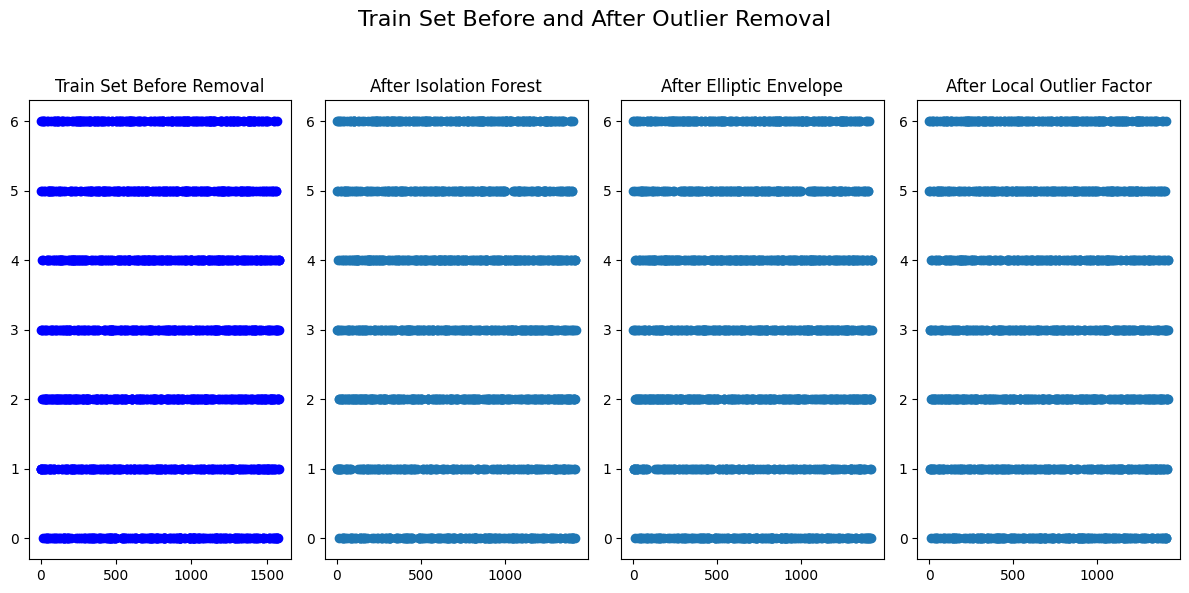

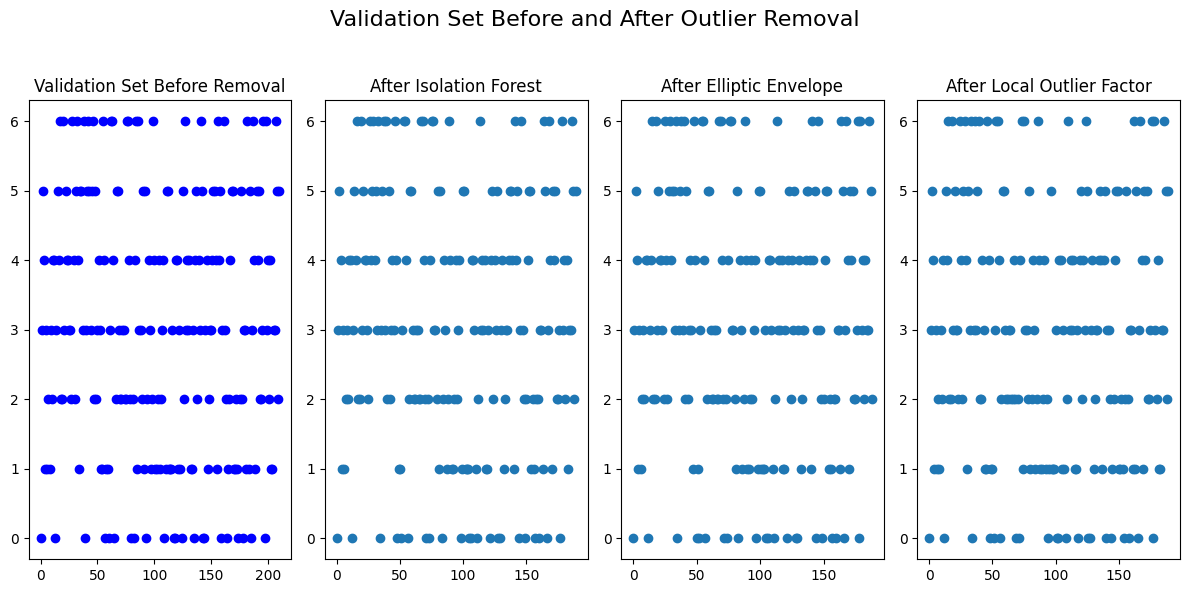

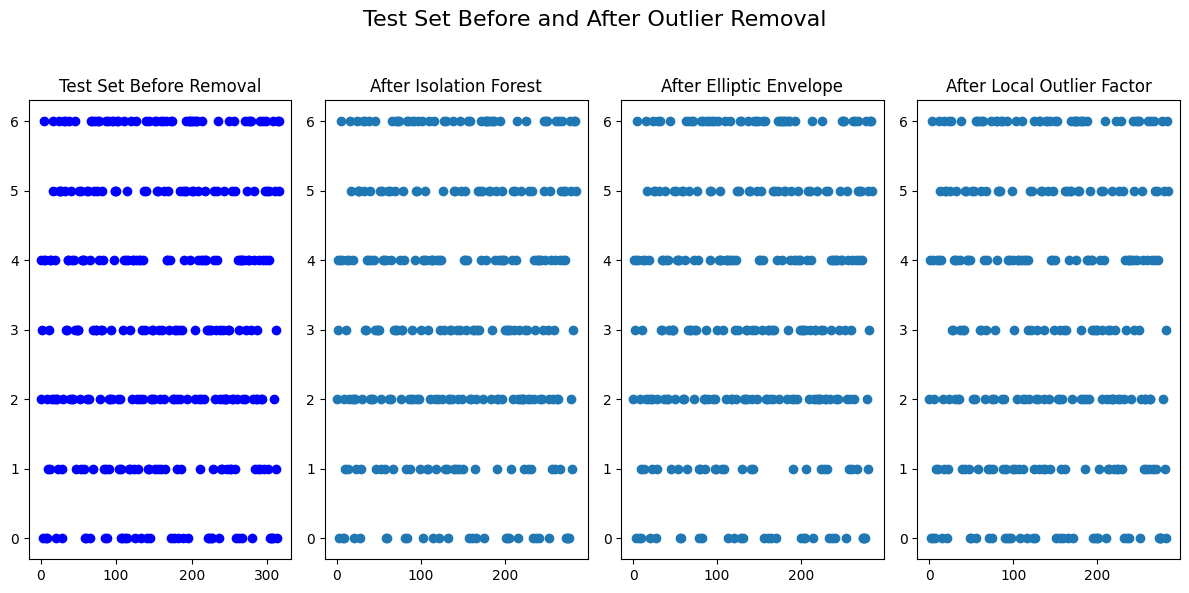

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import IsolationForest
from sklearn.covariance import EllipticEnvelope
from sklearn.neighbors import LocalOutlierFactor
from sklearn.metrics import mean_squared_error
import numpy as np
import matplotlib.pyplot as plt

def remove_outliers(X, y, model, model_name, novelty=False):
    if model_name == 'Local Outlier Factor':
        if novelty:
            # LOF with novelty=True for test data
            yhat = model.fit_predict(X)
        else:
            # LOF with novelty=False for training/validation data
            yhat = model.fit_predict(X)
    else:
        # For other models
        yhat = model.fit_predict(X)

    mask = yhat != -1
    return X[mask], y[mask]

# Modelli di rilevamento outlier
outlier_models = {
    'Isolation Forest': IsolationForest(contamination=0.1, random_state=42),
    'Elliptic Envelope': EllipticEnvelope(contamination=0.1, support_fraction=0.95, random_state=42),
    'Local Outlier Factor': LocalOutlierFactor(contamination=0.1, novelty=False)
}

# Dati originali (assumendo che X_train, X_val, X_test, y_train, y_val, y_test siano già definiti)
datasets = {'Train': (X_train, y_train), 'Validation': (X_val, y_val), 'Test': (X_test, y_test)}
results = {}

# Rimozione outlier e allenamento modelli
for name, (X, y) in datasets.items():
    for model_name, model in outlier_models.items():
        # Determina se siamo sui dati di test
        novelty = (name == 'Test' and model_name == 'Local Outlier Factor')
        X_clean, y_clean = remove_outliers(X.copy(), y.copy(), model, model_name, novelty)
        reg_model = LinearRegression().fit(X_clean, y_clean)
        y_pred = reg_model.predict(X_test)
        mse = mean_squared_error(y_test, y_pred)
        results[(name, model_name)] = (X_clean, y_clean, mse)

# Stampa MSE e selezione del migliore
for (dataset, model_name), (_, _, mse) in results.items():
    print(f"MSE {dataset} dopo rimozione outlier con {model_name}: {mse}")

# Determinazione della tecnica con il MSE più basso per ogni set di dati
for dataset in ['Train', 'Validation', 'Test']:
    mse_values = {model_name: results[(dataset, model_name)][2] for model_name in outlier_models.keys()}
    best_technique = min(mse_values, key=mse_values.get)
    print(f'Tecnica con il MSE più basso nel set di {dataset.lower()}: {best_technique} (MSE: {mse_values[best_technique]})')

# Visualizzazione dei risultati
for name, (X, y) in datasets.items():
    plt.figure(figsize=(12, 6))
    plt.suptitle(f'{name} Set Before and After Outlier Removal', fontsize=16)

    plt.subplot(1, len(outlier_models) + 1, 1)
    plt.scatter(range(len(y)), y, color='blue')
    plt.title(f'{name} Set Before Removal')

    for i, (model_name, _) in enumerate(outlier_models.items(), 2):
        X_clean, y_clean = results[(name, model_name)][:2]
        plt.subplot(1, len(outlier_models) + 1, i)
        plt.scatter(range(len(y_clean)), y_clean, label=model_name)
        plt.title(f'After {model_name}')

    plt.tight_layout(rect=[0, 0, 1, 0.95])
    plt.show()

In [ ]:
X = X_train
y = y_train

In [ ]:
print(X.shape)
print(y.shape)

(1583, 16)
(1583,)


## HPO Algorithm 6: Hyperband
Generate small-sized subsets and allocate budgets to each hyper-parameter combination based on its performance

**Advantages:**
* Enable parallelization.  

**Disadvantages:**  
* Not efficient with conditional HPs.
* Require subsets with small budgets to be representative.

In [ ]:
import warnings
import numpy as np
import pandas as pd
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import r2_score
from scipy.stats import uniform, randint as sp_randint
import time

warnings.filterwarnings('ignore')

# Assuming X and y are feature matrix and target vector

results_hyperband = []

# Random Forest
rf_params = {
    'max_features': sp_randint(1, X.shape[1] + 1),
    'max_depth': sp_randint(5, 50),
    'min_samples_split': sp_randint(2, 11),
    'min_samples_leaf': sp_randint(1, 11),
    'criterion': ['friedman_mse']
}
clf_rf = RandomForestRegressor(random_state=0)
start_time = time.time()
Random_rf = RandomizedSearchCV(clf_rf, param_distributions=rf_params, n_iter=100, scoring='neg_mean_squared_error', random_state=0)
Random_rf.fit(X, y)
elapsed_time_rf = round(time.time() - start_time, 2)

# Calcolo di R² per Random Forest
best_rf = Random_rf.best_estimator_
y_pred_rf = best_rf.predict(X)
r2_rf = r2_score(y, y_pred_rf)

results_hyperband.append({'Algorithm': 'Random Forest', 'Best Params': Random_rf.best_params_, 'MSE': -Random_rf.best_score_, 'R²': r2_rf, 'Time Elapsed (s)': elapsed_time_rf})

# SVM
svm_params = {
    'C': uniform(0, 1),
    'kernel': ['sigmoid', 'rbf', 'poly'],
    'gamma': ['scale']
}
svm_estimator = SVR(gamma='scale')
start_time = time.time()
Random_svm = RandomizedSearchCV(svm_estimator, svm_params, n_iter=100, scoring='neg_mean_squared_error', random_state=0)
Random_svm.fit(X, y)
elapsed_time_svm = round(time.time() - start_time, 2)

# Calcolo di R² per SVM
best_svm = Random_svm.best_estimator_
y_pred_svm = best_svm.predict(X)
r2_svm = r2_score(y, y_pred_svm)

results_hyperband.append({'Algorithm': 'SVM', 'Best Params': Random_svm.best_params_, 'MSE': -Random_svm.best_score_, 'R²': r2_svm, 'Time Elapsed (s)': elapsed_time_svm})

# KNN
knn_params = {
    'n_neighbors': sp_randint(1, 20),
}
clf_knn = KNeighborsRegressor()
start_time = time.time()
Random_knn = RandomizedSearchCV(clf_knn, param_distributions=knn_params, n_iter=100, scoring='neg_mean_squared_error', random_state=0)
Random_knn.fit(X, y)
elapsed_time_knn = round(time.time() - start_time, 2)

# Calcolo di R² per KNN
best_knn = Random_knn.best_estimator_
y_pred_knn = best_knn.predict(X)
r2_knn = r2_score(y, y_pred_knn)

results_hyperband.append({'Algorithm': 'KNN', 'Best Params': Random_knn.best_params_, 'MSE': -Random_knn.best_score_, 'R²': r2_knn, 'Time Elapsed (s)': elapsed_time_knn})

# ANN
ann_params = {
    'hidden_layer_sizes': [(sp_randint(10, 100).rvs(),) for _ in range(3)],
    'activation': ['relu', 'tanh'],
    'solver': ['adam'],
    'alpha': uniform(1e-6, 1),
    'batch_size': [16, 32, 64],
    'learning_rate': ['constant', 'invscaling', 'adaptive'],
    'learning_rate_init': uniform(1e-3, 1),
    'max_iter': [50, 100],
    'early_stopping': [True],
    'validation_fraction': [0.1]
}
ann_estimator = MLPRegressor()
start_time = time.time()
Random_ann = RandomizedSearchCV(ann_estimator, param_distributions=ann_params, n_iter=100, scoring='neg_mean_squared_error', random_state=0)
Random_ann.fit(X, y)
elapsed_time_ann = round(time.time() - start_time, 2)

# Calcolo di R² per ANN
best_ann = Random_ann.best_estimator_
y_pred_ann = best_ann.predict(X)
r2_ann = r2_score(y, y_pred_ann)

results_hyperband.append({'Algorithm': 'ANN', 'Best Params': Random_ann.best_params_, 'MSE': -Random_ann.best_score_, 'R²': r2_ann, 'Time Elapsed (s)': elapsed_time_ann})

results_df_hyperband = pd.DataFrame(results_hyperband)

print("Results for Hyperband")
print(results_df_hyperband.to_string(index=False))

Results for Hyperband
    Algorithm                                                                                                                                                                                                                                                       Best Params      MSE       R²  Time Elapsed (s)
Random Forest                                                                                                                                                 {'criterion': 'friedman_mse', 'max_depth': 35, 'max_features': 14, 'min_samples_leaf': 2, 'min_samples_split': 3} 0.374629 0.976352            149.44
          SVM                                                                                                                                                                                                      {'C': 0.9495710534507421, 'gamma': 'scale', 'kernel': 'rbf'} 3.074266 0.229334             77.68
          KNN                                         

## HPO Algorithm 7: Genetic Algorithm
Genetic algorithms detect well-performing hyper-parameter combinations in each generation, and pass them to the next generation until the best-performing combination is identified.

**Advantages:**
* Efficient with all types of HPs.
* Not require good initialization.


**Disadvantages:**  
* Poor capacity for parallelization.

### Using DEAP

In [ ]:
#Results for Genetic Algorithm

import warnings
import numpy as np
import pandas as pd
import time
from sklearn.base import BaseEstimator
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import r2_score
from tensorflow.keras.layers import Dense, Input
from tensorflow.keras.models import Model
from tensorflow.keras.callbacks import EarlyStopping
from evolutionary_search import EvolutionaryAlgorithmSearchCV

warnings.filterwarnings("ignore", category=RuntimeWarning)

results_GA = []

# Funzione per calcolare R²
def calculate_r2(model, X, y):
    y_pred = model.predict(X)
    return r2_score(y, y_pred)

# Random Forest
rf_params = {
    'n_estimators': range(10, 100),
    'max_features': range(1, 13),
    'max_depth': range(5, 50),
    'min_samples_split': range(2, 11),
    'min_samples_leaf': range(1, 11),
    'criterion': ['squared_error']
}
clf = RandomForestRegressor(random_state=0)
start_time = time.time()
ga1 = EvolutionaryAlgorithmSearchCV(estimator=clf,
                                    params=rf_params,
                                    scoring="neg_mean_squared_error",
                                    cv=3,
                                    verbose=0,
                                    population_size=10,
                                    gene_mutation_prob=0.10,
                                    gene_crossover_prob=0.5,
                                    tournament_size=3,
                                    generations_number=5,
                                    n_jobs=1)
ga1.fit(X, y)
elapsed_time = round(time.time() - start_time, 2)
best_rf = ga1.best_estimator_
r2_rf = calculate_r2(best_rf, X, y)
results_GA.append({'Algorithm': 'Random Forest', 'Best Params': ga1.best_params_, 'MSE': -ga1.best_score_, 'R²': r2_rf, 'Time Elapsed (s)': elapsed_time})

# SVM
svm_params = {
    'C': np.random.uniform(0, 50, 1000),
    'kernel': ['poly', 'rbf', 'sigmoid'],
    'epsilon': np.random.uniform(0, 1, 100),
}
clf = SVR(gamma='scale')
start_time = time.time()
ga2 = EvolutionaryAlgorithmSearchCV(estimator=clf,
                                    params=svm_params,
                                    scoring="neg_mean_squared_error",
                                    cv=3,
                                    verbose=0,
                                    population_size=10,
                                    gene_mutation_prob=0.10,
                                    gene_crossover_prob=0.5,
                                    tournament_size=3,
                                    generations_number=5,
                                    n_jobs=1)
ga2.fit(X, y)
elapsed_time = round(time.time() - start_time, 2)
best_svm = ga2.best_estimator_
r2_svm = calculate_r2(best_svm, X, y)
results_GA.append({'Algorithm': 'SVM', 'Best Params': ga2.best_params_, 'MSE': -ga2.best_score_, 'R²': r2_svm, 'Time Elapsed (s)': elapsed_time})

# KNN
knn_params = {
    'n_neighbors': range(1, 20),
}
clf = KNeighborsRegressor()
start_time = time.time()
ga3 = EvolutionaryAlgorithmSearchCV(estimator=clf,
                                    params=knn_params,
                                    scoring="neg_mean_squared_error",
                                    cv=3,
                                    verbose=0,
                                    population_size=10,
                                    gene_mutation_prob=0.10,
                                    gene_crossover_prob=0.5,
                                    tournament_size=3,
                                    generations_number=5,
                                    n_jobs=1)
ga3.fit(X, y)
elapsed_time = round(time.time() - start_time, 2)
best_knn = ga3.best_estimator_
r2_knn = calculate_r2(best_knn, X, y)
results_GA.append({'Algorithm': 'KNN', 'Best Params': ga3.best_params_, 'MSE': -ga3.best_score_, 'R²': r2_knn, 'Time Elapsed (s)': elapsed_time})

# ANN
def ANN(optimizer='adam', neurons=32, batch_size=32, epochs=50, activation='relu', patience=5, loss='mse'):
    input_layer = Input(shape=(X.shape[1],))
    x = Dense(neurons, activation=activation)(input_layer)
    x = Dense(neurons, activation=activation)(x)
    output_layer = Dense(1)(x)
    model = Model(inputs=input_layer, outputs=output_layer)
    model.compile(optimizer=optimizer, loss=loss)
    early_stopping = EarlyStopping(monitor="loss", patience=patience)
    model.fit(X, y, batch_size=batch_size, epochs=epochs, callbacks=[early_stopping], verbose=0)
    return model

rf_params_ann = {
    'optimizer': ['adam', 'rmsprop'],
    'activation': ['relu', 'tanh'],
    'loss': ['mse'],
    'batch_size': [16, 32, 64],
    'neurons': list(range(10, 100)),
    'epochs': [20, 50],
    'patience': list(range(3, 20))
}

start_time = time.time()
clf_ann = KerasRegressor(model=ANN, optimizer='adam', activation='relu', neurons=32, epochs=50, patience=5, loss='mse', batch_size=16, verbose=0)
ga4 = EvolutionaryAlgorithmSearchCV(estimator=clf_ann,
                                   params=rf_params_ann,
                                   scoring="neg_mean_squared_error",
                                   cv=3,
                                   verbose=0,
                                   population_size=10,
                                   gene_mutation_prob=0.10,
                                   gene_crossover_prob=0.5,
                                   tournament_size=3,
                                   generations_number=5,
                                   n_jobs=1)
ga4.fit(X, y)
elapsed_time = round(time.time() - start_time, 2)
best_ann = ga4.best_estimator_
r2_ann = calculate_r2(best_ann, X, y)
results_GA.append({'Algorithm': 'ANN', 'Best Params': ga4.best_params_, 'MSE': -ga4.best_score_, 'R²': r2_ann, 'Time Elapsed (s)': elapsed_time})

results_df_GA = pd.DataFrame(results_GA)
print("Results for Genetic Algorithm")
print(results_df_GA.to_string(index=False))

Results for Genetic Algorithm
    Algorithm                                                                                                                            Best Params      MSE       R²  Time Elapsed (s)
Random Forest {'n_estimators': 99, 'max_features': 12, 'max_depth': 34, 'min_samples_split': 6, 'min_samples_leaf': 3, 'criterion': 'squared_error'} 0.465344 0.961209             18.26
          SVM                                                               {'C': 47.68422085424033, 'kernel': 'rbf', 'epsilon': 0.3805811582431742} 1.988604 0.506503             10.66
          KNN                                                                                                                     {'n_neighbors': 5} 1.125685 0.835790              0.58
          ANN              {'optimizer': 'adam', 'activation': 'tanh', 'loss': 'mse', 'batch_size': 32, 'neurons': 76, 'epochs': 50, 'patience': 15} 1.034860 0.835935            434.33


In [ ]:
# Lista dei DataFrame dei risultati e relativi percorsi per il salvataggio
results_dataframes = [
    (results_df_GA, '/content/results_GA.csv'),
    (results_df_hyperband, '/content/results_df_hyperband.csv'),
]

# Salvataggio dei risultati in file CSV
for results_df, file_path in results_dataframes:
    results_df.to_csv(file_path, index=False)

In [ ]:
import pandas as pd

# Crea un dizionario per contenere tutti i risultati
all_results = {}

# Carica i risultati dai file CSV
results_files = {
    '3_fold_cross_validation': 'results_3_fold.csv',
    'Grid Search': 'results_grid_search.csv',
    'Random Search': 'results_random_search.csv',
    'Hyperband': 'results_df_hyperband.csv',
    'Bayesian Optimization': 'results_bayes.csv',
    'Sequential Model-Based Optimization (skopt)': 'results_skopt.csv',
    'Bayesian Optimization TPE': 'results_bo_tpe.csv',
    'Particle Swarm Optimization': 'results_PSO.csv',
    'Genetic Algorithm': 'results_GA.csv',
    'TPOT': 'results_TPOT.csv',
}

for procedure, file_path in results_files.items():
    results_df = pd.read_csv(file_path)
    all_results[procedure] = results_df

# Visualizza i risultati in un'unica tabella con le rispettive procedure e algoritmi associati
print("Results Summary:")
print("--------------------------------------------------------------------------------")
for procedure, results_df in all_results.items():
    print("Procedure:", procedure)
    print("--------------------------------------------------------------------------------")
    print(results_df.to_string(index=False))
    print("--------------------------------------------------------------------------------")

Results Summary:
--------------------------------------------------------------------------------
Procedure: 3_fold_cross_validation
--------------------------------------------------------------------------------
    Algorithm      MSE       R²  Time Elapsed (s)
Random Forest 0.400459 0.898819              5.31
          SVM 3.138676 0.179970              1.39
          KNN 1.135786 0.703269              0.20
          ANN 1.817694 0.436194             88.74
--------------------------------------------------------------------------------
Procedure: Grid Search
--------------------------------------------------------------------------------
    Algorithm                                                                                                                 Best Params      MSE       R²  Time Elapsed (s)
Random Forest                                                                                       {'max_depth': 15, 'n_estimators': 30} 0.391839 0.987898              3.60
   

In [ ]:
import csv

# Definire il percorso del file CSV
output_file = "best_hyperparameters_for_all.csv"

# Aprire il file CSV in modalità scrittura
with open(output_file, mode='w', newline='') as file:
    writer = csv.writer(file)

    # Scrivere l'intestazione del file CSV
    writer.writerow(["Procedura", "Algoritmo", "Best Params"])

    # Scrivere i migliori parametri per ogni procedura
    for procedure, results_df in all_results.items():
        if procedure != '3_fold_cross_validation':
            if 'Best Params' in results_df.columns:
                for index, row in results_df.iterrows():
                    writer.writerow([procedure, row['Algorithm'], row['Best Params']])
            else:
                print(f"Attenzione: 'Best Params' non trovata in {procedure}")

print("File CSV salvato con successo:", output_file)

Attenzione: 'Best Params' non trovata in TPOT
File CSV salvato con successo: best_hyperparameters_for_all.csv


In [ ]:
from tabulate import tabulate
from colorama import Fore, Style
import pandas as pd
import matplotlib.pyplot as plt
from IPython.display import display, Image
from sklearn.metrics import r2_score

# Carica i risultati dai file CSV
all_results = {}
for procedure, file_path in results_files.items():
    results_df = pd.read_csv(file_path)
    all_results[procedure] = results_df

# Inizializza le variabili per i migliori MSE, R² e tempi
best_mse = {}
best_r2 = {}
best_time = {}

# Inizializza la lista per i dati della tabella
table_data = []

# Calcola i migliori MSE, R² e tempi per ogni procedura
for procedure, results_df in all_results.items():
    best_mse[procedure] = min(results_df['MSE'])
    best_r2[procedure] = max(results_df['R²'])  # Supponendo che l'R² sia memorizzato nel file CSV
    best_time[procedure] = min(results_df['Time Elapsed (s)'])

    # Popola la lista dei dati della tabella
    for index, row in results_df.iterrows():
        mse_value = row['MSE']
        r2_value = row['R²']  # Supponendo che l'R² sia memorizzato nel file CSV
        time_value = row['Time Elapsed (s)']
        algorithm = row['Algorithm']
        if mse_value == best_mse[procedure]:
            mse_value = f"{Fore.GREEN}{mse_value}{Style.RESET_ALL}"
            algorithm = f"{Fore.GREEN}{Style.BRIGHT}{algorithm}{Style.RESET_ALL}"
        if r2_value == best_r2[procedure]:
            r2_value = f"{Fore.CYAN}{r2_value}{Style.RESET_ALL}"
        if time_value == best_time[procedure]:
            time_value = f"{Fore.LIGHTGREEN_EX}{time_value}{Style.RESET_ALL}"
            algorithm = f"{Fore.LIGHTGREEN_EX}{Style.BRIGHT}{algorithm}{Style.RESET_ALL}"
        table_data.append([procedure, algorithm, mse_value, r2_value, time_value])

# Stampa la tabella dei risultati
table_headers = ["Procedure", "Algorithm", "MSE", "R²", "Time Elapsed (s)"]
print("Results Summary:")
print(tabulate(table_data, headers=table_headers, tablefmt="grid"))

# Trova il miglior algoritmo per MSE, R² e tempo per ogni procedura
best_algorithm_mse = {}
best_algorithm_r2 = {}
best_algorithm_time = {}
overall_winner = min(all_results, key=lambda x: min(all_results[x]['MSE']) + min(all_results[x]['Time Elapsed (s)']))

for procedure, results_df in all_results.items():
    best_mse_index = results_df['MSE'].idxmin()
    best_r2_index = results_df['R²'].idxmax()  # Supponendo che l'R² sia memorizzato nel file CSV
    best_time_index = results_df['Time Elapsed (s)'].idxmin()
    best_algorithm_mse[procedure] = results_df.loc[best_mse_index, 'Algorithm']
    best_algorithm_r2[procedure] = results_df.loc[best_r2_index, 'Algorithm']  # Supponendo che l'R² sia memorizzato nel file CSV
    best_algorithm_time[procedure] = results_df.loc[best_time_index, 'Algorithm']

# Inizializza le liste per le tabelle dei vincitori
winners_table = []
overall_winner_table = []

# Popola le tabelle dei vincitori
for procedure, results_df in all_results.items():
    mse_winner = best_algorithm_mse[procedure]
    r2_winner = best_algorithm_r2[procedure]  # Supponendo che l'R² sia memorizzato nel file CSV
    time_winner = best_algorithm_time[procedure]
    mse_value = results_df.loc[results_df['Algorithm'] == mse_winner, 'MSE'].values[0]
    r2_value = results_df.loc[results_df['Algorithm'] == r2_winner, 'R²'].values[0]  # Supponendo che l'R² sia memorizzato nel file CSV
    time_value = results_df.loc[results_df['Algorithm'] == time_winner, 'Time Elapsed (s)'].values[0]
    winners_table.append([procedure, mse_winner, mse_value, r2_value, time_winner, time_value])
    if procedure == overall_winner:
        overall_winner_table.append([procedure, mse_winner, mse_value, r2_value, time_winner, time_value])

# Stampa la tabella dei risultati dei vincitori
print("Best algorithm and procedure Summary:")
print(tabulate(winners_table, headers=["Procedure", "MSE Algorithm", "MSE", "R²", "Time Algorithm", "Time Elapsed (s)"], tablefmt="grid"))
print("\nOverall Best algorithm and procedure:")
print(tabulate(overall_winner_table, headers=["Procedure", "MSE Algorithm", "MSE", "R²", "Time Algorithm", "Time Elapsed (s)"], tablefmt="grid"))


Results Summary:
+---------------------------------------------+---------------+----------+----------+--------------------+
| Procedure                                   | Algorithm     |      MSE |       R² |   Time Elapsed (s) |
+=============================================+===============+==========+==========+====================+
| 3_fold_cross_validation                     | Random Forest | 0.400459 | 0.898819 |               5.31 |
+---------------------------------------------+---------------+----------+----------+--------------------+
| 3_fold_cross_validation                     | SVM           | 3.13868  | 0.17997  |               1.39 |
+---------------------------------------------+---------------+----------+----------+--------------------+
| 3_fold_cross_validation                     | KNN           | 1.13579  | 0.703269 |               0.2  |
+---------------------------------------------+---------------+----------+----------+--------------------+
| 3_fold_cross_valid

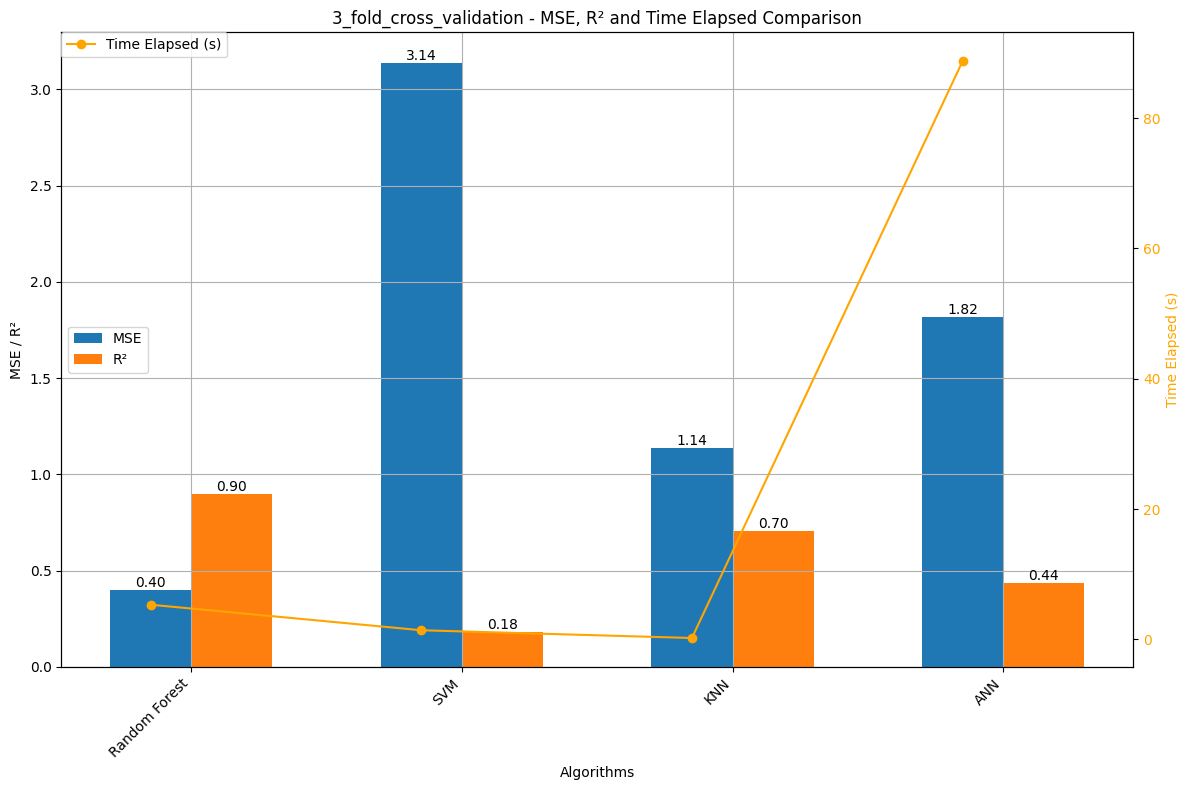

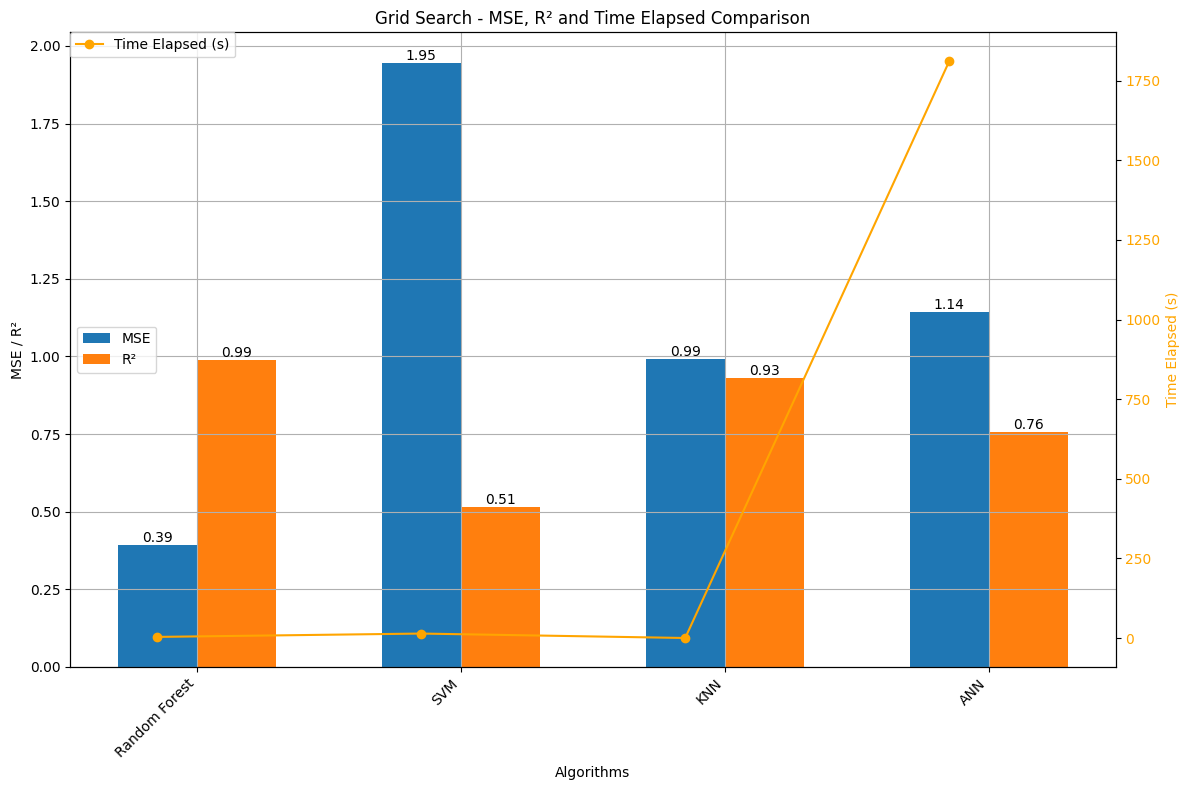

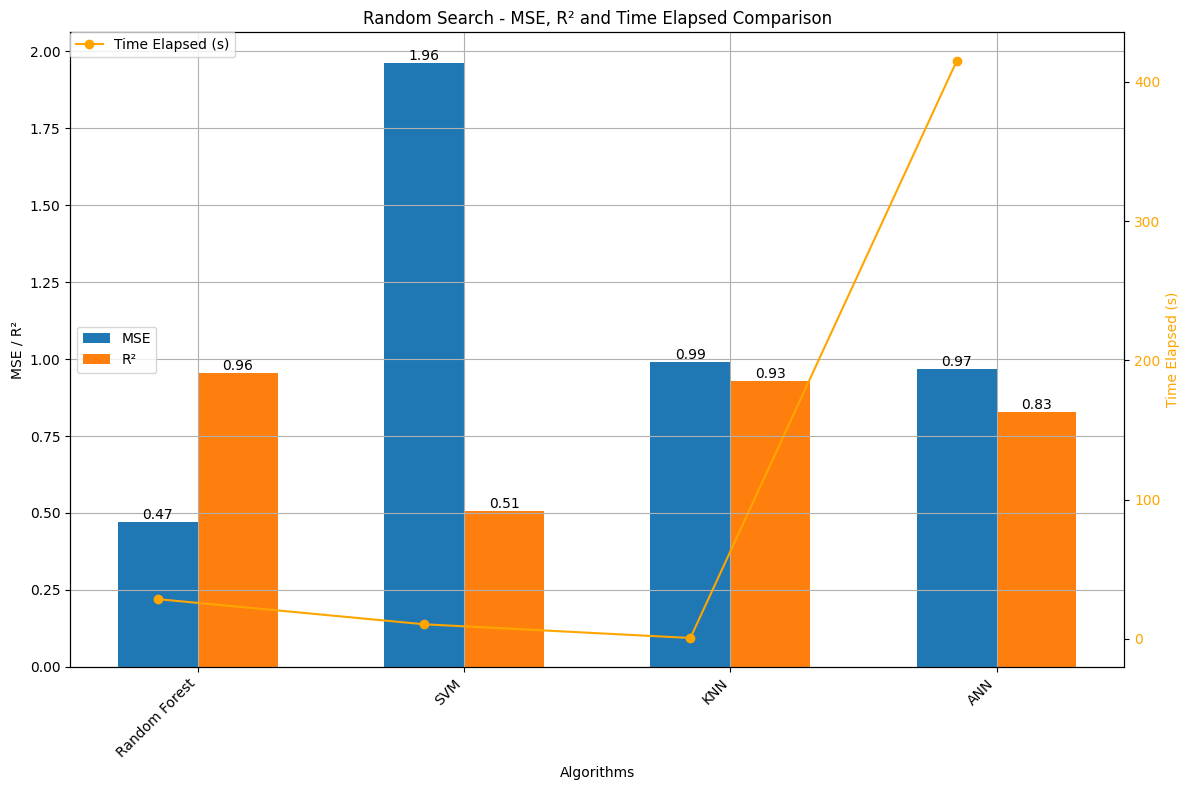

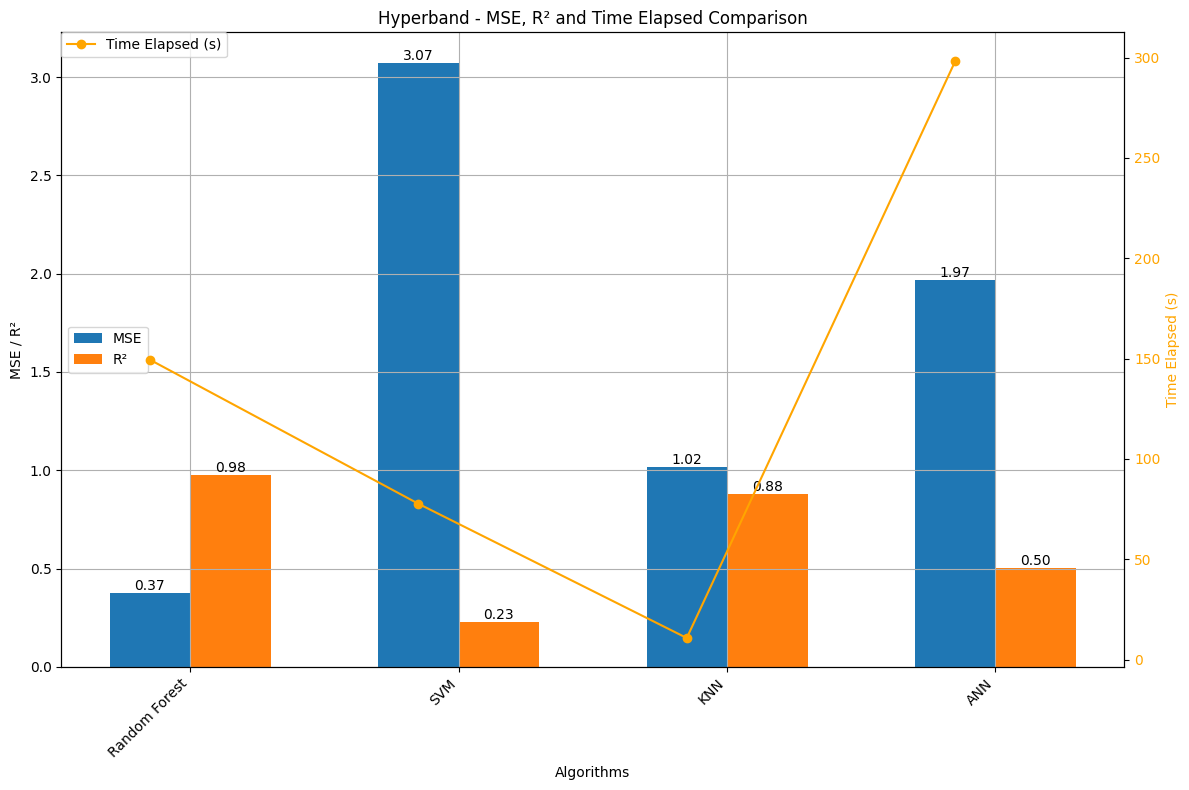

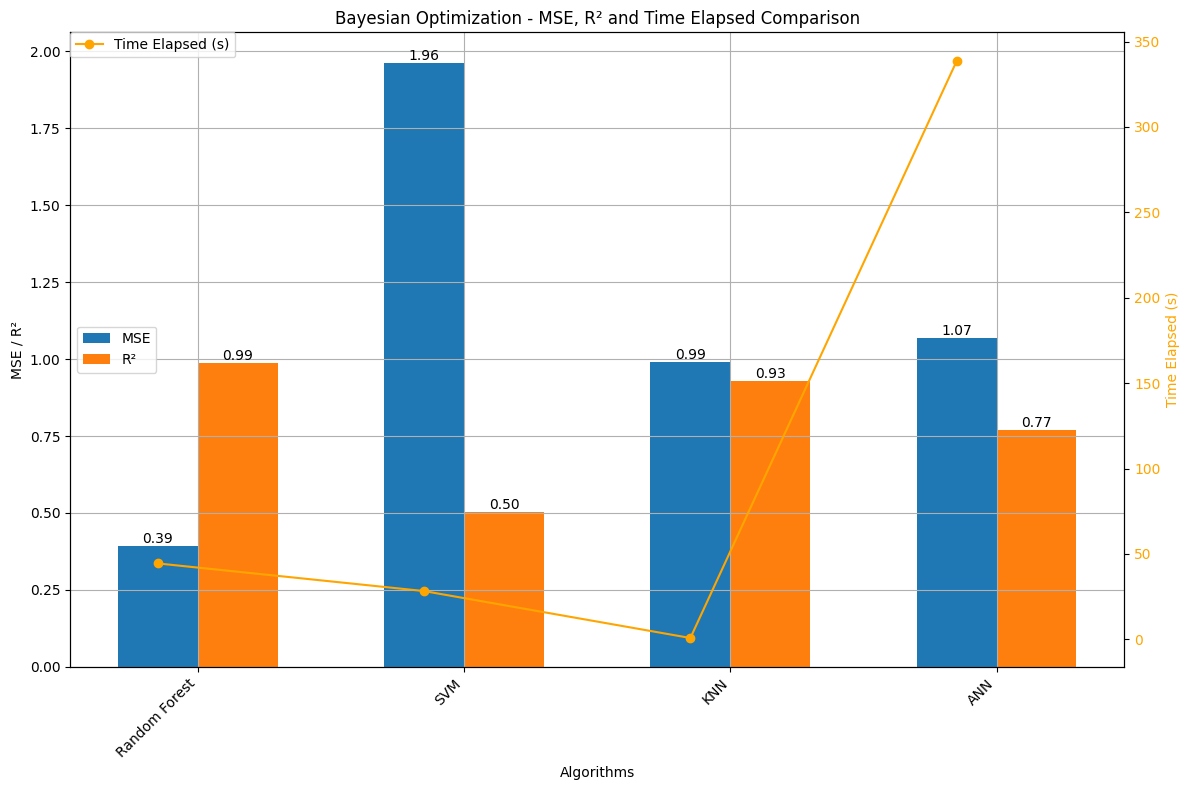

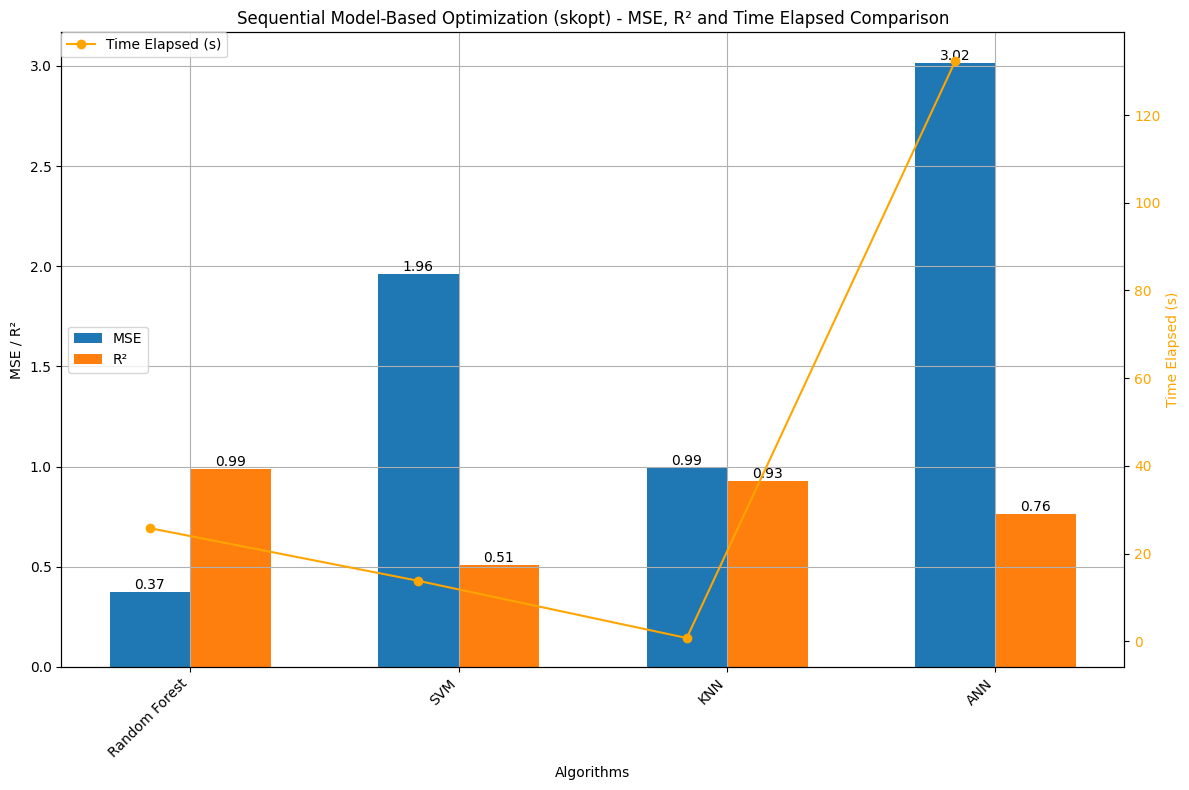

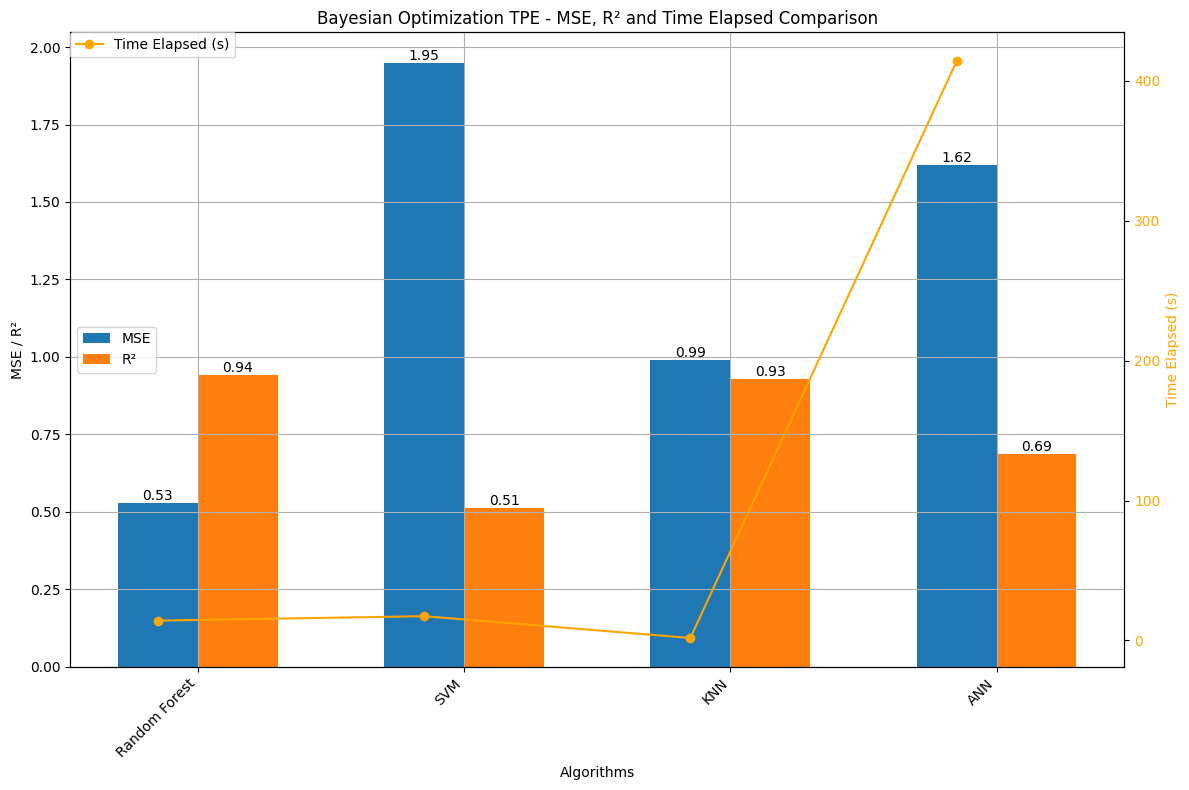

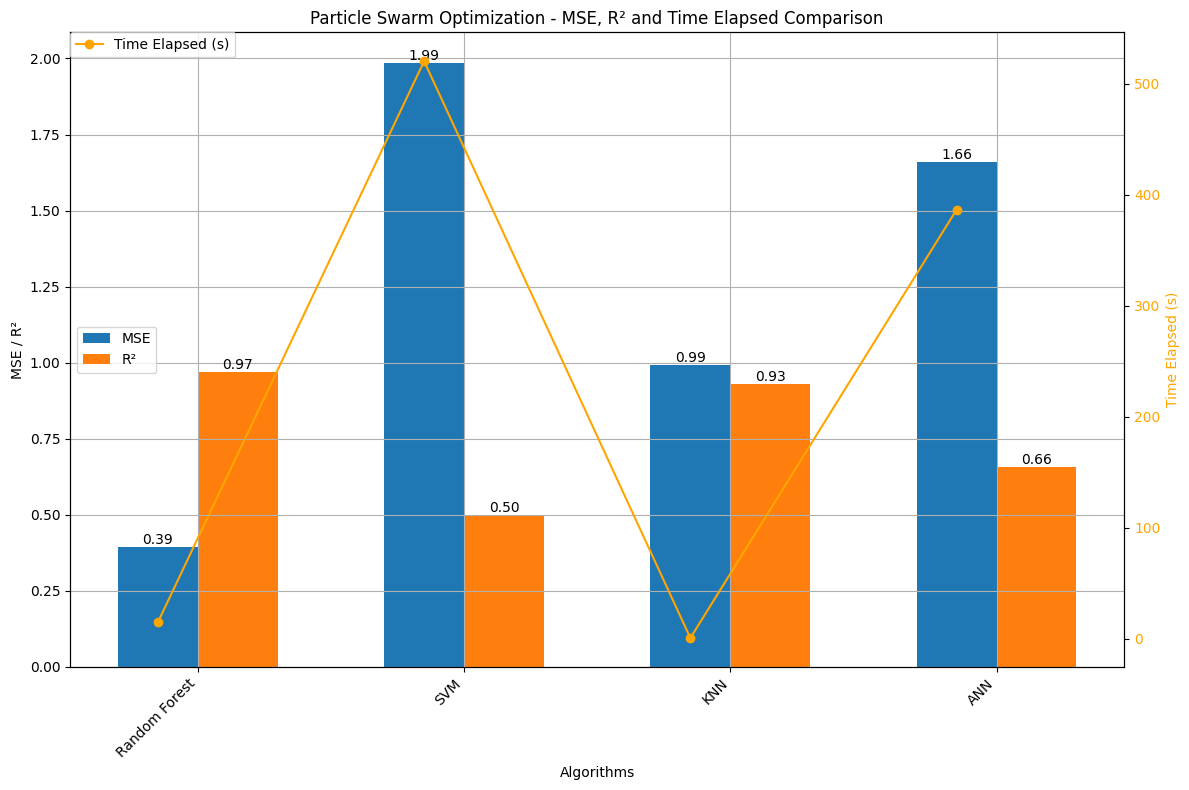

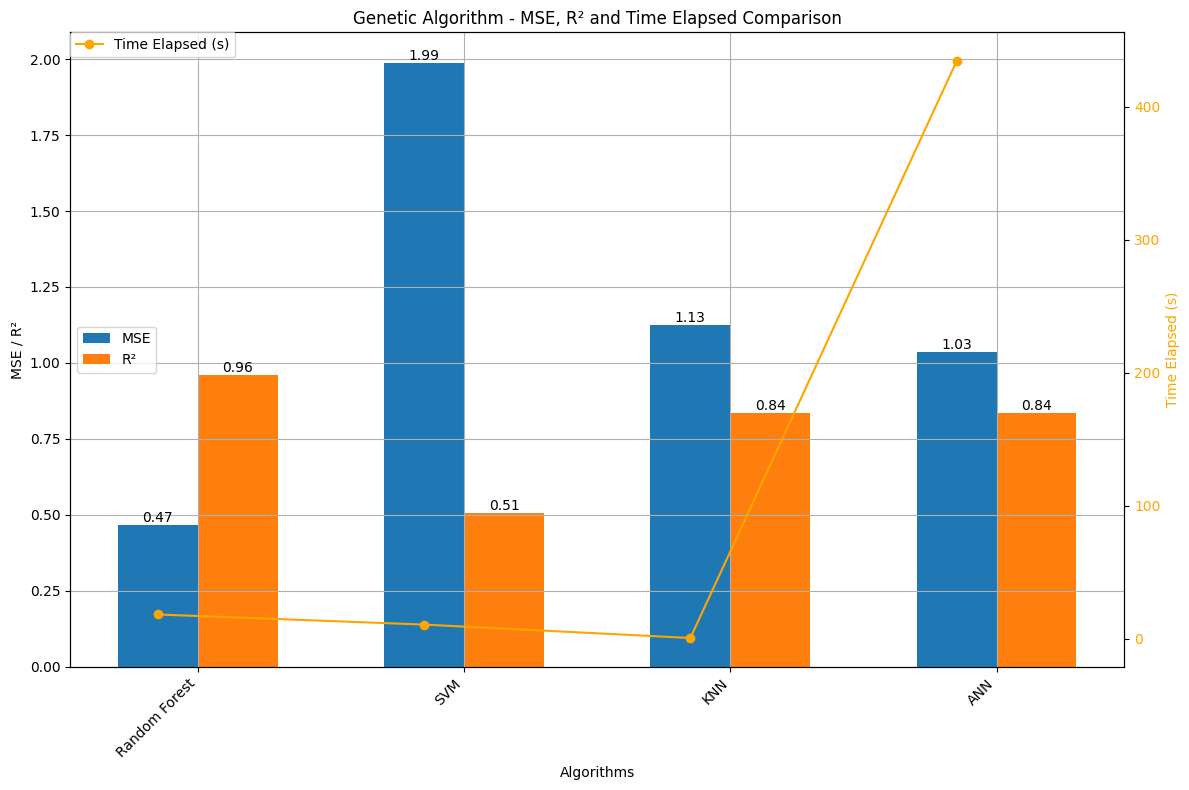

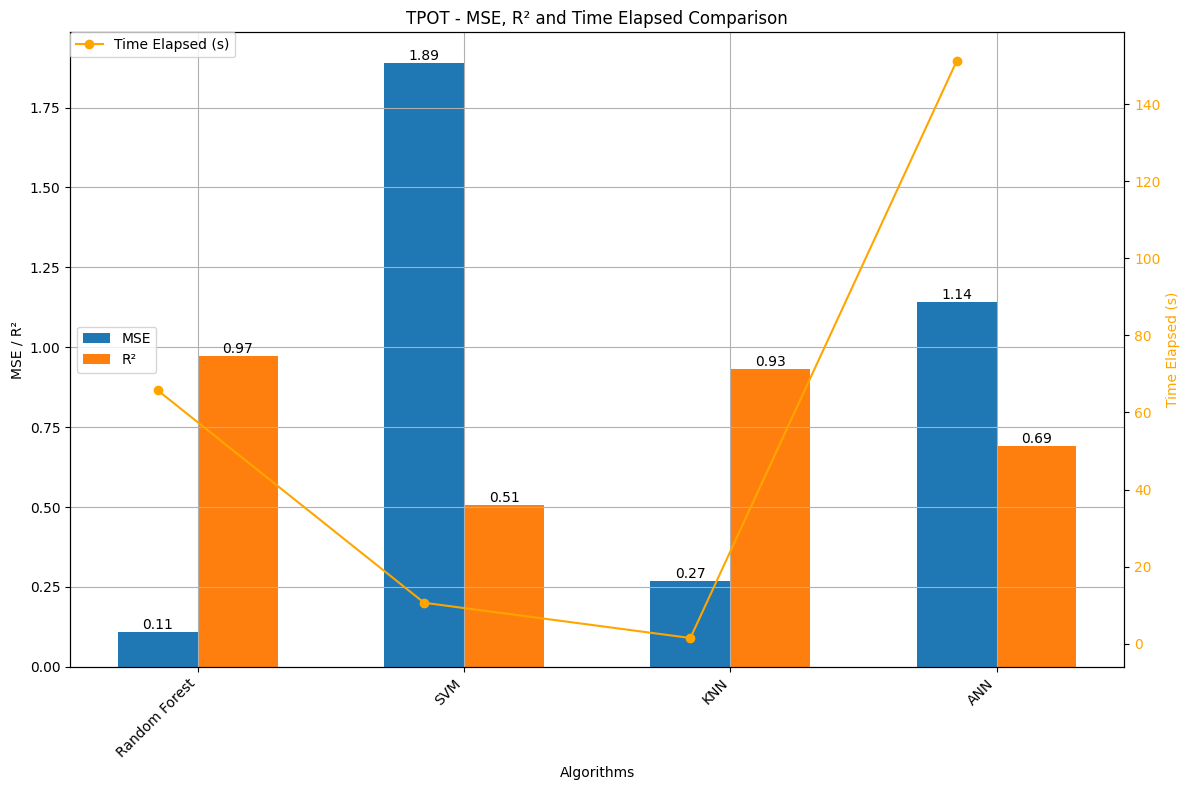

In [ ]:
all_results = {}
for procedure, file_path in results_files.items():
    results_df = pd.read_csv(file_path)
    all_results[procedure] = results_df

# Inizializza i dati per il grafico
plot_data = {}
metrics = ['MSE', 'R²']

# Popola i dati per il grafico
for procedure, results_df in all_results.items():
    plot_data[procedure] = {
        'Algorithms': results_df['Algorithm'].tolist(),
        'MSE': results_df['MSE'].tolist(),
        'R²': results_df['R²'].tolist(),
        'Time Elapsed (s)': results_df['Time Elapsed (s)'].tolist()
    }

# Crea i grafici per ogni procedura
for procedure, data in plot_data.items():
    fig, ax1 = plt.subplots(figsize=(12, 8))
    plt.title(f'{procedure} - MSE, R² and Time Elapsed Comparison')  # Titolo del grafico

    # Grafico a barre per MSE e R²
    bar_width = 0.3
    index = range(len(data['Algorithms']))

    bars = {}
    for i, metric in enumerate(metrics):
        bars[metric] = ax1.bar([x + i * bar_width for x in index], data[metric], bar_width, label=metric)

    ax1.set_xlabel('Algorithms')
    ax1.set_ylabel('MSE / R²')
    ax1.set_xticks([x + (len(metrics) - 1) * bar_width / 2 for x in index])
    ax1.set_xticklabels(data['Algorithms'], rotation=45, ha='right')

    # Aggiungi etichette per i valori sui bar
    for metric, bar in bars.items():
        for b, value in zip(bar, data[metric]):
            height = b.get_height()
            ax1.text(b.get_x() + b.get_width() / 2, height, '{:.2f}'.format(value), ha='center', va='bottom')

    # Grafico a linee per il tempo
    ax2 = ax1.twinx()
    ax2.plot(data['Algorithms'], data['Time Elapsed (s)'], marker='o', color='orange', label='Time Elapsed (s)')
    ax2.set_ylabel('Time Elapsed (s)', color='orange')
    ax2.tick_params(axis='y', labelcolor='orange')

    # Aggiungi le legende
    ax1.legend(loc='center left', bbox_to_anchor=(0, 0.5), prop={'size': 10})  # Legenda per MSE e R²
    ax2.legend(loc='upper left', bbox_to_anchor=(0, 1), borderaxespad=0., prop={'size': 10})  # Legenda per il tempo

    ax1.grid(True)
    plt.tight_layout()
    plt.show()

In [ ]:
all_results = {}
for procedure, file_path in results_files.items():
    results_df = pd.read_csv(file_path)
    all_results[procedure] = results_df

# Inizializza i dati per il grafico
plot_data = {}
metrics = ['MSE', 'R²']

# Popola i dati per il grafico
for procedure, results_df in all_results.items():
    plot_data[procedure] = {
        'Algorithms': results_df['Algorithm'].tolist(),
        'MSE': results_df['MSE'].tolist(),
        'R²': results_df['R²'].tolist(),
        'Time Elapsed (s)': results_df['Time Elapsed (s)'].tolist()
    }

# Inizializza le strutture per le tabelle
winners_table = []
overall_winner_table = []

# Trova il procedimento complessivo con il miglior R² massimo
overall_best_r2_proc = max(all_results, key=lambda x: all_results[x]['R²'].max())

# Popola le tabelle dei vincitori
for procedure, results_df in all_results.items():
    row = [procedure]

    for metric in metrics:
        if metric == 'MSE':
            best_index = results_df[metric].idxmin()
        else:
            best_index = results_df[metric].idxmax()

        best_algorithm = results_df.loc[best_index, 'Algorithm']
        best_value = results_df.loc[results_df['Algorithm'] == best_algorithm, metric].values[0]
        row.append(best_algorithm)
        row.append(best_value)

    time_winner = results_df.loc[results_df['Time Elapsed (s)'].idxmin(), 'Algorithm']
    time_value = results_df.loc[results_df['Algorithm'] == time_winner, 'Time Elapsed (s)'].values[0]
    row.extend([time_winner, time_value])

    winners_table.append(row)

    if procedure == overall_best_r2_proc:
        overall_winner_table.append(row)

# Definisci le intestazioni delle colonne per le tabelle
headers = ["Procedure", "MSE Winner", "MSE Value", "R² Winner", "R² Value", "Time Winner", "Time Elapsed (s)"]

# Specifica il percorso del file PDF in cui salvare i vincitori
pdf_file_path = "Overall_Results_Regression.pdf"

# Crea un oggetto PdfPages per gestire il file PDF
with PdfPages(pdf_file_path) as pdf:
    # Aggiungi i grafici al PDF
    for procedure, data in plot_data.items():
        fig, ax1 = plt.subplots(figsize=(12, 8))
        plt.title(f'{procedure} - MSE, R² and Time Elapsed Comparison')  # Titolo del grafico

        # Grafico a barre per MSE e R²
        bar_width = 0.3
        index = range(len(data['Algorithms']))

        bars = {}
        for i, metric in enumerate(metrics):
            bars[metric] = ax1.bar([x + i * bar_width for x in index], data[metric], bar_width, label=metric)

        ax1.set_xlabel('Algorithms')
        ax1.set_ylabel('MSE / R²')
        ax1.set_xticks([x + (len(metrics) - 1) * bar_width / 2 for x in index])
        ax1.set_xticklabels(data['Algorithms'], rotation=45, ha='right')

        # Aggiungi etichette per i valori sui bar
        for metric, bar in bars.items():
            for b, value in zip(bar, data[metric]):
                height = b.get_height()
                ax1.text(b.get_x() + b.get_width() / 2, height, '{:.2f}'.format(value), ha='center', va='bottom')

        # Grafico a linee per il tempo
        ax2 = ax1.twinx()
        ax2.plot(data['Algorithms'], data['Time Elapsed (s)'], marker='o', color='orange', label='Time Elapsed (s)')
        ax2.set_ylabel('Time Elapsed (s)', color='orange')
        ax2.tick_params(axis='y', labelcolor='orange')

        # Aggiungi le legende
        ax1.legend(loc='center left', bbox_to_anchor=(0, 0.5), prop={'size': 10})  # Legenda per MSE e R²
        ax2.legend(loc='upper left', bbox_to_anchor=(0, 1), borderaxespad=0., prop={'size': 10})  # Legenda per il tempo

        ax1.grid(True)
        plt.tight_layout()
        pdf.savefig()
        plt.close()

    # Aggiungi la tabella "Best algorithm and procedure Summary"
    fig = plt.figure(figsize=(20, 12))
    plt.text(0.5, 0.98, "Best Algorithm and Procedure Summary:", horizontalalignment='center', verticalalignment='top', fontsize=18, fontweight='bold')
    table = plt.table(cellText=winners_table, colLabels=headers, loc='center', cellLoc='center', colColours=['lightgrey']*len(headers))
    table.auto_set_font_size(False)
    table.set_fontsize(8)
    table.scale(1.5, 1.8)
    plt.axis('off')
    pdf.savefig(fig, bbox_inches='tight', pad_inches=0.5)
    plt.close(fig)

    # Aggiungi la tabella "Overall Best Algorithm and Procedure"
    fig = plt.figure(figsize=(20, 12))
    plt.text(0.5, 0.98, "Overall Best Algorithm and Procedure:", horizontalalignment='center', verticalalignment='top', fontsize=18, fontweight='bold')
    table = plt.table(cellText=overall_winner_table, colLabels=headers, loc='center', cellLoc='center', colColours=['lightgrey']*len(headers))
    table.auto_set_font_size(False)
    table.set_fontsize(8)
    table.scale(1.5, 1.8)
    plt.axis('off')
    pdf.savefig(fig, bbox_inches='tight', pad_inches=0.5)
    plt.close(fig)

print(f"Le tabelle degli Overall Results sono state aggiunte al file PDF: {pdf_file_path}")

Le tabelle degli Overall Results sono state aggiunte al file PDF: Overall_Results_Regression.pdf
